#Detection of Breast Cancer in Wisconsin through Machine Learning Approach

##1.Project Overview

##2.Data Information

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

##3.Data Inspecting and Preprocessing

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.9 MB/s eta 0:00:00


In [2]:
!pip install logitboost

In [3]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 6.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from logitboost import LogitBoost
import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [7]:
# Concatenates X and y into the DataFrames
df = pd.concat([X, y], axis=1)

# Display the first few rows of the combined DataFrame
df.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3  Diagnosis  
0     0.4601             0.11890          M  
1     0.2750             0.08902          M  
2     0.3613             0.08758          M  
3     0.6638             0.17300          M  
4     0.2364             0.07678          M  

[5 rows x 31 columns]

In [8]:
# Check its rows and columns
df.shape

(569, 31)

In [9]:
# Check its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [10]:
df.describe().T

count        mean         std         min         25%  \
radius1             569.0   14.127292    3.524049    6.981000   11.700000   
texture1            569.0   19.289649    4.301036    9.710000   16.170000   
perimeter1          569.0   91.969033   24.298981   43.790000   75.170000   
area1               569.0  654.889104  351.914129  143.500000  420.300000   
smoothness1         569.0    0.096360    0.014064    0.052630    0.086370   
compactness1        569.0    0.104341    0.052813    0.019380    0.064920   
concavity1          569.0    0.088799    0.079720    0.000000    0.029560   
concave_points1     569.0    0.048919    0.038803    0.000000    0.020310   
symmetry1           569.0    0.181162    0.027414    0.106000    0.161900   
fractal_dimension1  569.0    0.062798    0.007060    0.049960    0.057700   
radius2             569.0    0.405172    0.277313    0.111500    0.232400   
texture2            569.0    1.216853    0.551648    0.360200    0.833900   
perimeter2          569.0    2.866059    2.021855    0.757000    1.606000   
area2               569.0   40.337079   45.491006    6.802000   17.850000   
smoothness2         569.0    0.007041    0.003003    0.001713    0.005169   
compactness2        569.0    0.025478    0.017908    0.002252    0.013080   
concavity2          569.0    0.031894    0.030186    0.000000    0.015090   
concave_points2     569.0    0.011796    0.006170    0.000000    0.007638   
symmetry2           569.0    0.020542    0.008266    0.007882    0.015160   
fractal_dimension2  569.0    0.003795    0.002646    0.000895    0.002248   
radius3             569.0   16.269190    4.833242    7.930000   13.010000   
texture3            569.0   25.677223    6.146258   12.020000   21.080000   
perimeter3          569.0  107.261213   33.602542   50.410000   84.110000   
area3               569.0  880.583128  569.356993  185.200000  515.300000   
smoothness3         569.0    0.132369    0.022832    0.071170    0.116600   
compactness3        569.0    0.254265    0.157336    0.027290    0.147200   
concavity3          569.0    0.272188    0.208624    0.000000    0.114500   
concave_points3     569.0    0.114606    0.065732    0.000000    0.064930   
symmetry3           569.0    0.290076    0.061867    0.156500    0.250400   
fractal_dimension3  569.0    0.083946    0.018061    0.055040    0.071460   

                           50%          75%         max  
radius1              13.370000    15.780000    28.11000  
texture1             18.840000    21.800000    39.28000  
perimeter1           86.240000   104.100000   188.50000  
area1               551.100000   782.700000  2501.00000  
smoothness1           0.095870     0.105300     0.16340  
compactness1          0.092630     0.130400     0.34540  
concavity1            0.061540     0.130700     0.42680  
concave_points1       0.033500     0.074000     0.20120  
symmetry1             0.179200     0.195700     0.30400  
fractal_dimension1    0.061540     0.066120     0.09744  
radius2               0.324200     0.478900     2.87300  
texture2              1.108000     1.474000     4.88500  
perimeter2            2.287000     3.357000    21.98000  
area2                24.530000    45.190000   542.20000  
smoothness2           0.006380     0.008146     0.03113  
compactness2          0.020450     0.032450     0.13540  
concavity2            0.025890     0.042050     0.39600  
concave_points2       0.010930     0.014710     0.05279  
symmetry2             0.018730     0.023480     0.07895  
fractal_dimension2    0.003187     0.004558     0.02984  
radius3              14.970000    18.790000    36.04000  
texture3             25.410000    29.720000    49.54000  
perimeter3           97.660000   125.400000   251.20000  
area3               686.500000  1084.000000  4254.00000  
smoothness3           0.131300     0.146000     0.22260  
compactness3          0.211900     0.339100     1.05800  
concavity3            0.226700     0.382900     1.25200  
concave_

In [11]:
# Check its missing values
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [12]:
# Check its duplication
df.duplicated().sum()

0

In [13]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [14]:
df['Diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

In [15]:
df['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

##4.Exploratory Data Analysis (EDA)

###Correlation Heatmap

In [16]:
# Label encode the 'Diagnosis' column: M = 1, B = 0
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Display the first few rows
df['Diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

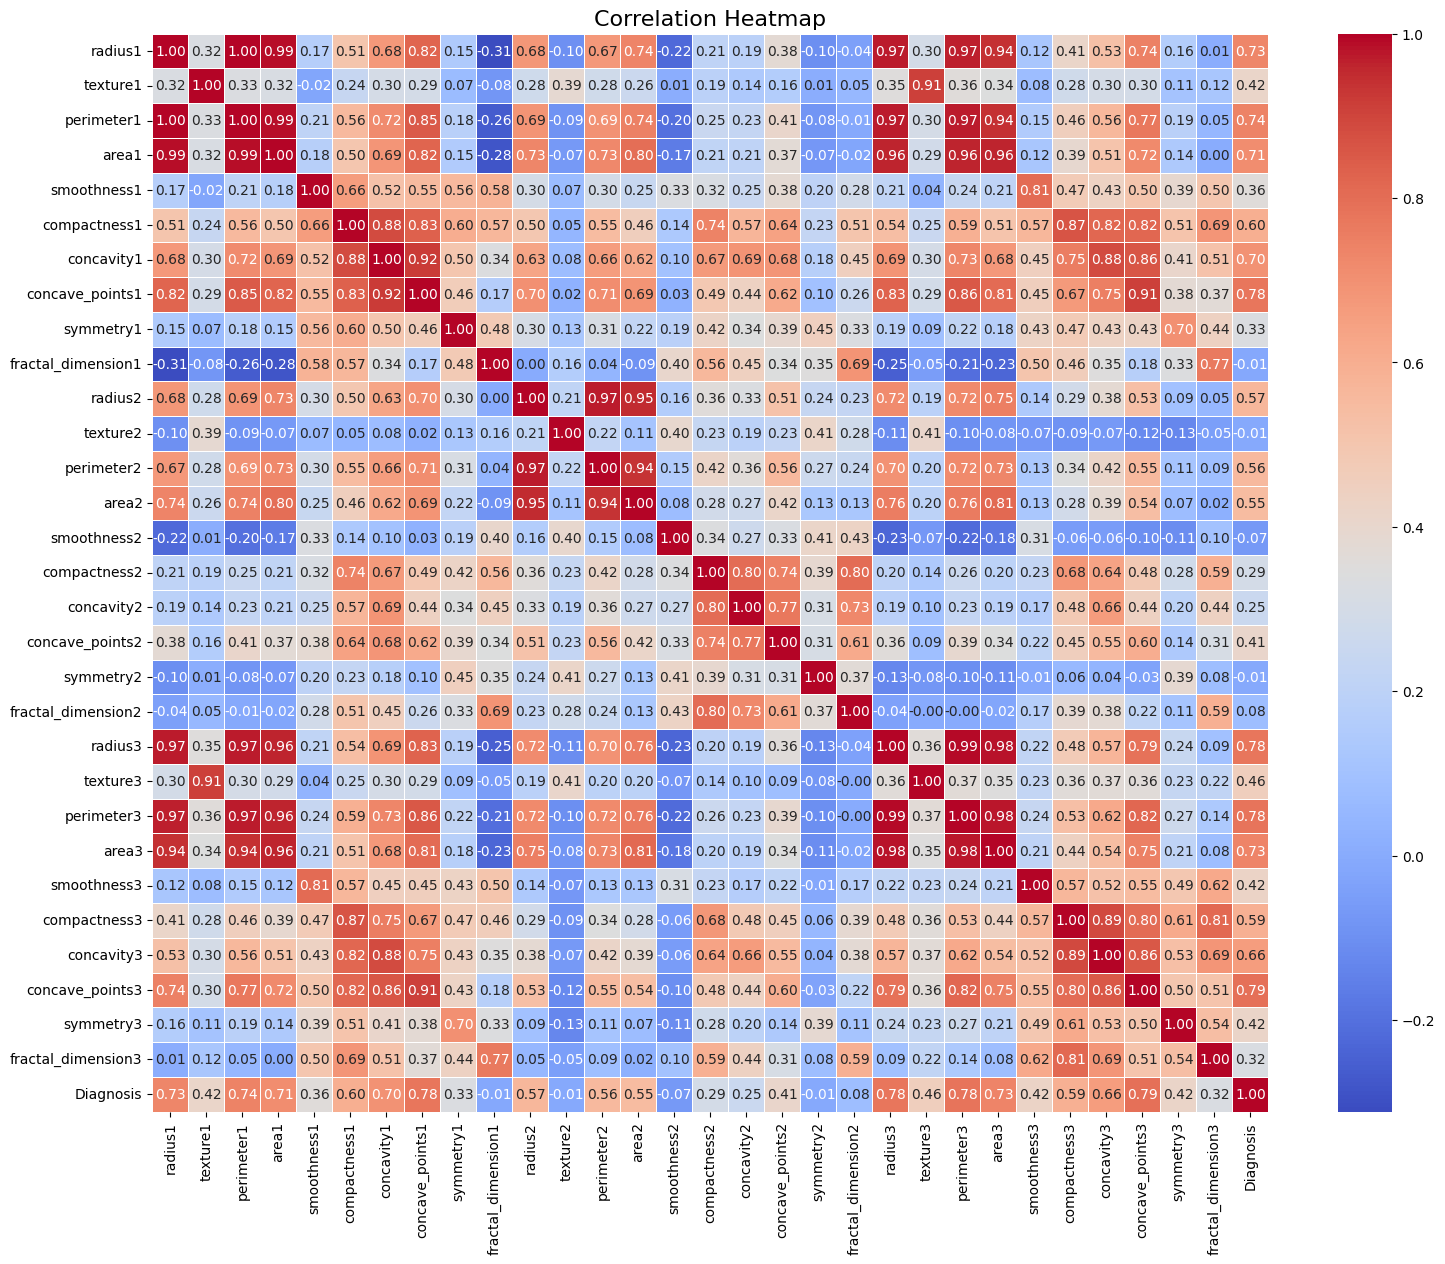

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix on the encoded DataFrame
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Title for the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()

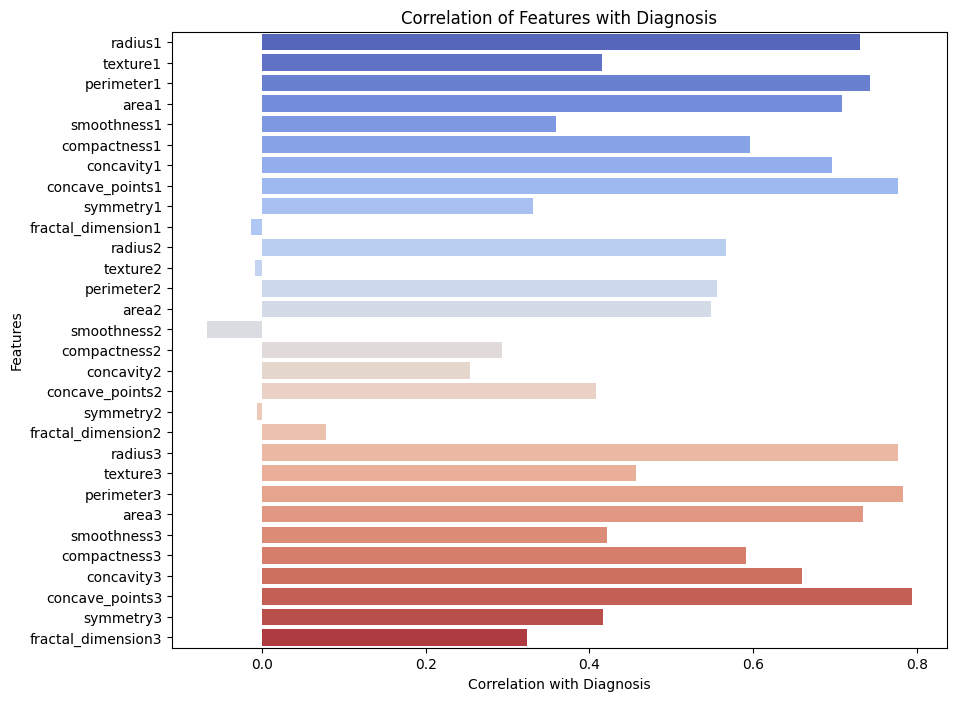

In [18]:
# Calculate the correlation between all features and the Diagnosis
corr_with_diagnosis = df.corr()['Diagnosis'].drop('Diagnosis')  # Exclude self-correlation

# Plotting the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_diagnosis.values, y=corr_with_diagnosis.index, palette='coolwarm')

# Add labels and title
plt.xlabel('Correlation with Diagnosis')
plt.ylabel('Features')
plt.title('Correlation of Features with Diagnosis')
plt.show()

###Diagnosis(Target Variable)

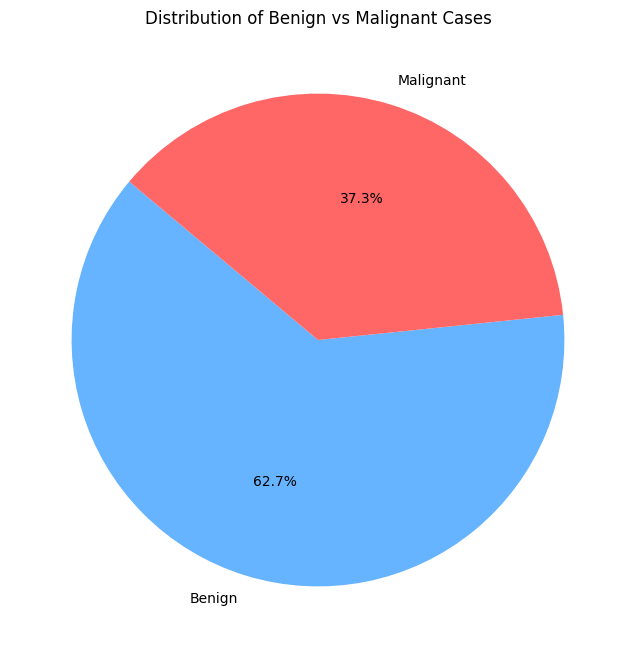

In [19]:
# Count the occurrences of each diagnosis
diagnosis_counts = df['Diagnosis'].value_counts()

# Map the counts back to the labels for the pie chart
labels = ['Benign', 'Malignant']
sizes = [diagnosis_counts[0], diagnosis_counts[1]]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff6666'], startangle=140)

# Title for the pie chart
plt.title('Distribution of Benign vs Malignant Cases')

# Show the plot
plt.show()


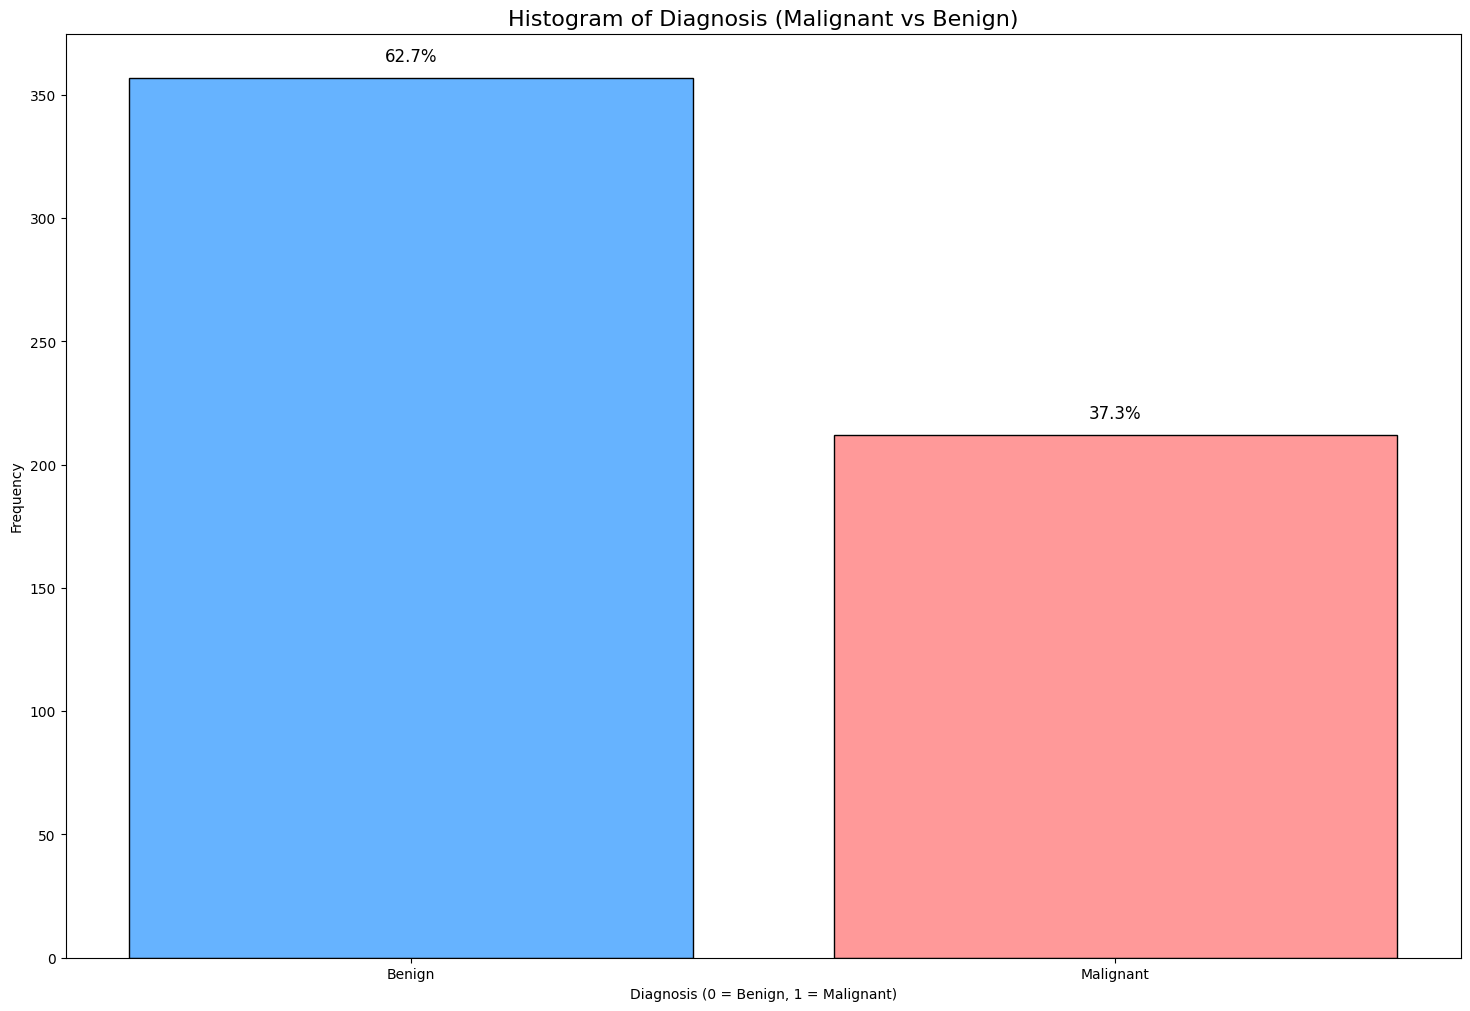

In [20]:
# Counting the occurrences of each outcome
Diagnosis_counts = df['Diagnosis'].value_counts()

# Plotting a histogram for the Diagnosis variable with different colors
plt.figure(figsize=(18, 12))
bars = plt.bar(Diagnosis_counts.index, Diagnosis_counts, color=['#66b3ff', '#ff9999'], edgecolor='black')

# Adding percentages above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{(yval / len(df) * 100):.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('Histogram of Diagnosis (Malignant vs Benign)', fontsize=16)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

###radius1

Text(0, 0.5, 'Frequency')

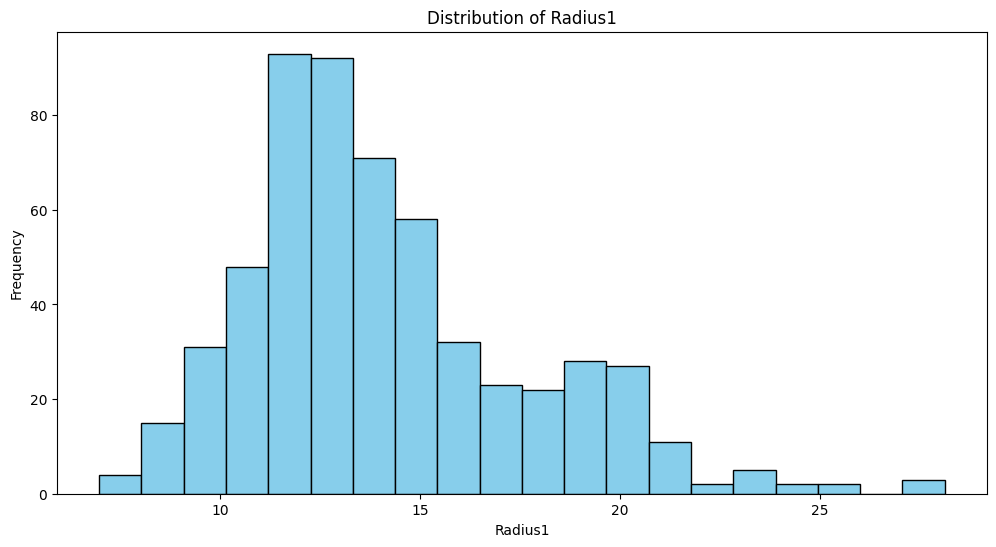

In [21]:
import matplotlib.pyplot as plt

# Plot histograms for radius1, radius2, radius3
plt.figure(figsize=(12, 6))

plt.hist(df['radius1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Radius1')
plt.xlabel('Radius1')
plt.ylabel('Frequency')

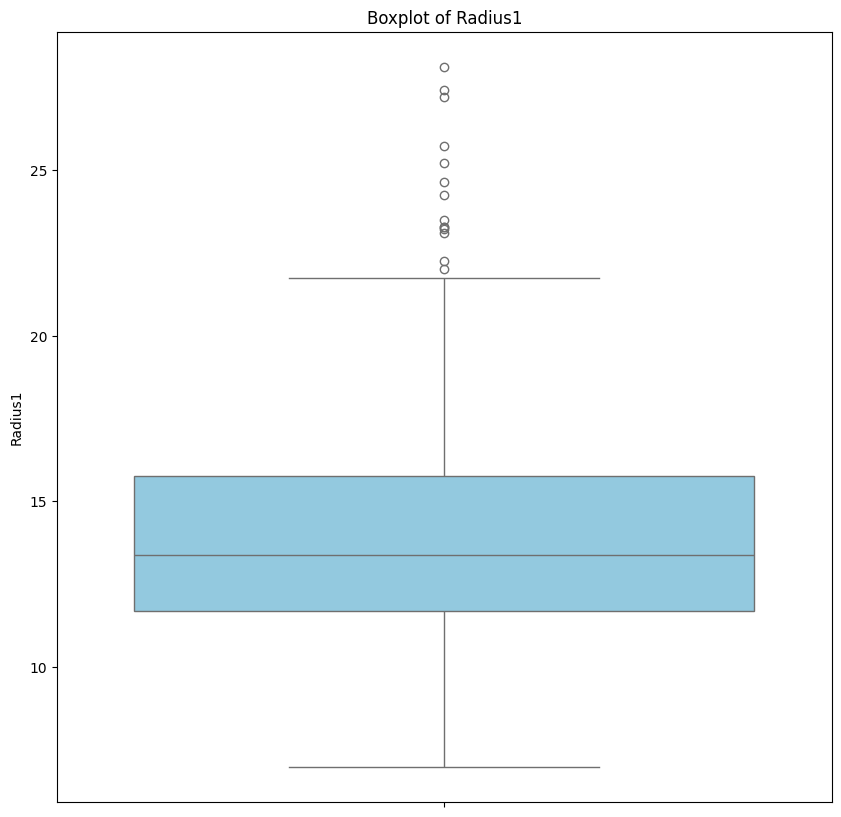

In [22]:
# Plot boxplot for radius1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['radius1'], color='skyblue')
plt.title('Boxplot of Radius1')
plt.ylabel('Radius1')
plt.show()

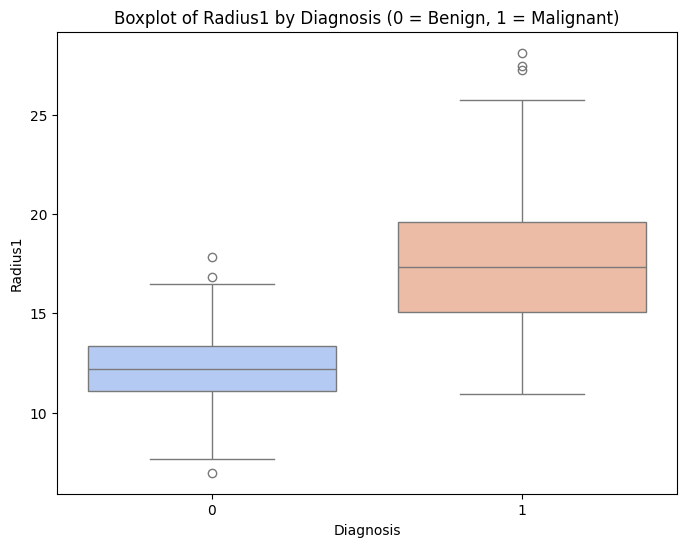

In [23]:
# Boxplot for radius1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='radius1', data=df, palette='coolwarm')
plt.title('Boxplot of Radius1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius1')
plt.show()

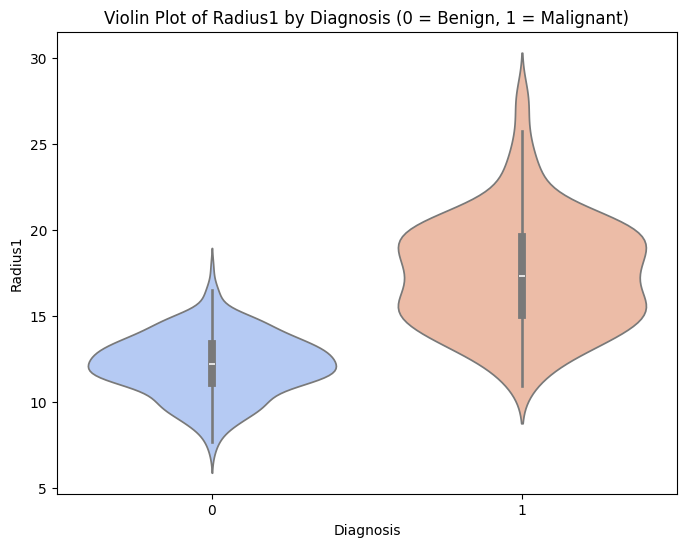

In [24]:
# Violin plot for radius1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='radius1', data=df, palette='coolwarm')
plt.title('Violin Plot of Radius1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius1')
plt.show()

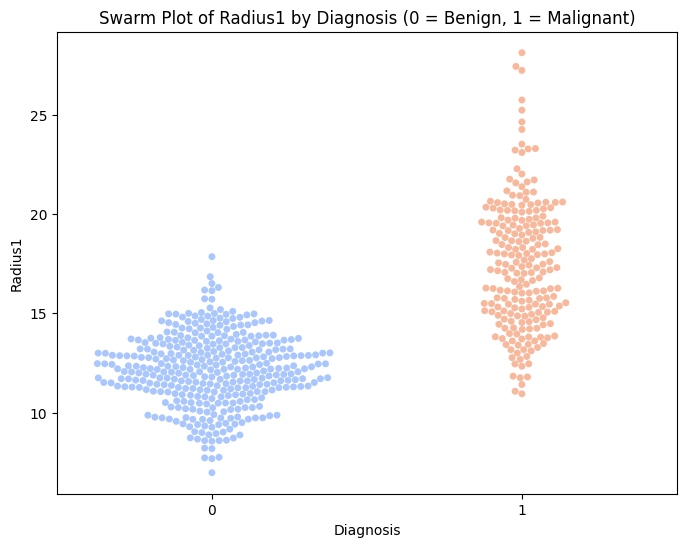

In [25]:
# Swarm plot for radius1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='radius1', data=df, palette='coolwarm')
plt.title('Swarm Plot of Radius1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius1')
plt.show()

###radius2

Text(0, 0.5, 'Frequency')

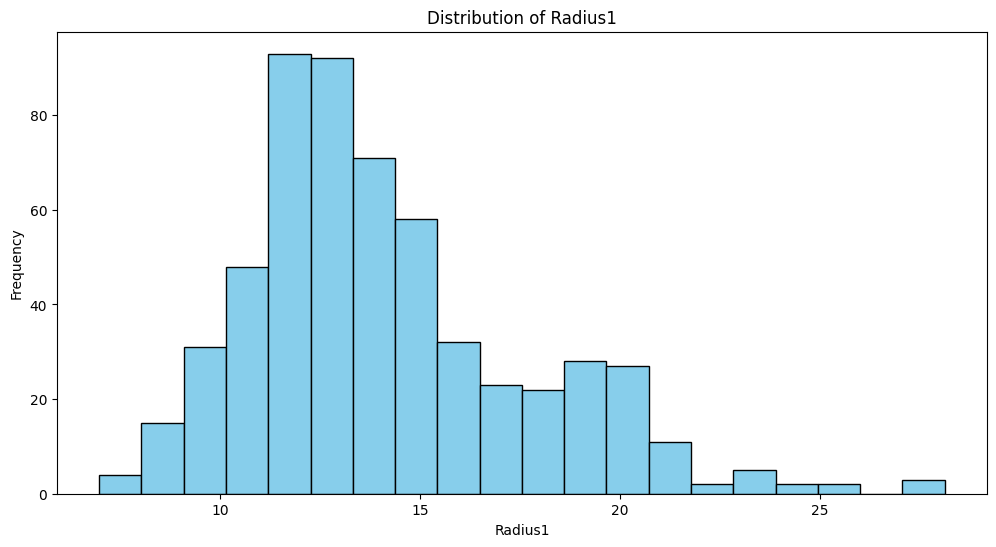

In [26]:
# Plot histograms for radius2
plt.figure(figsize=(12, 6))

plt.hist(df['radius1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Radius1')
plt.xlabel('Radius1')
plt.ylabel('Frequency')

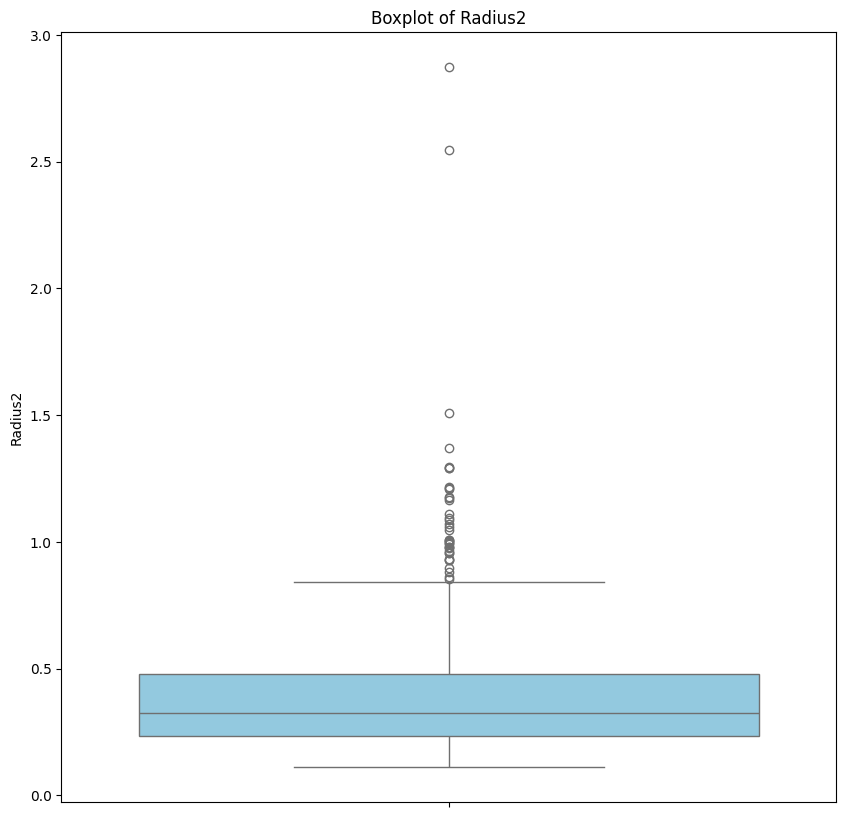

In [27]:
# Plot boxplot for radius2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['radius2'], color='skyblue')
plt.title('Boxplot of Radius2')
plt.ylabel('Radius2')
plt.show()

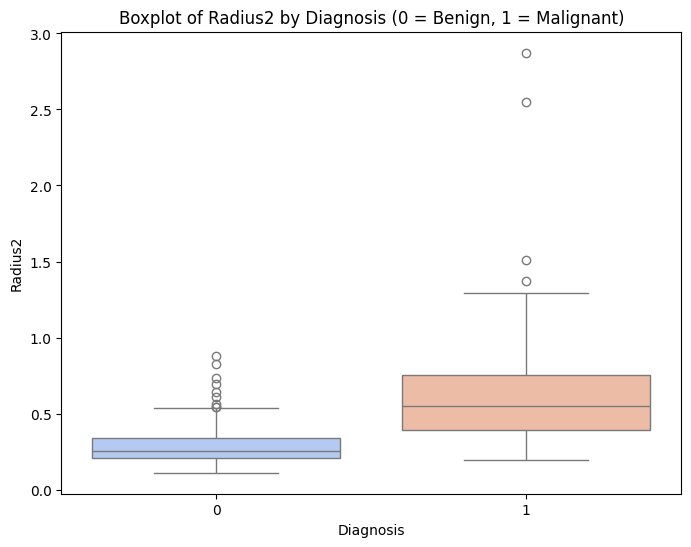

In [28]:
# Boxplot for radius2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='radius2', data=df, palette='coolwarm')
plt.title('Boxplot of Radius2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius2')
plt.show()

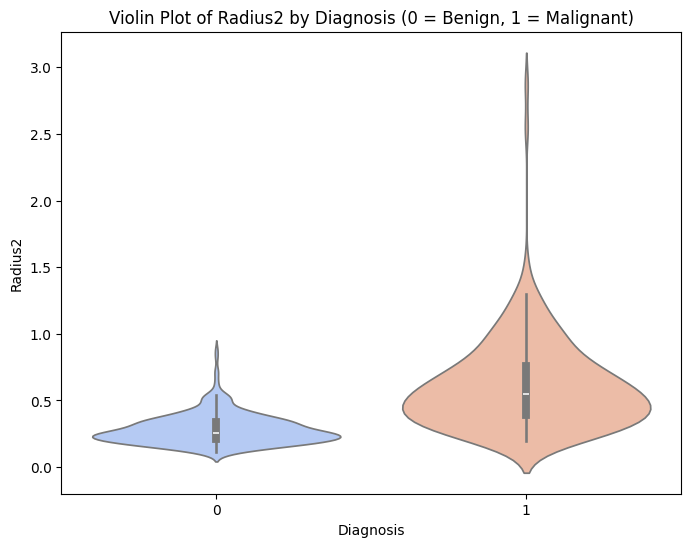

In [29]:
# Violin plot for radius2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='radius2', data=df, palette='coolwarm')
plt.title('Violin Plot of Radius2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius2')
plt.show()

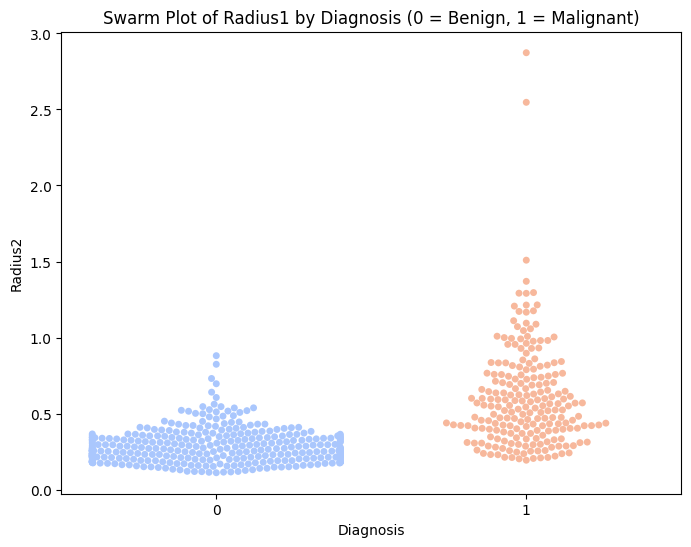

In [30]:
# Swarm plot for radius2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='radius2', data=df, palette='coolwarm')
plt.title('Swarm Plot of Radius1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius2')
plt.show()

###radius3

Text(0, 0.5, 'Frequency')

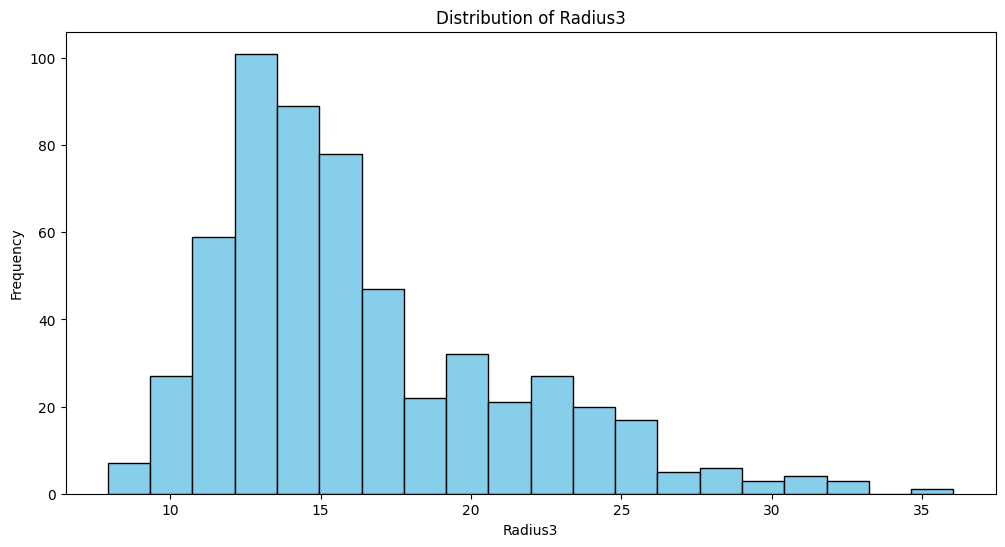

In [31]:
# Plot histograms for radius3
plt.figure(figsize=(12, 6))

plt.hist(df['radius3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Radius3')
plt.xlabel('Radius3')
plt.ylabel('Frequency')

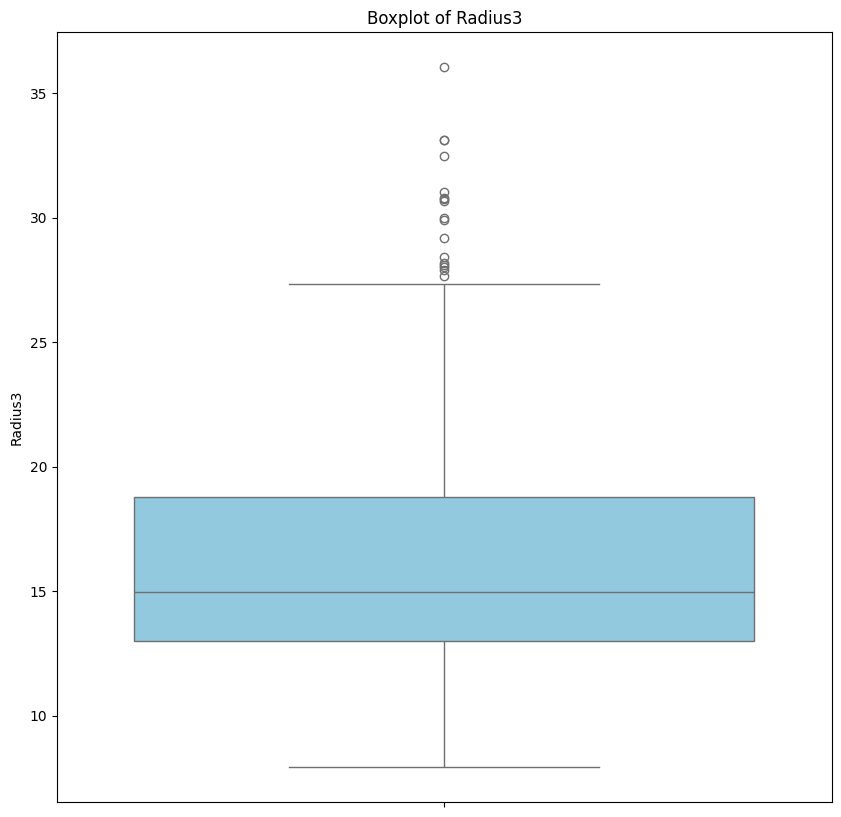

In [32]:
# Plot boxplot for radius3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['radius3'], color='skyblue')
plt.title('Boxplot of Radius3')
plt.ylabel('Radius3')
plt.show()

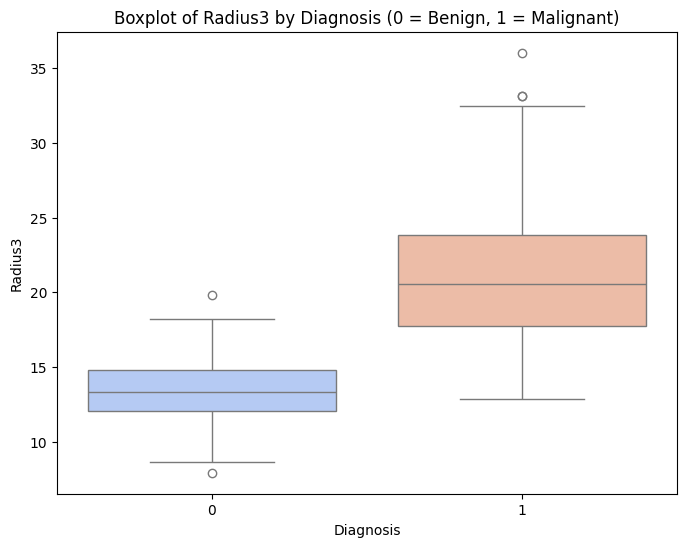

In [33]:
# Boxplot for radius3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='radius3', data=df, palette='coolwarm')
plt.title('Boxplot of Radius3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius3')
plt.show()

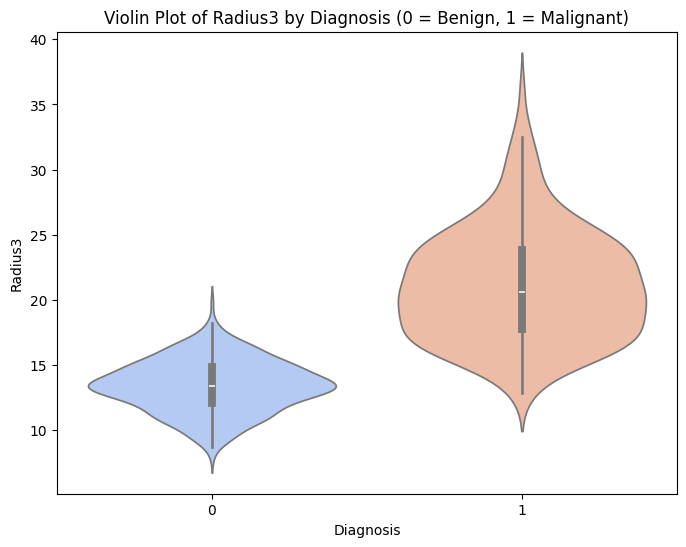

In [34]:
# Violin plot for radius3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='radius3', data=df, palette='coolwarm')
plt.title('Violin Plot of Radius3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius3')
plt.show()

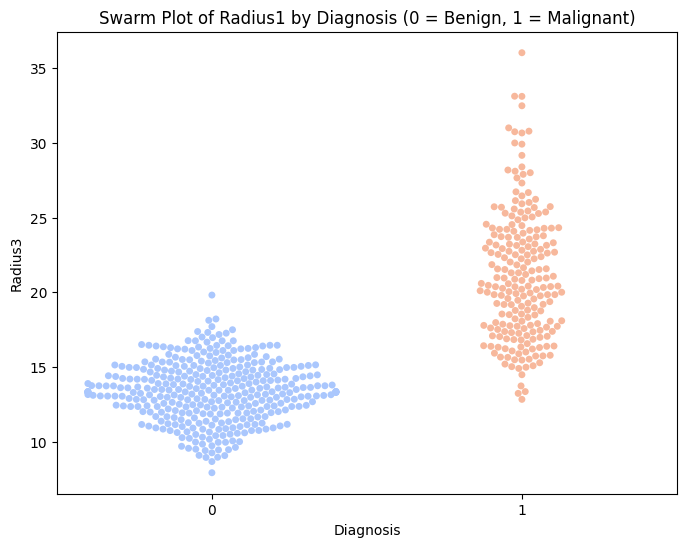

In [35]:
# Swarm plot for radius3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='radius3', data=df, palette='coolwarm')
plt.title('Swarm Plot of Radius1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius3')
plt.show()

###texture1

Text(0, 0.5, 'Frequency')

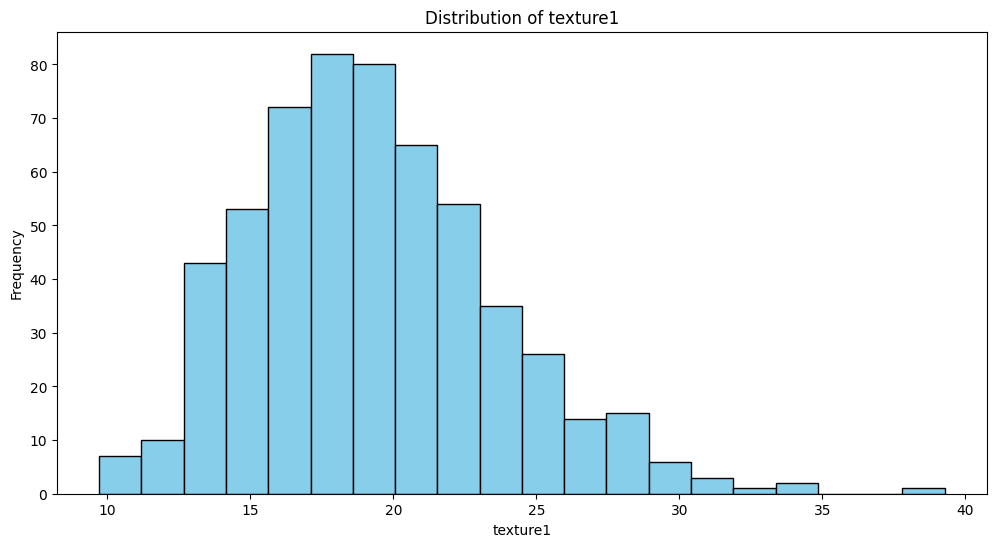

In [36]:
# Plot histograms for texture1
plt.figure(figsize=(12, 6))

plt.hist(df['texture1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of texture1')
plt.xlabel('texture1')
plt.ylabel('Frequency')

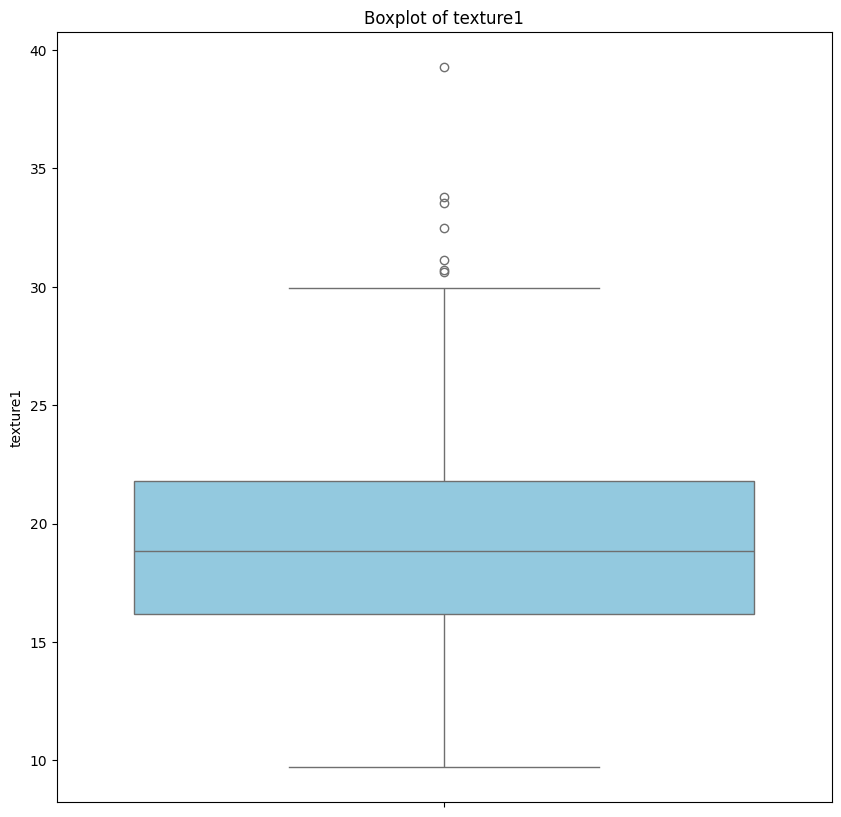

In [37]:
# Plot boxplot for texture1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['texture1'], color='skyblue')
plt.title('Boxplot of texture1')
plt.ylabel('texture1')
plt.show()

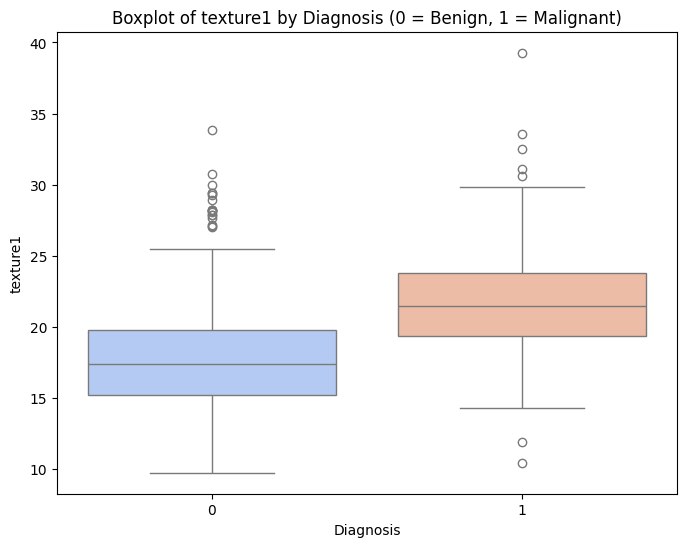

In [38]:
# Boxplot for texture1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='texture1', data=df, palette='coolwarm')
plt.title('Boxplot of texture1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('texture1')
plt.show()

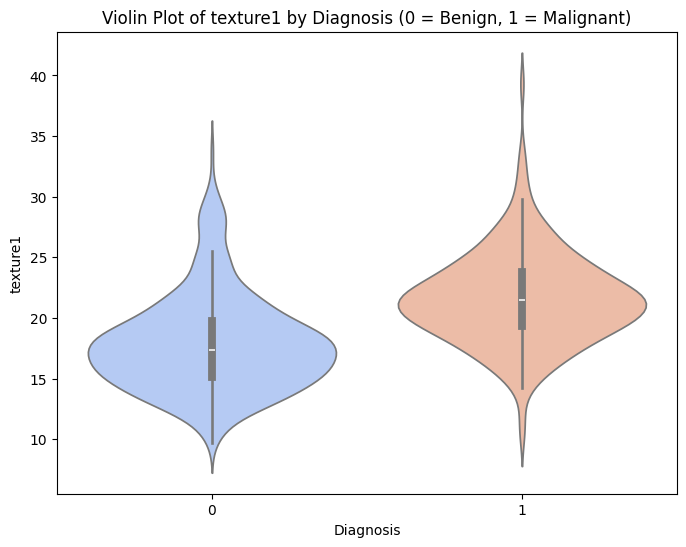

In [39]:
# Violin plot for texture1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='texture1', data=df, palette='coolwarm')
plt.title('Violin Plot of texture1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('texture1')
plt.show()

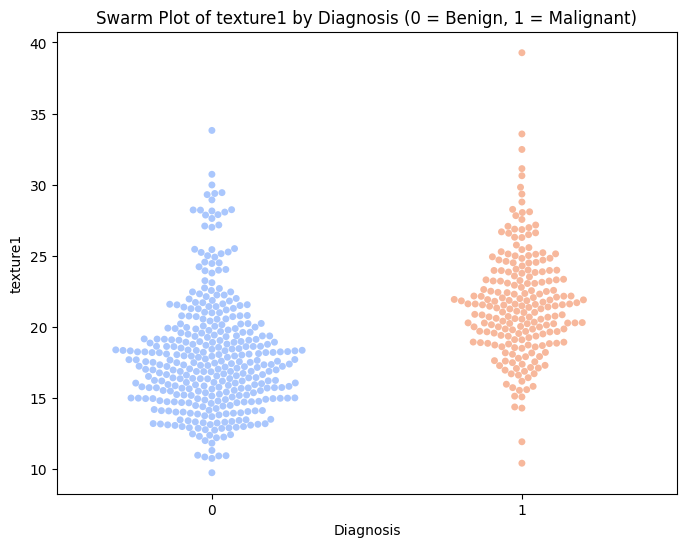

In [40]:
# Swarm plot for texture1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='texture1', data=df, palette='coolwarm')
plt.title('Swarm Plot of texture1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('texture1')
plt.show()

###texture2

Text(0, 0.5, 'Frequency')

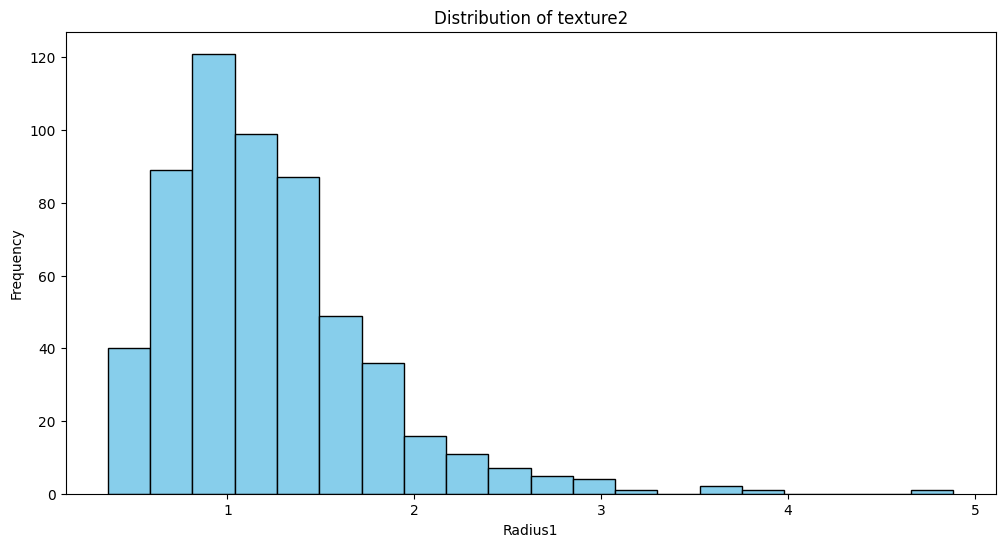

In [41]:
# Plot histograms for texture2
plt.figure(figsize=(12, 6))

plt.hist(df['texture2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of texture2')
plt.xlabel('Radius1')
plt.ylabel('Frequency')

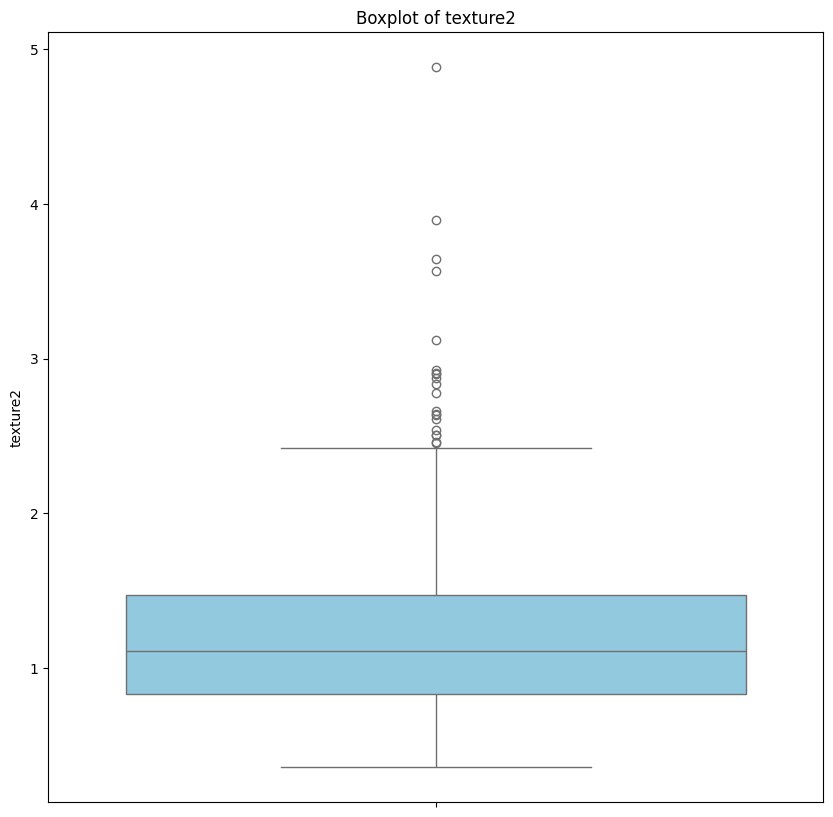

In [42]:
# Plot boxplot for texture2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['texture2'], color='skyblue')
plt.title('Boxplot of texture2')
plt.ylabel('texture2')
plt.show()

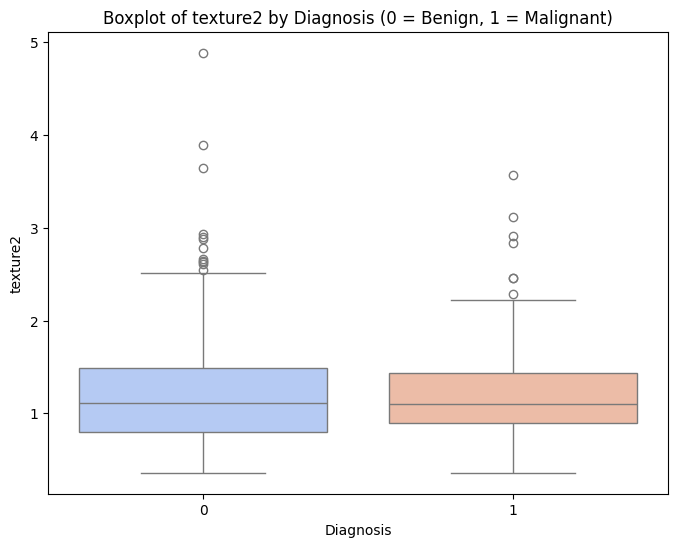

In [43]:
# Boxplot for texture2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='texture2', data=df, palette='coolwarm')
plt.title('Boxplot of texture2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('texture2')
plt.show()

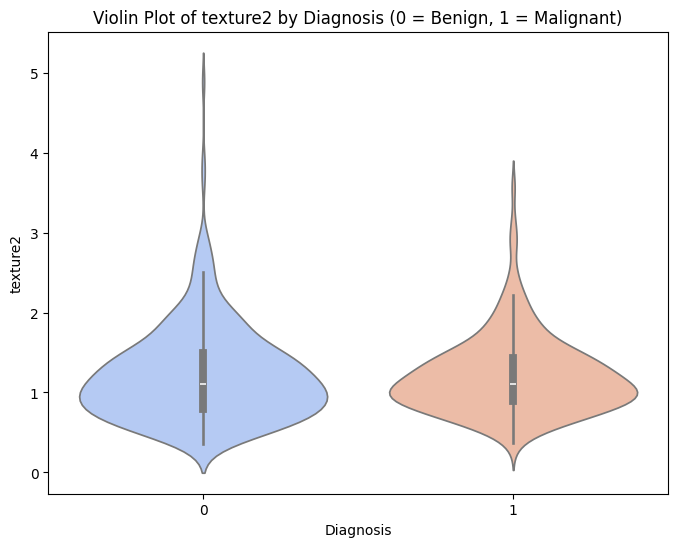

In [44]:
# Violin plot for texture2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='texture2', data=df, palette='coolwarm')
plt.title('Violin Plot of texture2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('texture2')
plt.show()

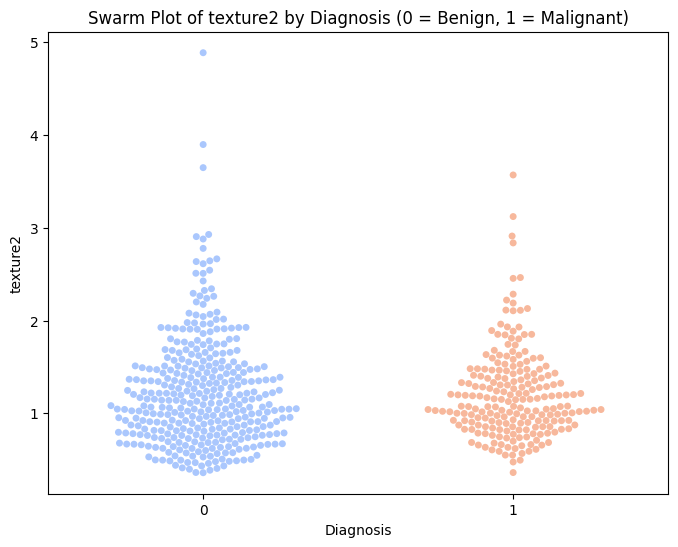

In [45]:
# Swarm plot for texture2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='texture2', data=df, palette='coolwarm')
plt.title('Swarm Plot of texture2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('texture2')
plt.show()

###texture3

Text(0, 0.5, 'Frequency')

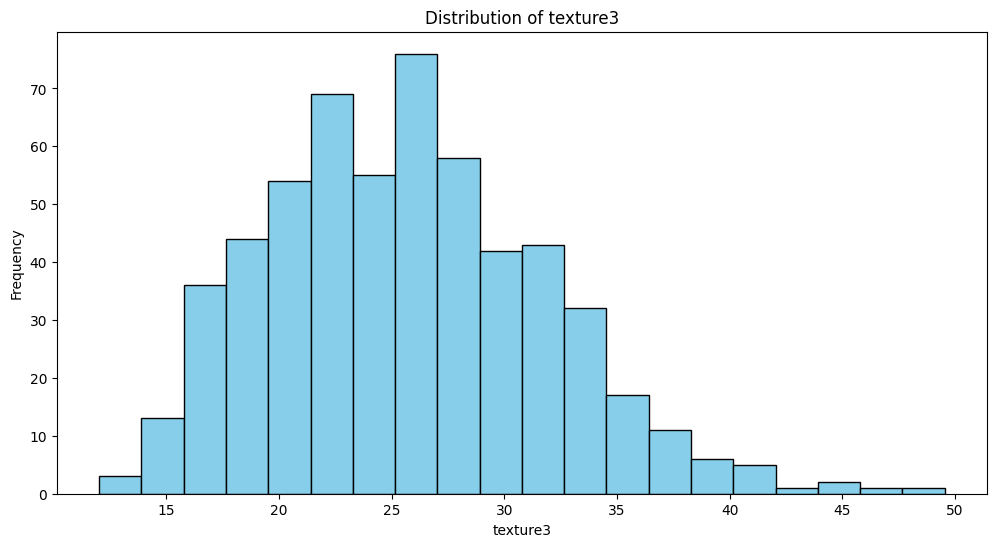

In [46]:
# Plot histograms for texture3
plt.figure(figsize=(12, 6))

plt.hist(df['texture3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of texture3')
plt.xlabel('texture3')
plt.ylabel('Frequency')

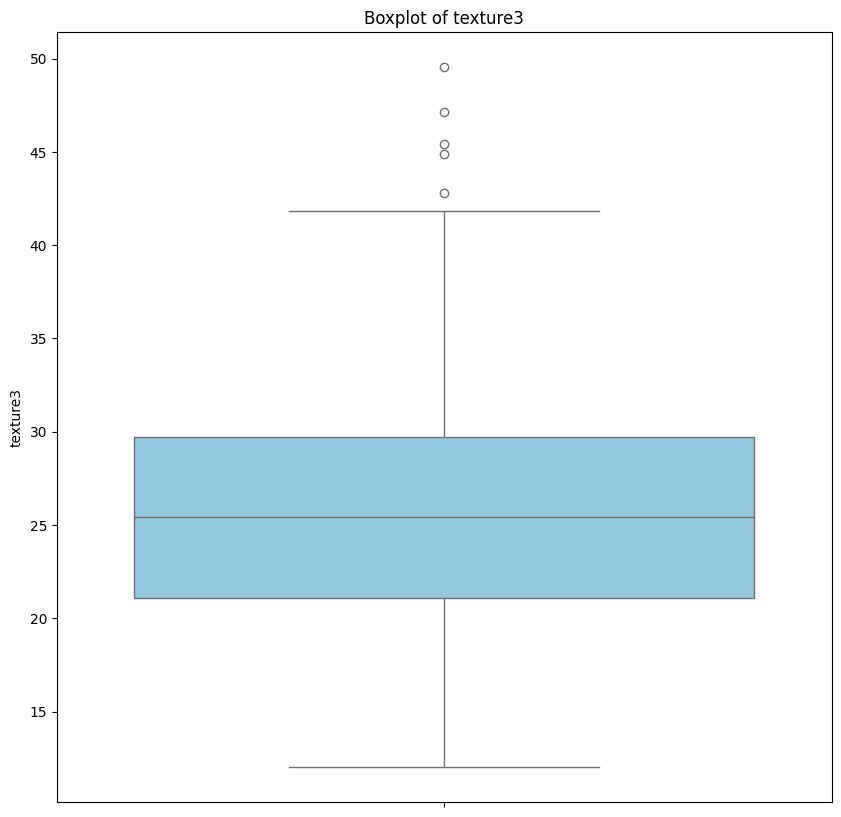

In [47]:
# Plot boxplot for texture3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['texture3'], color='skyblue')
plt.title('Boxplot of texture3')
plt.ylabel('texture3')
plt.show()

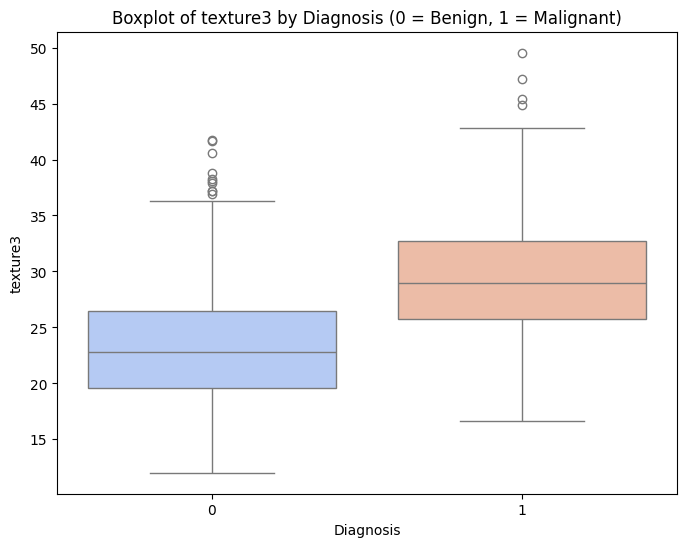

In [48]:
# Boxplot for texture3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='texture3', data=df, palette='coolwarm')
plt.title('Boxplot of texture3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('texture3')
plt.show()

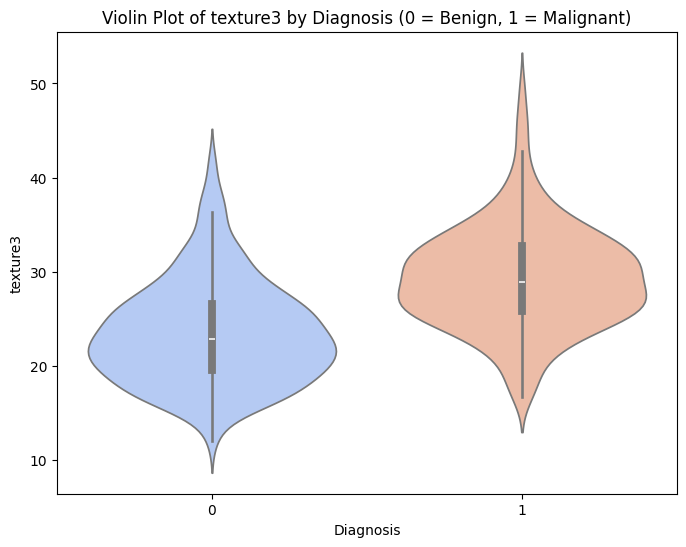

In [49]:
# Violin plot for texture3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='texture3', data=df, palette='coolwarm')
plt.title('Violin Plot of texture3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('texture3')
plt.show()

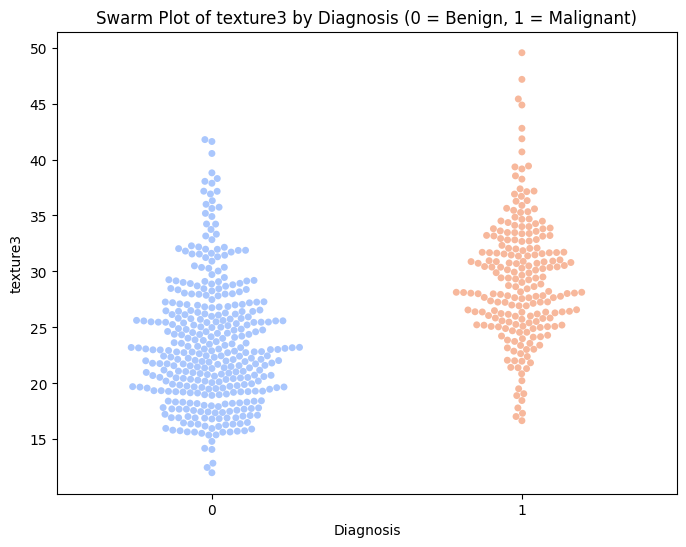

In [50]:
# Swarm plot for texture3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='texture3', data=df, palette='coolwarm')
plt.title('Swarm Plot of texture3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('texture3')
plt.show()

###perimeter1

Text(0, 0.5, 'Frequency')

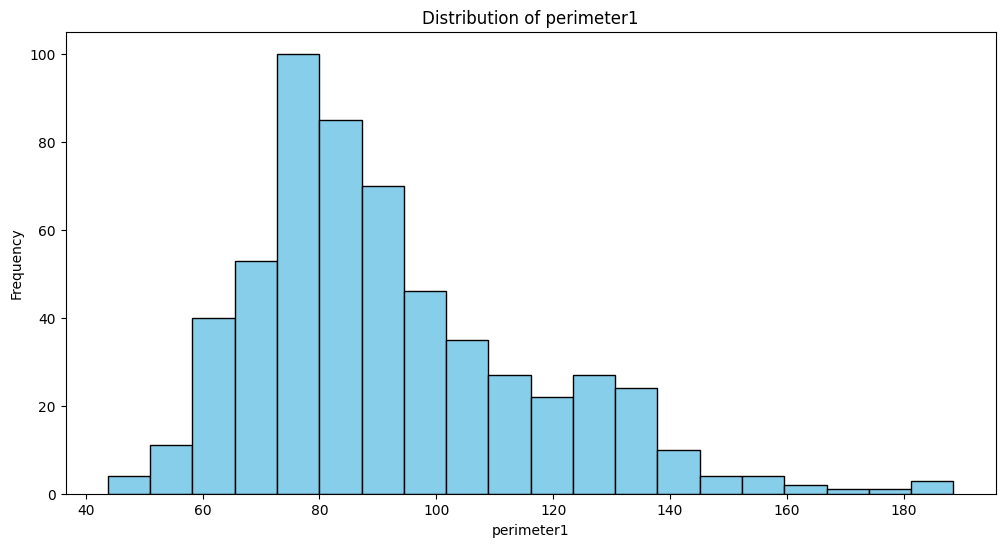

In [51]:
# Plot histograms for perimeter1
plt.figure(figsize=(12, 6))

plt.hist(df['perimeter1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of perimeter1')
plt.xlabel('perimeter1')
plt.ylabel('Frequency')

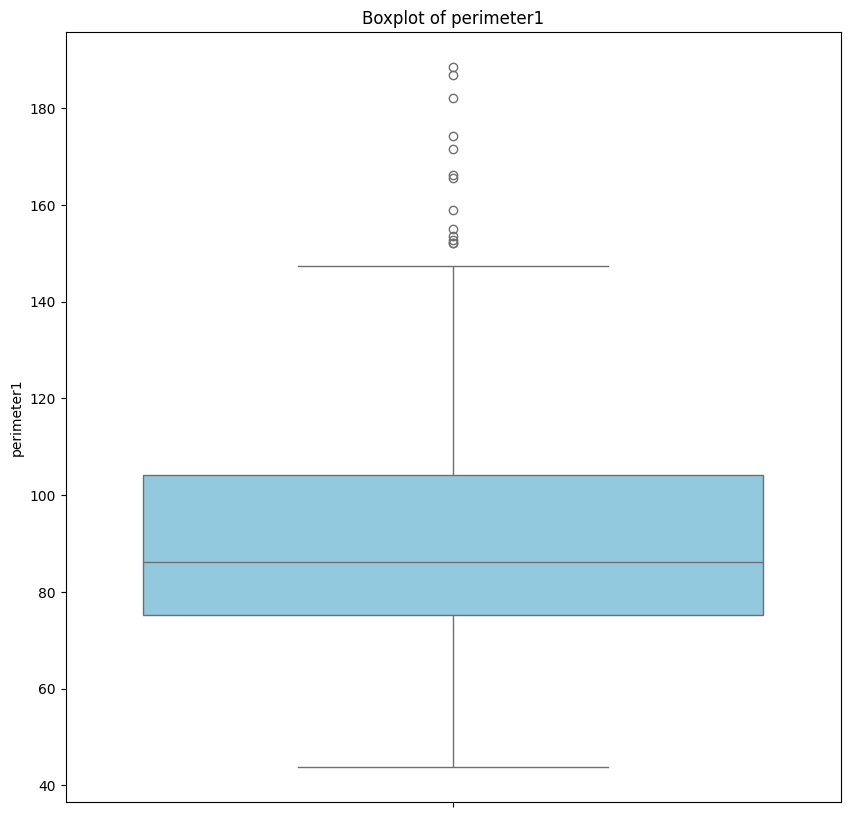

In [52]:
# Plot boxplot for perimeter1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['perimeter1'], color='skyblue')
plt.title('Boxplot of perimeter1')
plt.ylabel('perimeter1')
plt.show()

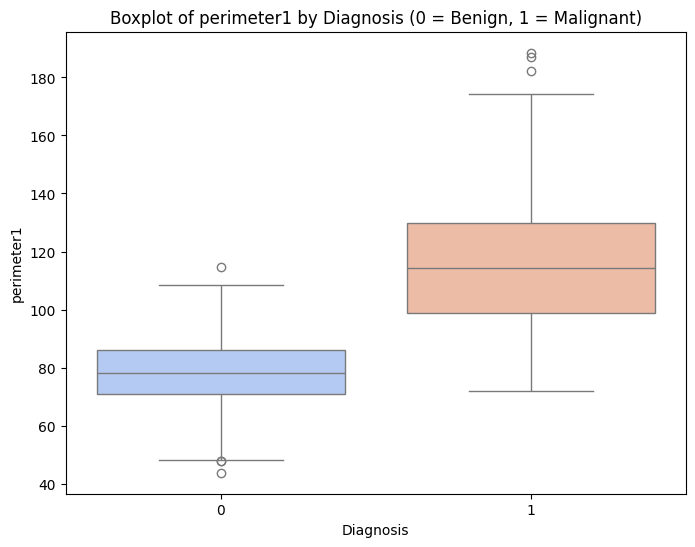

In [53]:
# Boxplot for perimeter1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='perimeter1', data=df, palette='coolwarm')
plt.title('Boxplot of perimeter1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('perimeter1')
plt.show()

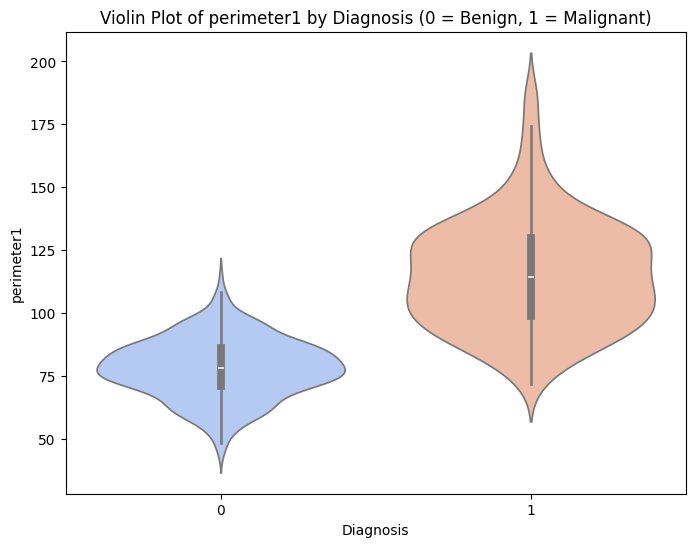

In [54]:
# Violin plot for perimeter1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='perimeter1', data=df, palette='coolwarm')
plt.title('Violin Plot of perimeter1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('perimeter1')
plt.show()

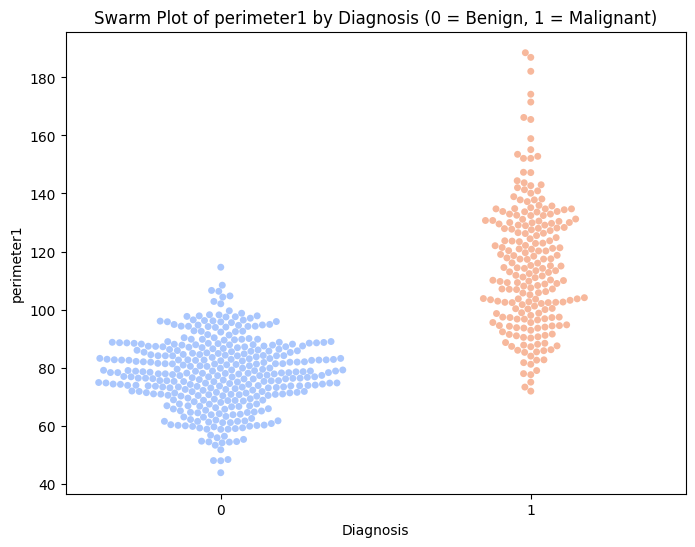

In [55]:
# Swarm plot for perimeter1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='perimeter1', data=df, palette='coolwarm')
plt.title('Swarm Plot of perimeter1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('perimeter1')
plt.show()

###perimeter2

Text(0, 0.5, 'Frequency')

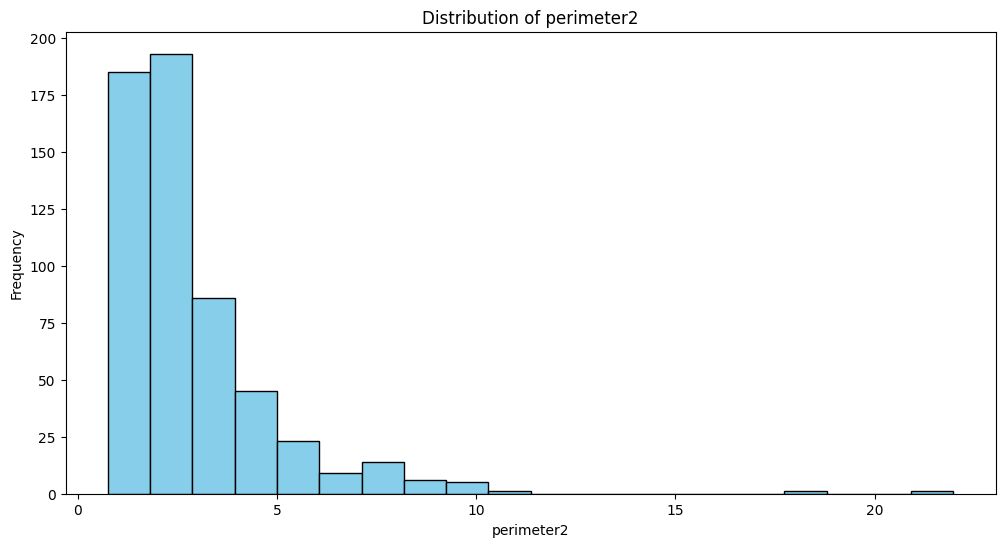

In [56]:
# Plot histograms for perimeter2
plt.figure(figsize=(12, 6))

plt.hist(df['perimeter2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of perimeter2')
plt.xlabel('perimeter2')
plt.ylabel('Frequency')

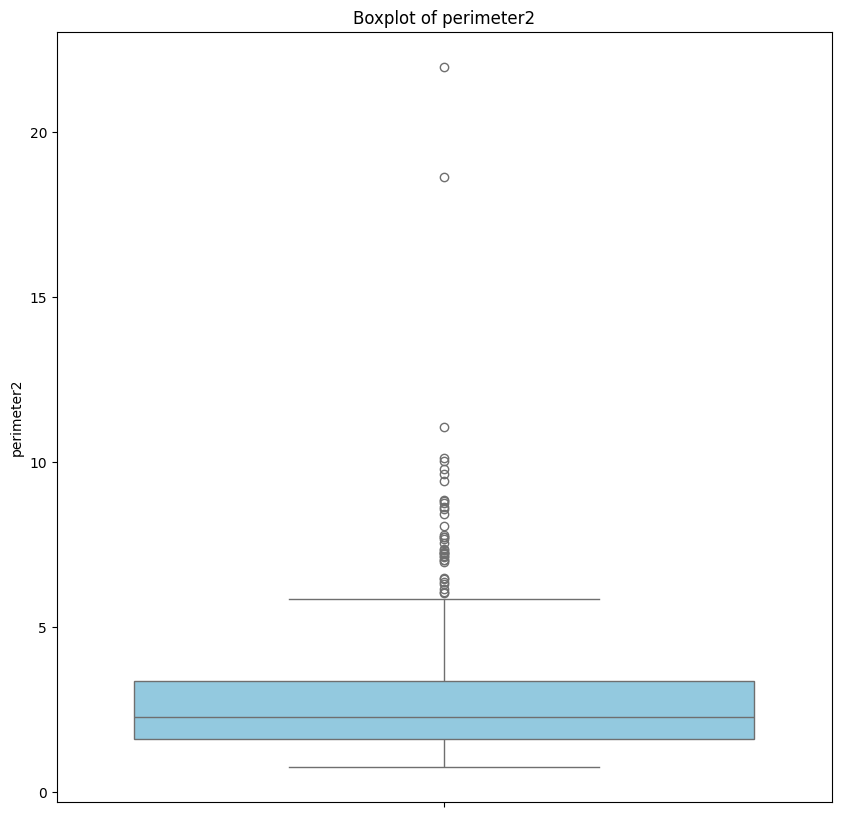

In [57]:
# Plot boxplot for radius2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['perimeter2'], color='skyblue')
plt.title('Boxplot of perimeter2')
plt.ylabel('perimeter2')
plt.show()

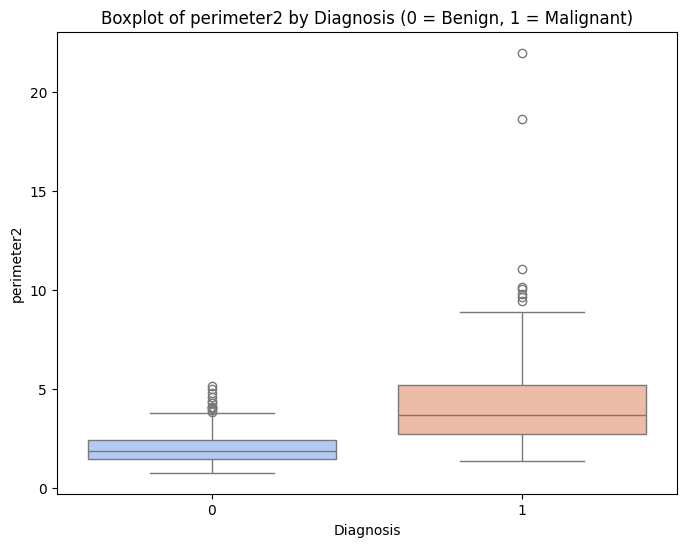

In [58]:
# Boxplot for perimeter2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='perimeter2', data=df, palette='coolwarm')
plt.title('Boxplot of perimeter2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('perimeter2')
plt.show()

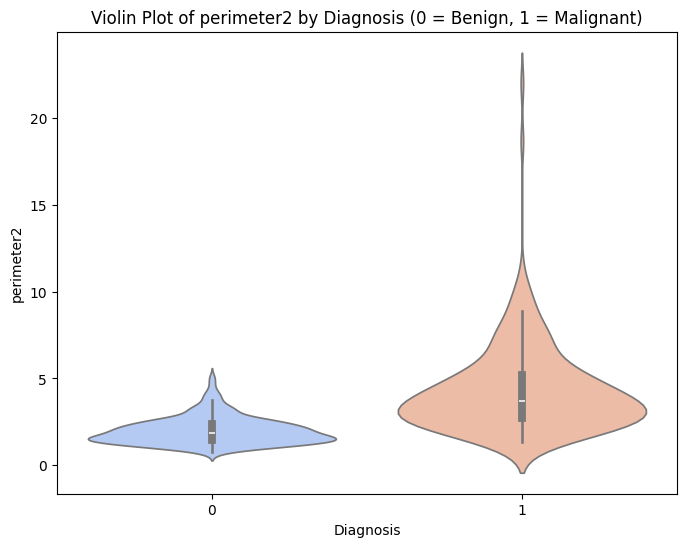

In [59]:
# Violin plot for perimeter2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='perimeter2', data=df, palette='coolwarm')
plt.title('Violin Plot of perimeter2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('perimeter2')
plt.show()

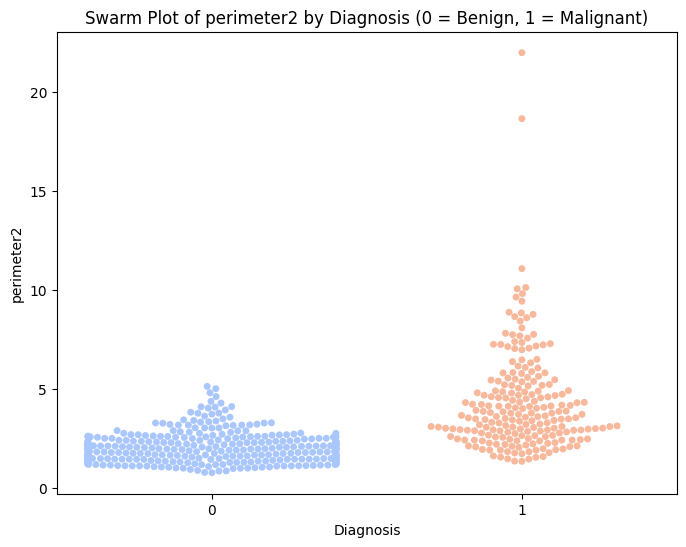

In [60]:
# Swarm plot for perimeter2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='perimeter2', data=df, palette='coolwarm')
plt.title('Swarm Plot of perimeter2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('perimeter2')
plt.show()

###perimeter3

Text(0, 0.5, 'Frequency')

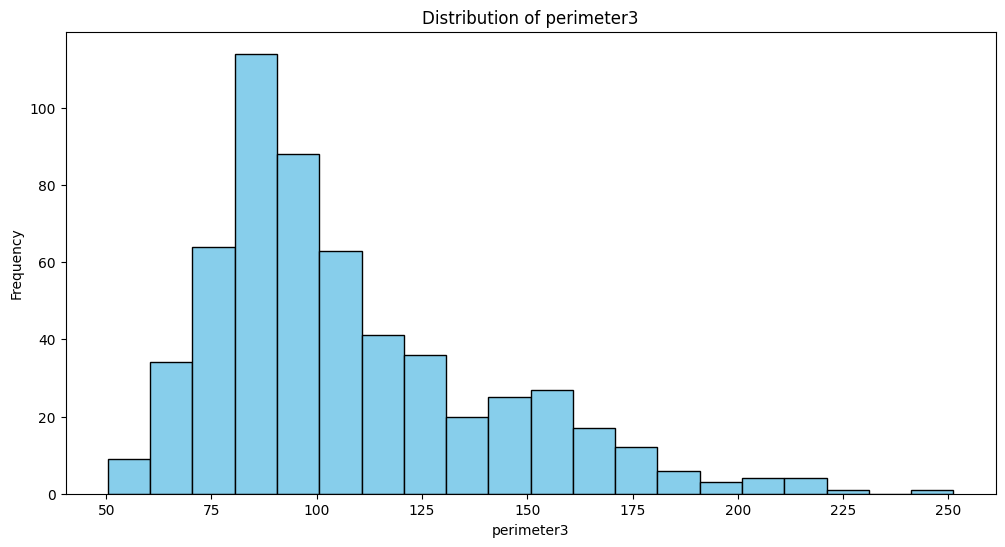

In [61]:
# Plot histograms for perimeter3
plt.figure(figsize=(12, 6))

plt.hist(df['perimeter3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of perimeter3')
plt.xlabel('perimeter3')
plt.ylabel('Frequency')

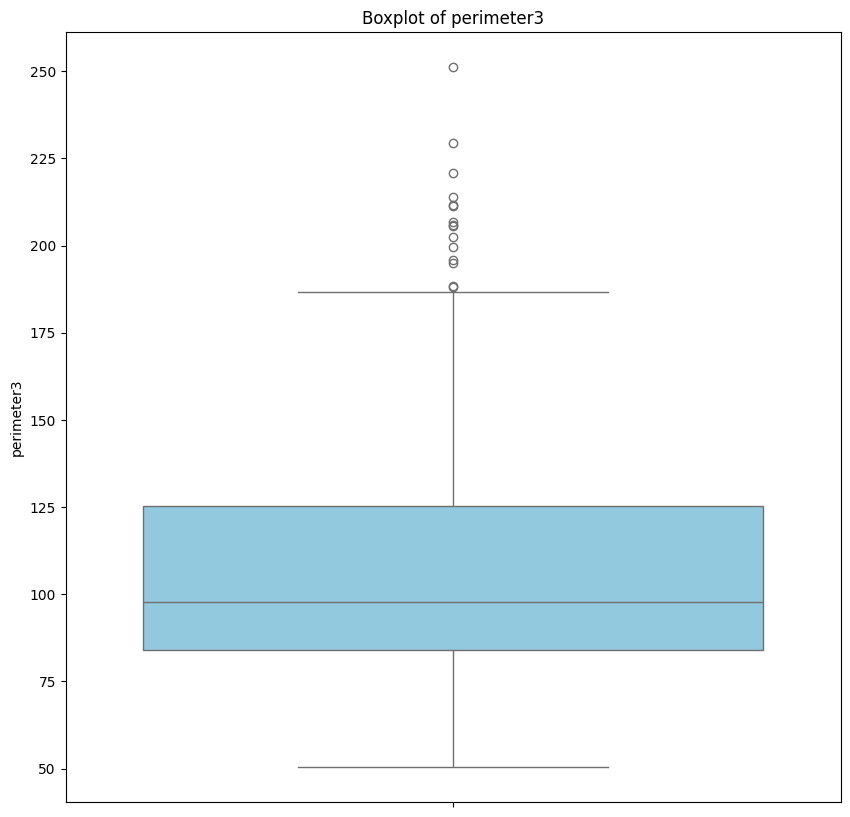

In [62]:
# Plot boxplot for perimeter3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['perimeter3'], color='skyblue')
plt.title('Boxplot of perimeter3')
plt.ylabel('perimeter3')
plt.show()

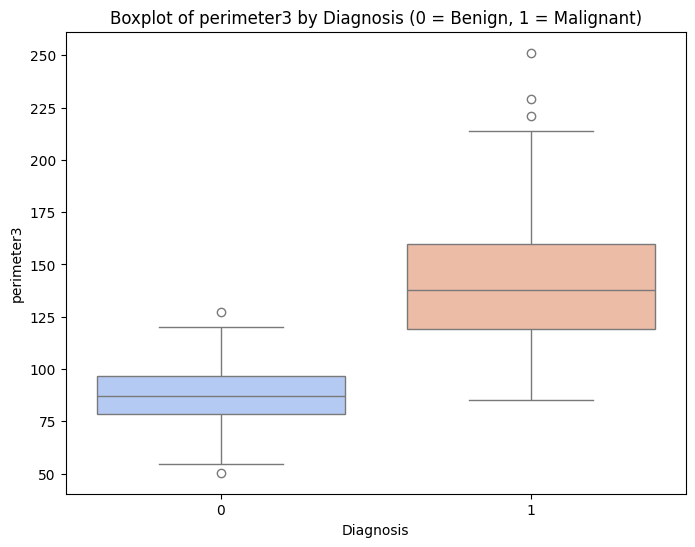

In [63]:
# Boxplot for perimeter3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='perimeter3', data=df, palette='coolwarm')
plt.title('Boxplot of perimeter3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('perimeter3')
plt.show()

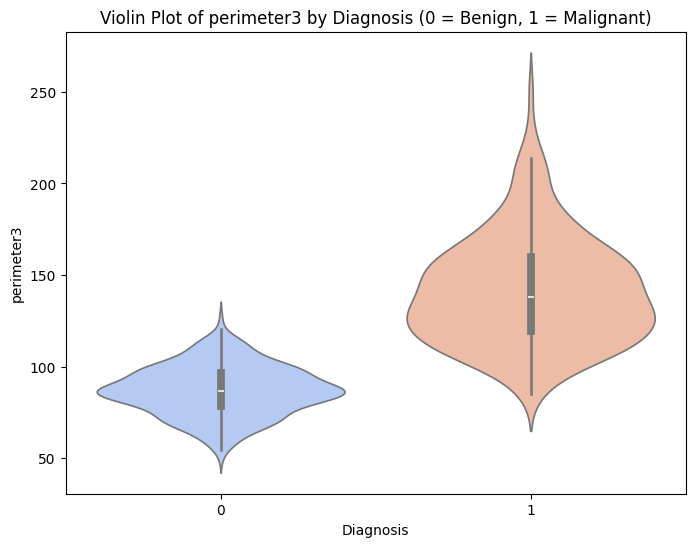

In [64]:
# Violin plot for perimeter3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='perimeter3', data=df, palette='coolwarm')
plt.title('Violin Plot of perimeter3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('perimeter3')
plt.show()

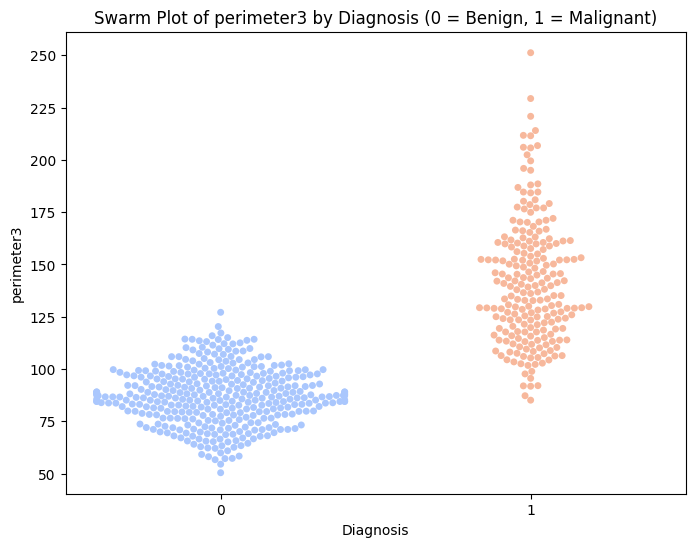

In [65]:
# Swarm plot for perimeter3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='perimeter3', data=df, palette='coolwarm')
plt.title('Swarm Plot of perimeter3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('perimeter3')
plt.show()

###area1

Text(0, 0.5, 'Frequency')

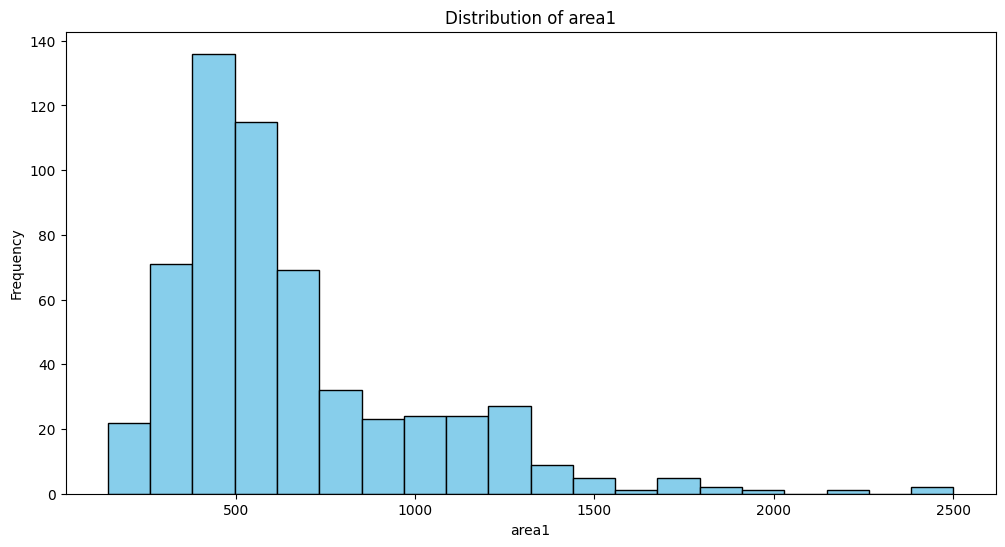

In [66]:
# Plot histograms for area1
plt.figure(figsize=(12, 6))

plt.hist(df['area1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of area1')
plt.xlabel('area1')
plt.ylabel('Frequency')

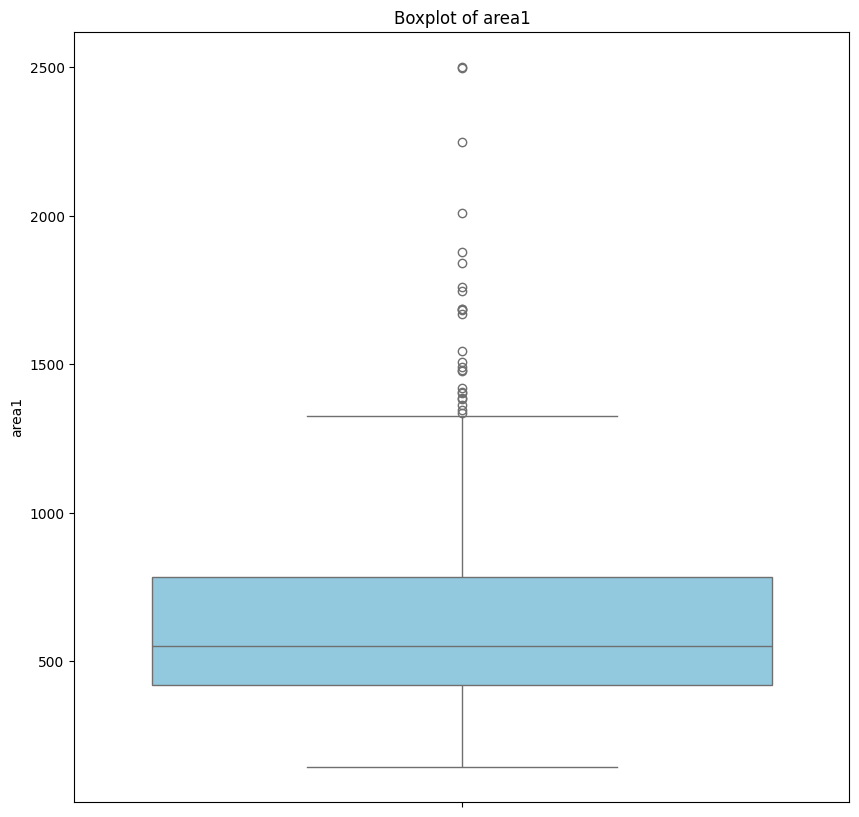

In [67]:
# Plot boxplot for area1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['area1'], color='skyblue')
plt.title('Boxplot of area1')
plt.ylabel('area1')
plt.show()

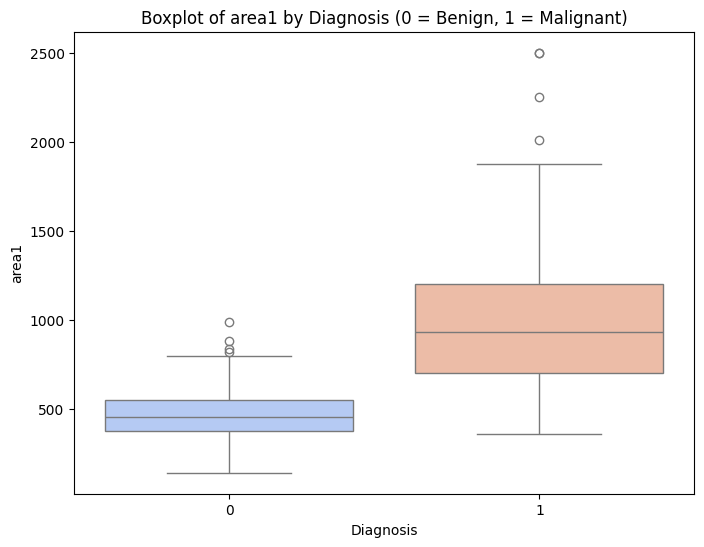

In [68]:
# Boxplot for area1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='area1', data=df, palette='coolwarm')
plt.title('Boxplot of area1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('area1')
plt.show()

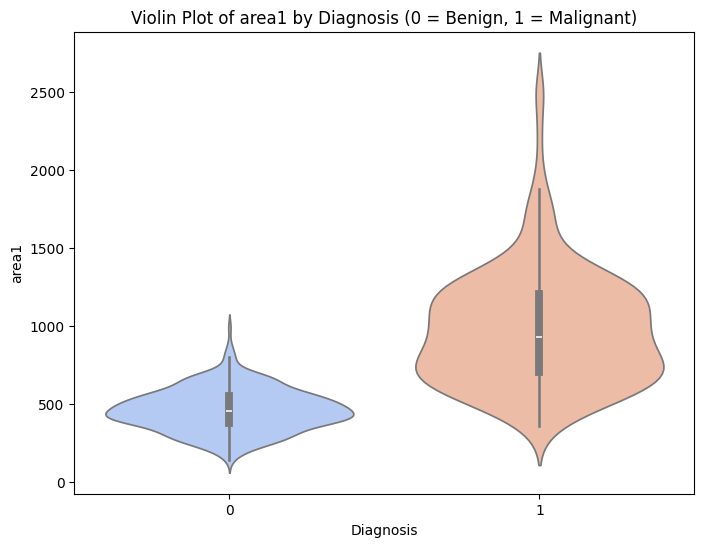

In [69]:
# Violin plot for area1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='area1', data=df, palette='coolwarm')
plt.title('Violin Plot of area1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('area1')
plt.show()

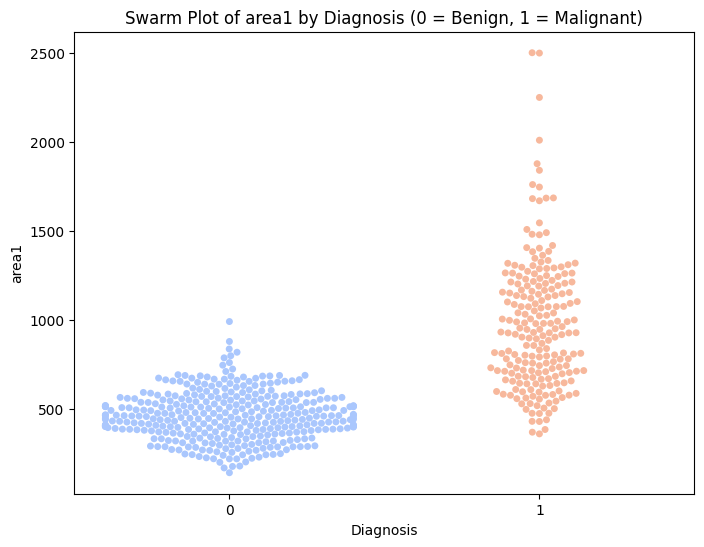

In [70]:
# Swarm plot for area1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='area1', data=df, palette='coolwarm')
plt.title('Swarm Plot of area1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('area1')
plt.show()

###area2

Text(0, 0.5, 'Frequency')

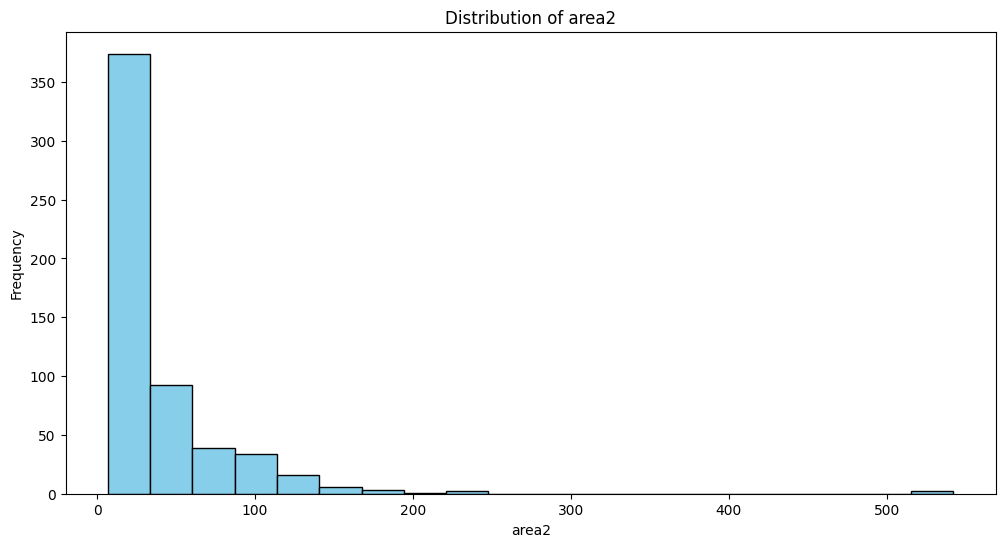

In [71]:
# Plot histograms for area2
plt.figure(figsize=(12, 6))

plt.hist(df['area2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of area2')
plt.xlabel('area2')
plt.ylabel('Frequency')

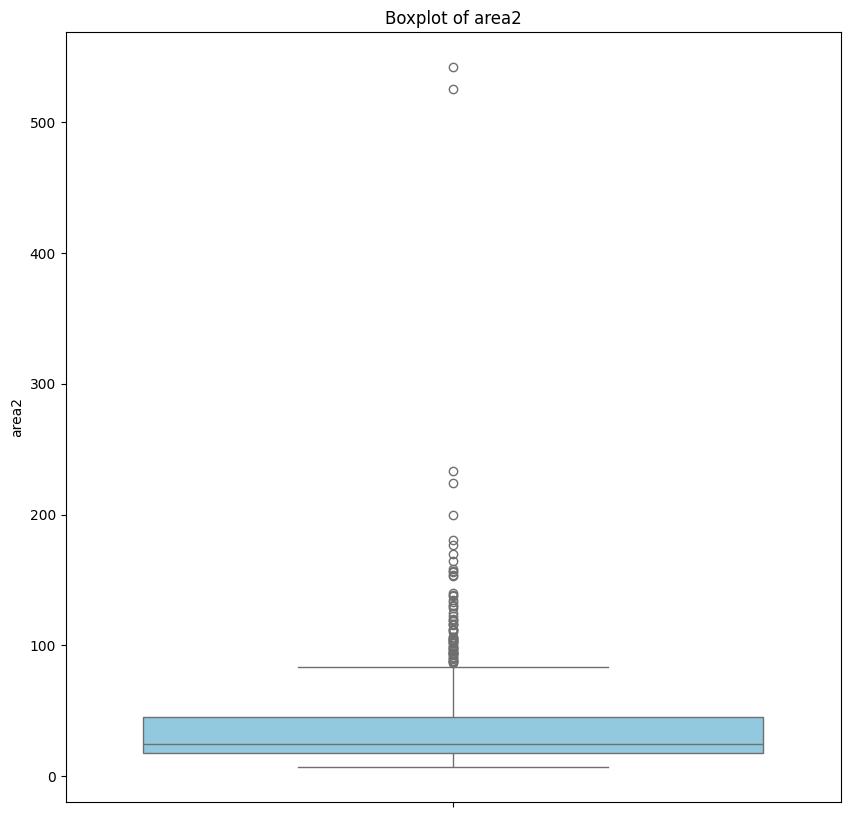

In [72]:
# Plot boxplot for area2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['area2'], color='skyblue')
plt.title('Boxplot of area2')
plt.ylabel('area2')
plt.show()

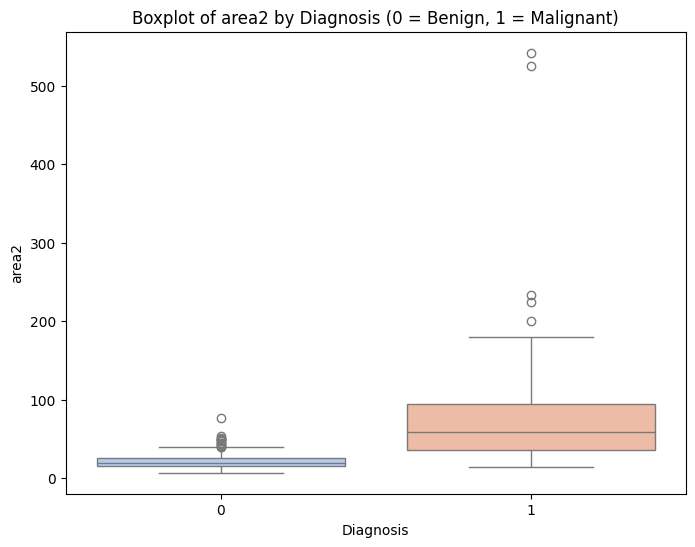

In [73]:
# Boxplot for area2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='area2', data=df, palette='coolwarm')
plt.title('Boxplot of area2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('area2')
plt.show()

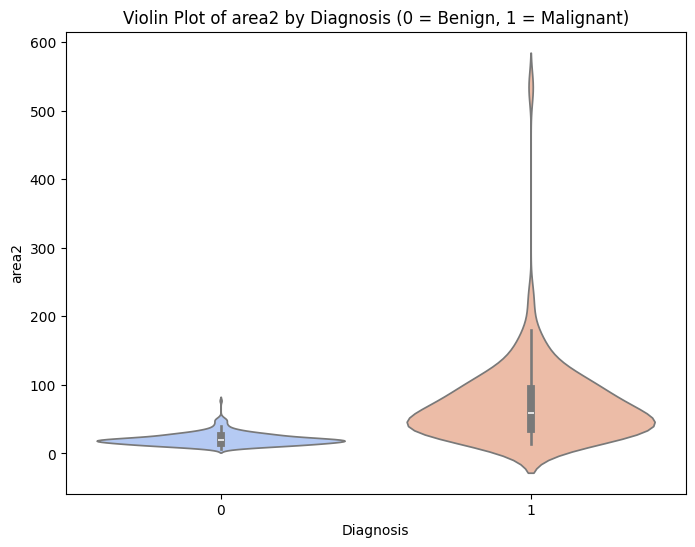

In [74]:
# Violin plot for area2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='area2', data=df, palette='coolwarm')
plt.title('Violin Plot of area2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('area2')
plt.show()

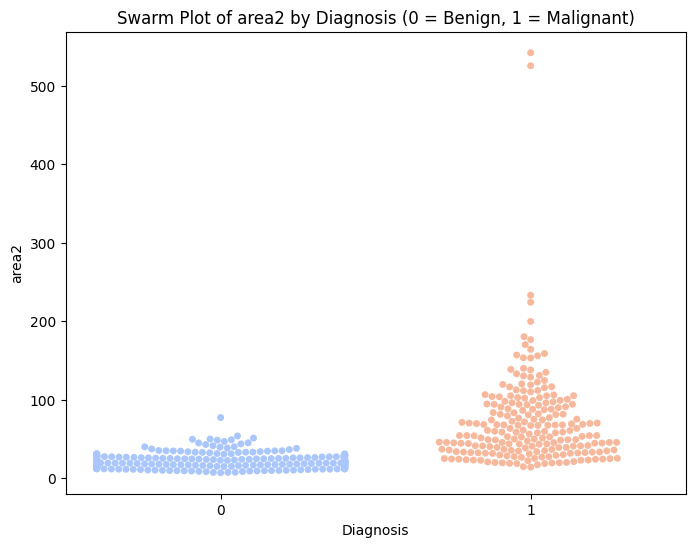

In [75]:
# Swarm plot for area2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='area2', data=df, palette='coolwarm')
plt.title('Swarm Plot of area2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('area2')
plt.show()

###area3

Text(0, 0.5, 'Frequency')

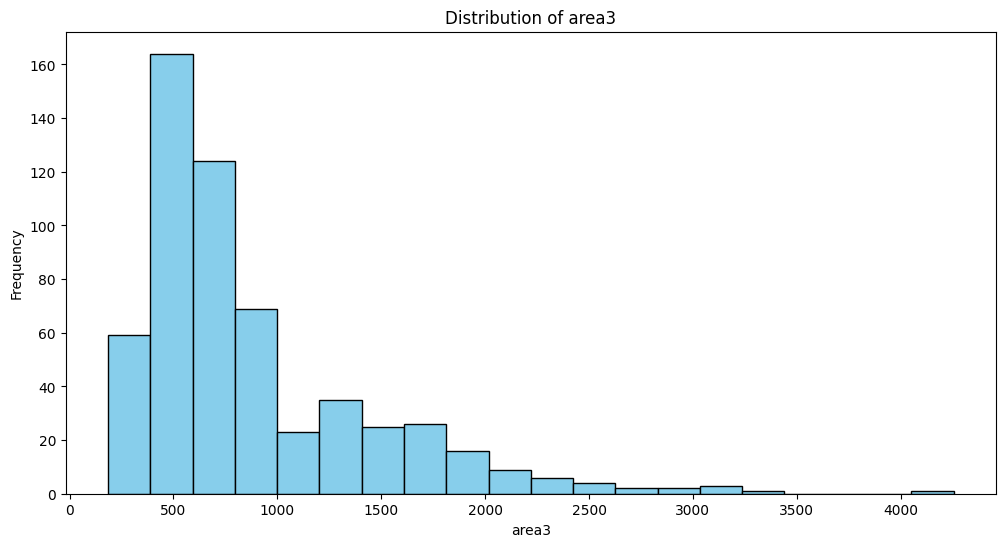

In [76]:
# Plot histograms for area3
plt.figure(figsize=(12, 6))

plt.hist(df['area3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of area3')
plt.xlabel('area3')
plt.ylabel('Frequency')

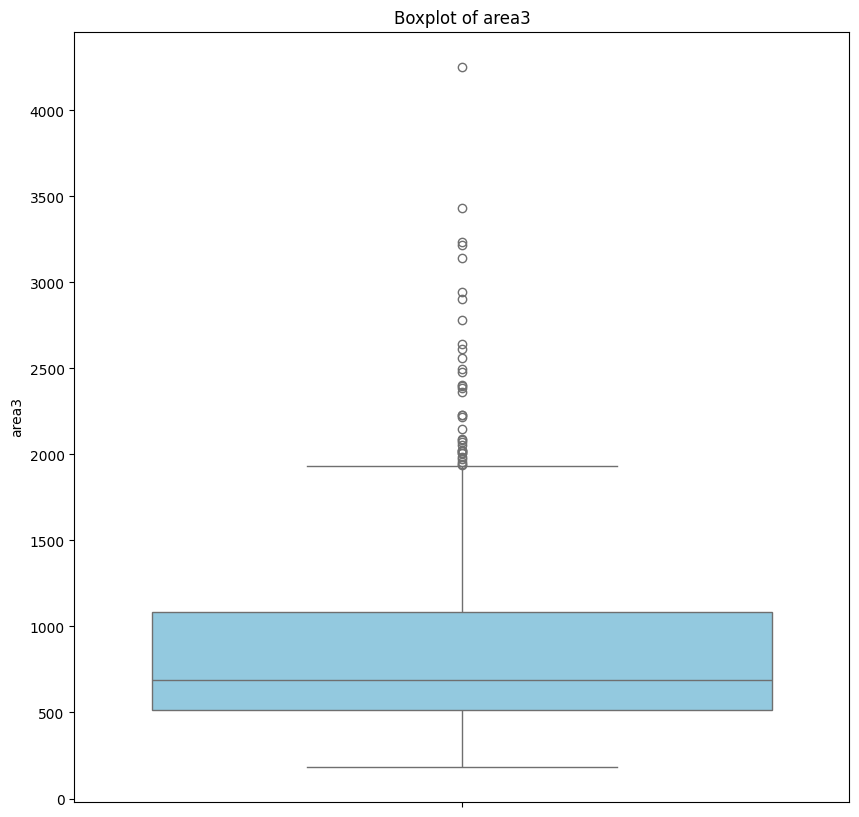

In [77]:
# Plot boxplot for area3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['area3'], color='skyblue')
plt.title('Boxplot of area3')
plt.ylabel('area3')
plt.show()

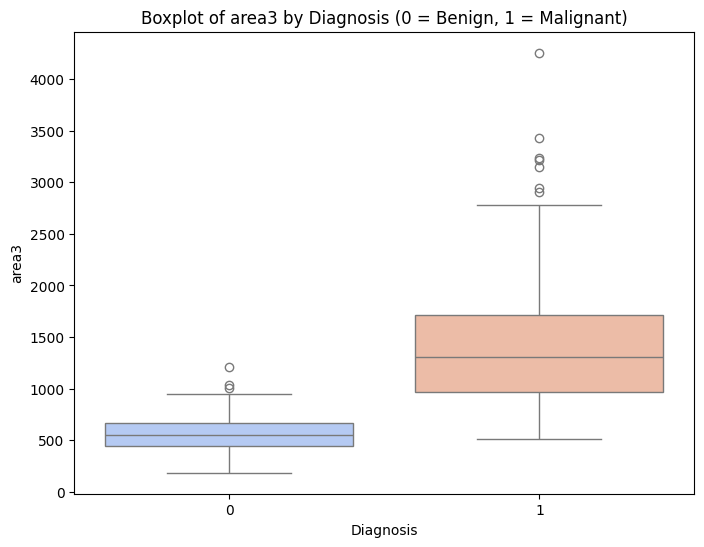

In [78]:
# Boxplot for area3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='area3', data=df, palette='coolwarm')
plt.title('Boxplot of area3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('area3')
plt.show()

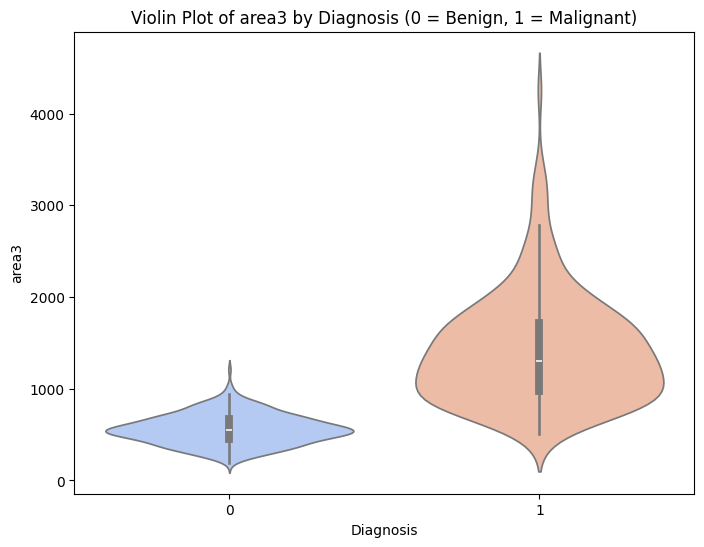

In [79]:
# Violin plot for area3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='area3', data=df, palette='coolwarm')
plt.title('Violin Plot of area3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('area3')
plt.show()

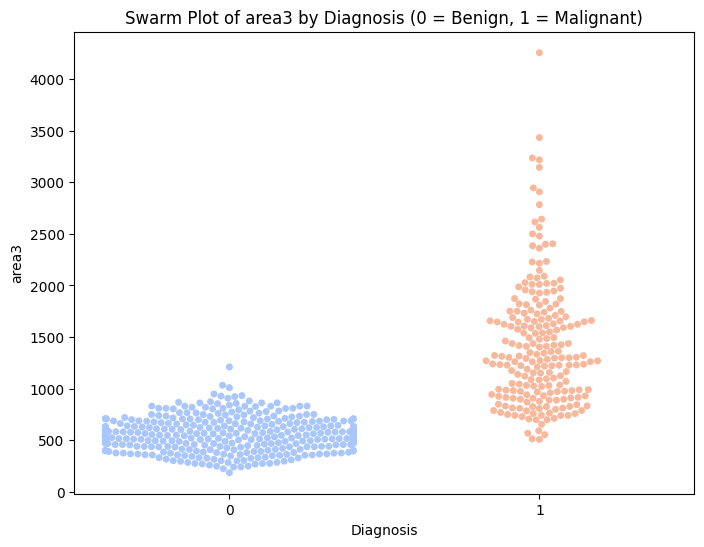

In [80]:
# Swarm plot for area3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='area3', data=df, palette='coolwarm')
plt.title('Swarm Plot of area3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('area3')
plt.show()

###smoothness1

Text(0, 0.5, 'Frequency')

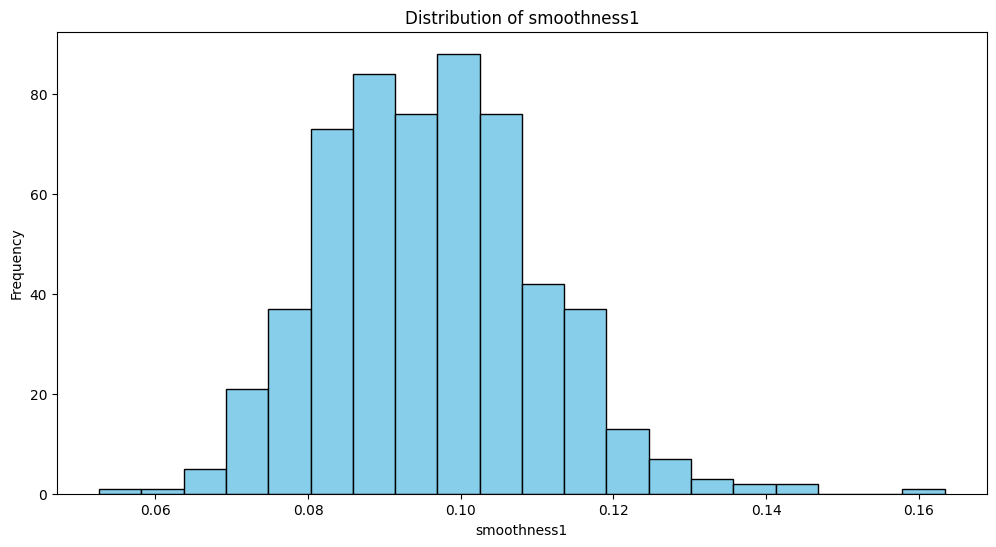

In [81]:
# Plot histograms for smoothness1
plt.figure(figsize=(12, 6))

plt.hist(df['smoothness1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of smoothness1')
plt.xlabel('smoothness1')
plt.ylabel('Frequency')

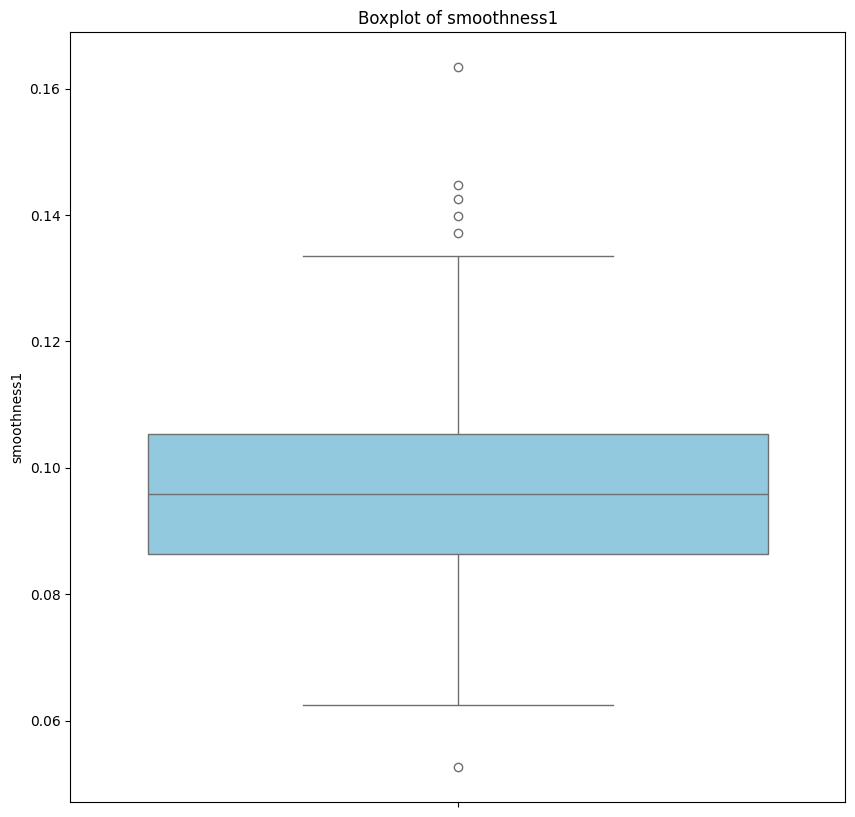

In [82]:
# Plot boxplot for smoothness1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['smoothness1'], color='skyblue')
plt.title('Boxplot of smoothness1')
plt.ylabel('smoothness1')
plt.show()

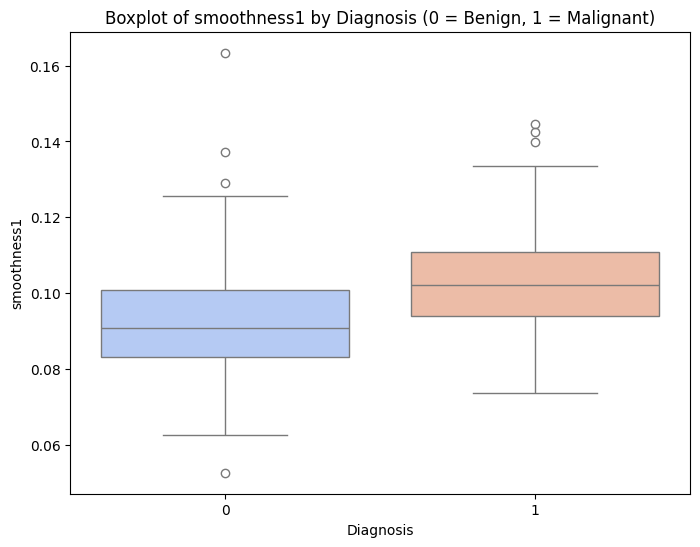

In [83]:
# Boxplot for smoothness1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='smoothness1', data=df, palette='coolwarm')
plt.title('Boxplot of smoothness1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('smoothness1')
plt.show()

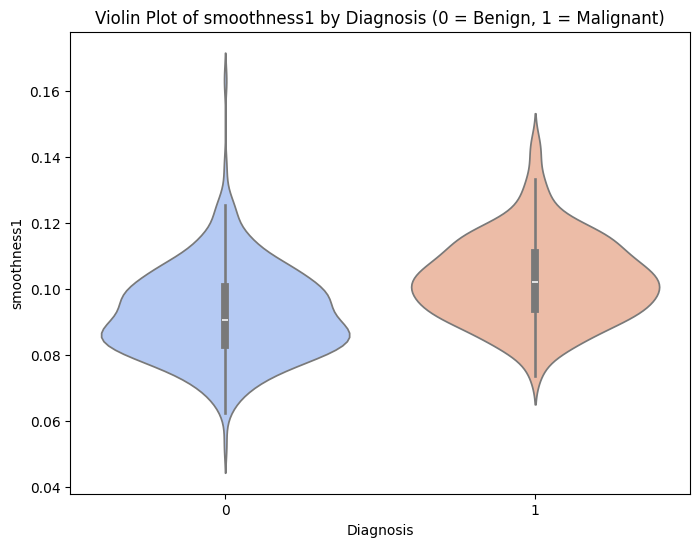

In [84]:
# Violin plot for smoothness1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='smoothness1', data=df, palette='coolwarm')
plt.title('Violin Plot of smoothness1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('smoothness1')
plt.show()

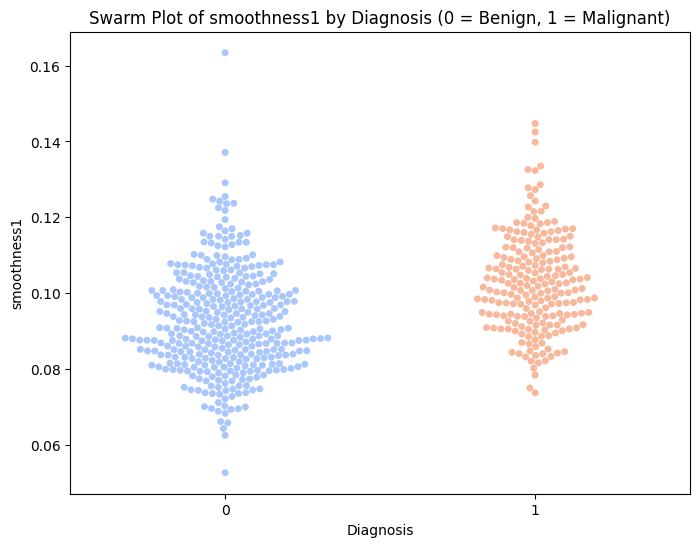

In [85]:
# Swarm plot for smoothness1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='smoothness1', data=df, palette='coolwarm')
plt.title('Swarm Plot of smoothness1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('smoothness1')
plt.show()

###smoothness2

Text(0, 0.5, 'Frequency')

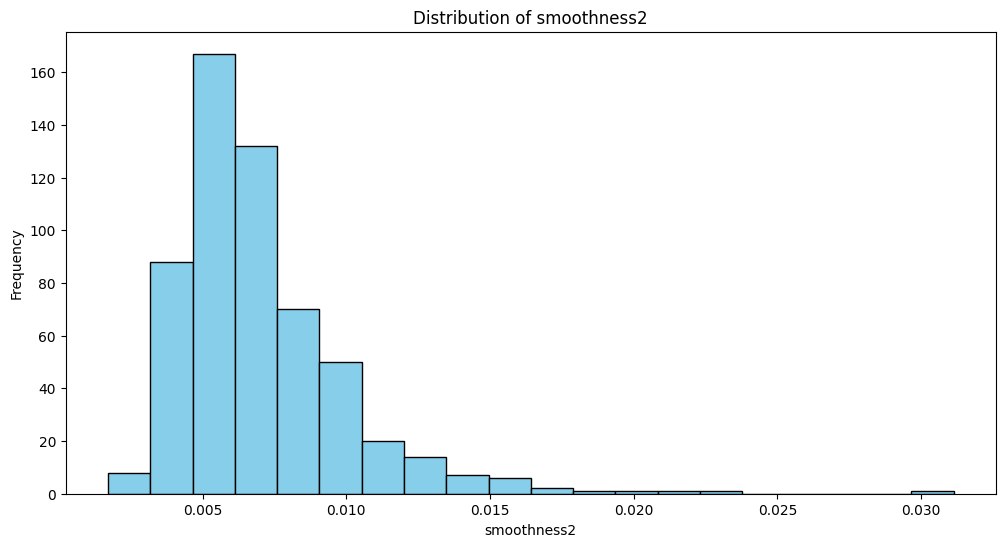

In [86]:
# Plot histograms for smoothness2
plt.figure(figsize=(12, 6))

plt.hist(df['smoothness2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of smoothness2')
plt.xlabel('smoothness2')
plt.ylabel('Frequency')

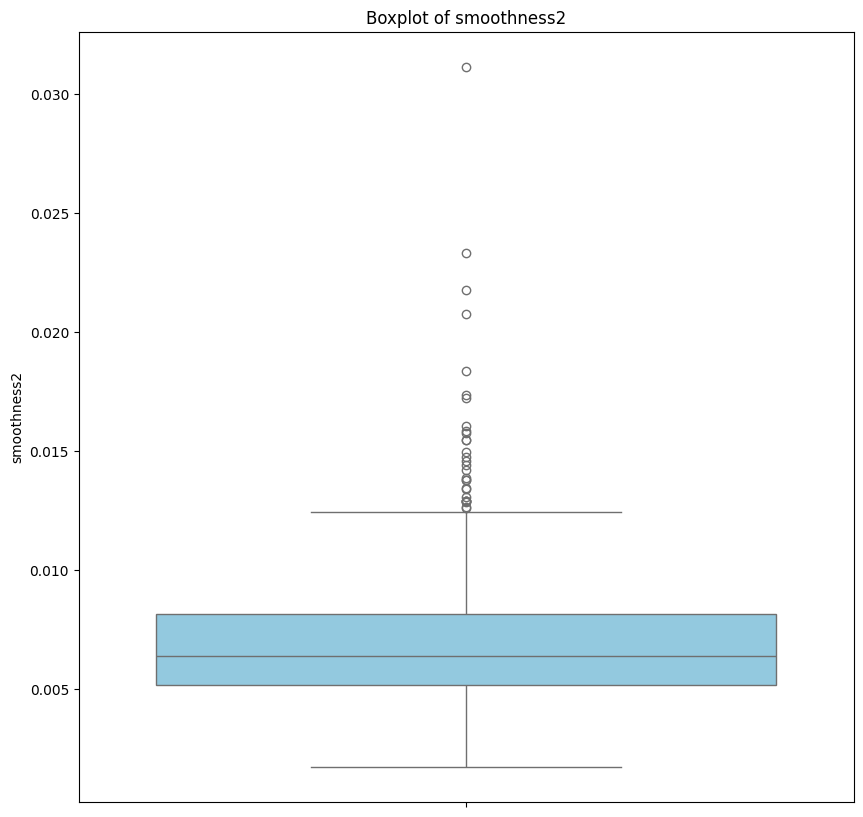

In [87]:
# Plot boxplot for smoothness2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['smoothness2'], color='skyblue')
plt.title('Boxplot of smoothness2')
plt.ylabel('smoothness2')
plt.show()

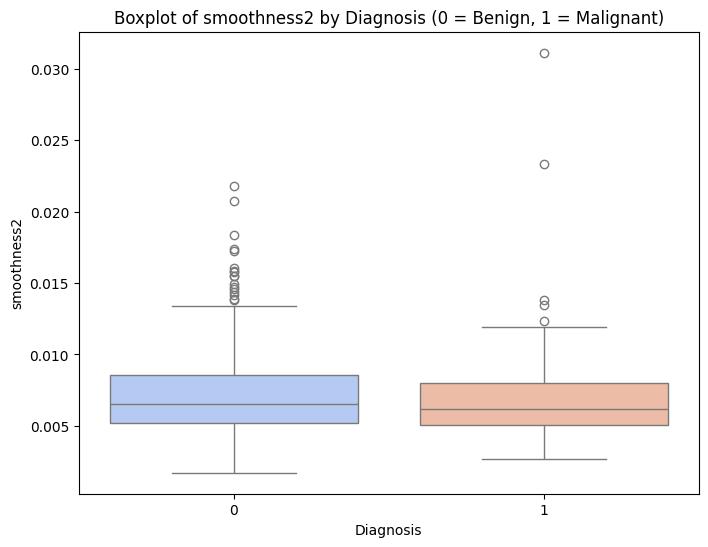

In [88]:
# Boxplot for smoothness2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='smoothness2', data=df, palette='coolwarm')
plt.title('Boxplot of smoothness2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('smoothness2')
plt.show()

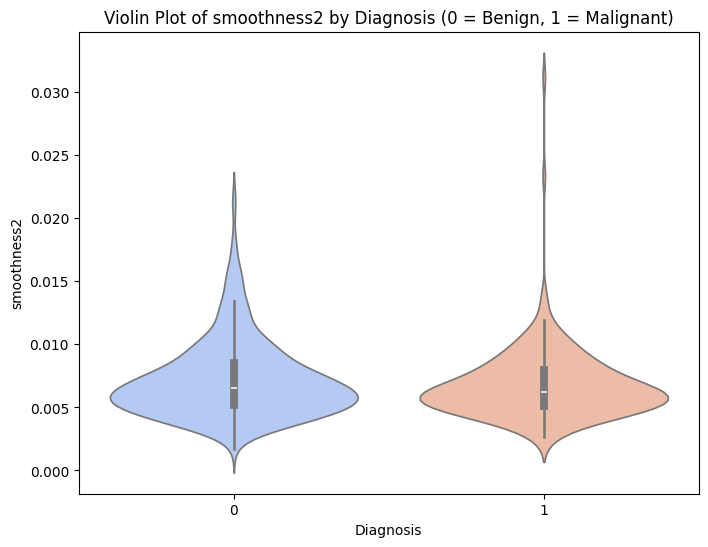

In [89]:
# Violin plot for smoothness2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='smoothness2', data=df, palette='coolwarm')
plt.title('Violin Plot of smoothness2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('smoothness2')
plt.show()

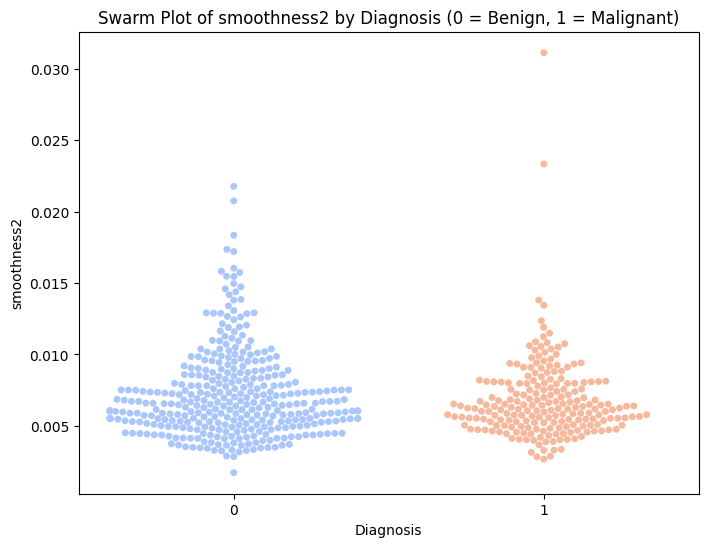

In [90]:
# Swarm plot for smoothness2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='smoothness2', data=df, palette='coolwarm')
plt.title('Swarm Plot of smoothness2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('smoothness2')
plt.show()

###smoothness3

Text(0, 0.5, 'Frequency')

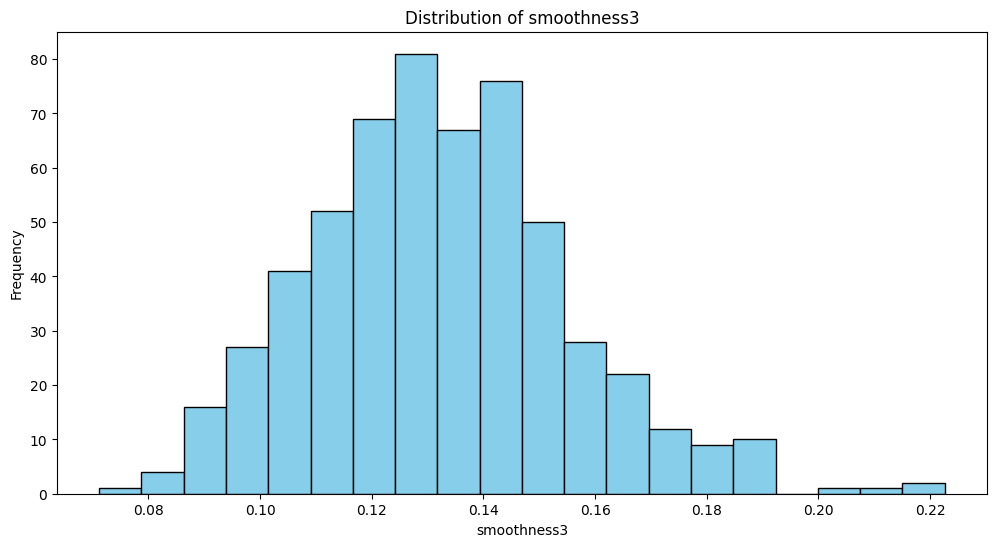

In [91]:
# Plot histograms for smoothness3
plt.figure(figsize=(12, 6))

plt.hist(df['smoothness3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of smoothness3')
plt.xlabel('smoothness3')
plt.ylabel('Frequency')

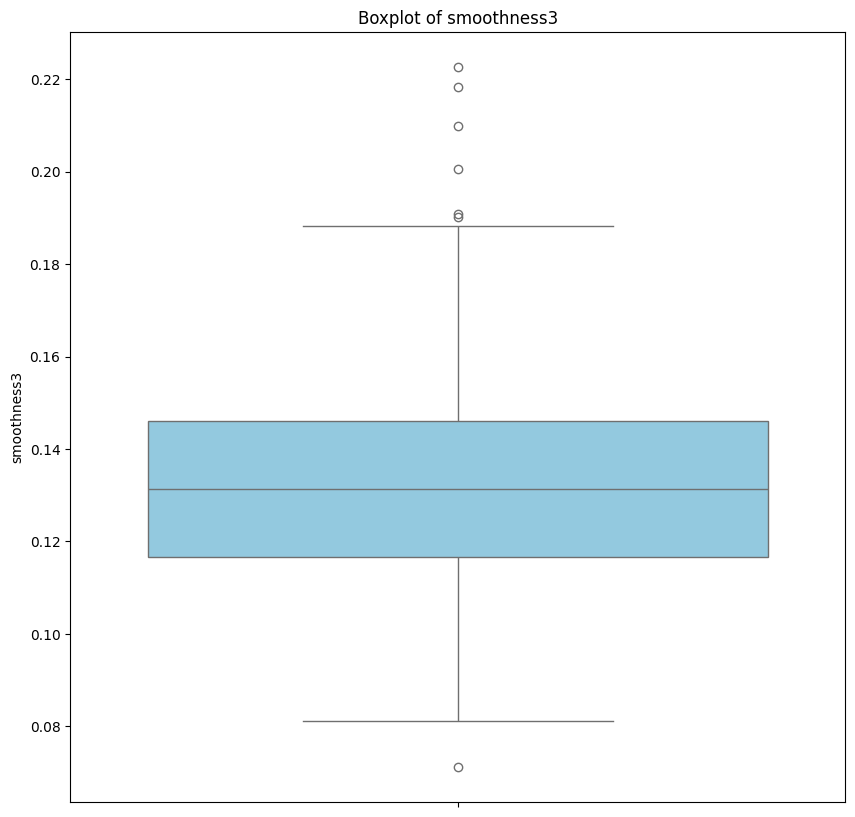

In [92]:
# Plot boxplot for smoothness3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['smoothness3'], color='skyblue')
plt.title('Boxplot of smoothness3')
plt.ylabel('smoothness3')
plt.show()

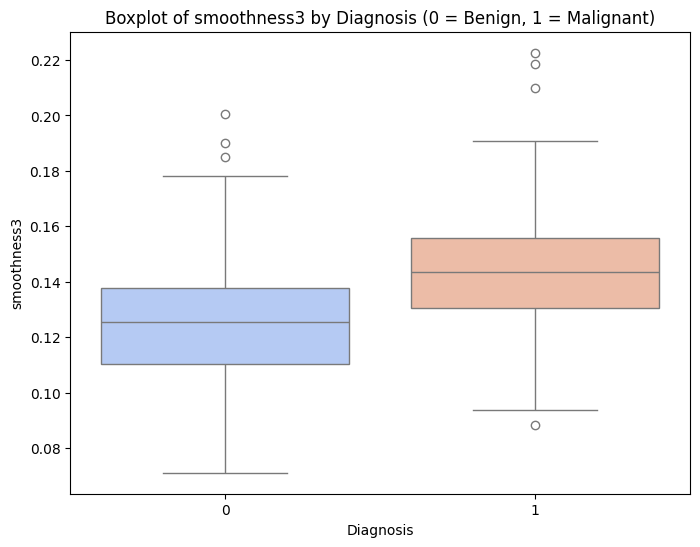

In [93]:
# Boxplot for smoothness3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='smoothness3', data=df, palette='coolwarm')
plt.title('Boxplot of smoothness3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('smoothness3')
plt.show()

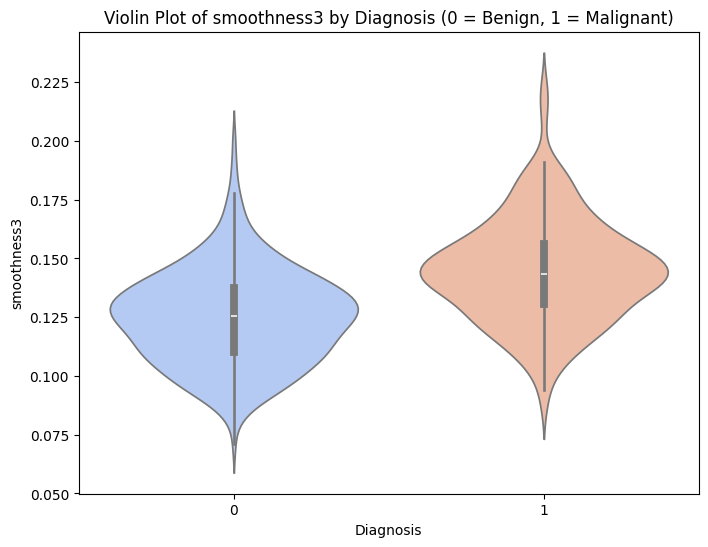

In [94]:
# Violin plot for smoothness3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='smoothness3', data=df, palette='coolwarm')
plt.title('Violin Plot of smoothness3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('smoothness3')
plt.show()

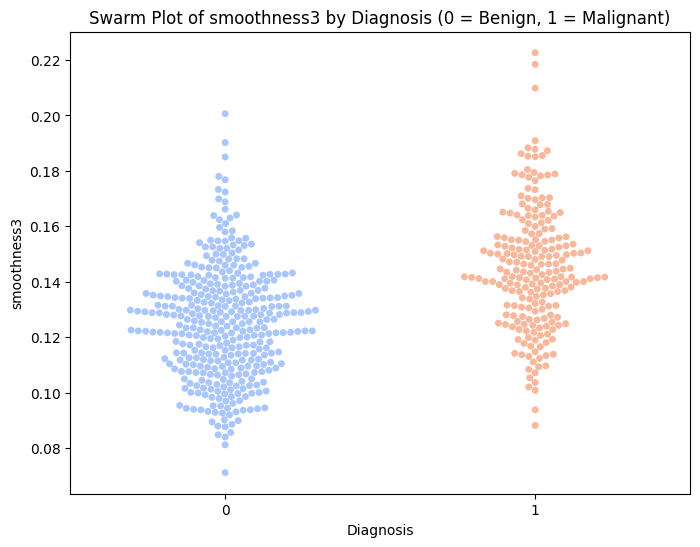

In [95]:
# Swarm plot for smoothness3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='smoothness3', data=df, palette='coolwarm')
plt.title('Swarm Plot of smoothness3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('smoothness3')
plt.show()

###compactness1

Text(0, 0.5, 'Frequency')

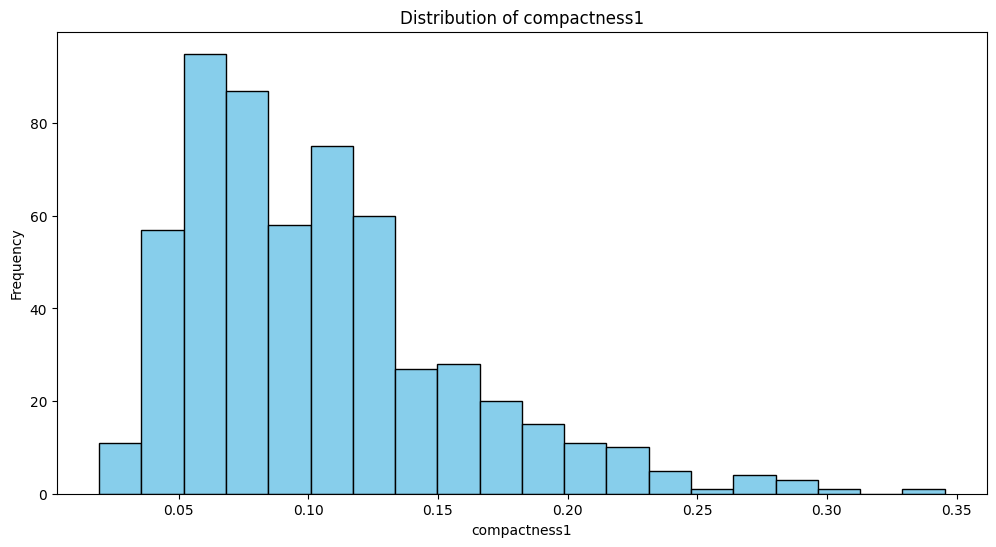

In [96]:
# Plot histograms for compactness1
plt.figure(figsize=(12, 6))

plt.hist(df['compactness1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of compactness1')
plt.xlabel('compactness1')
plt.ylabel('Frequency')

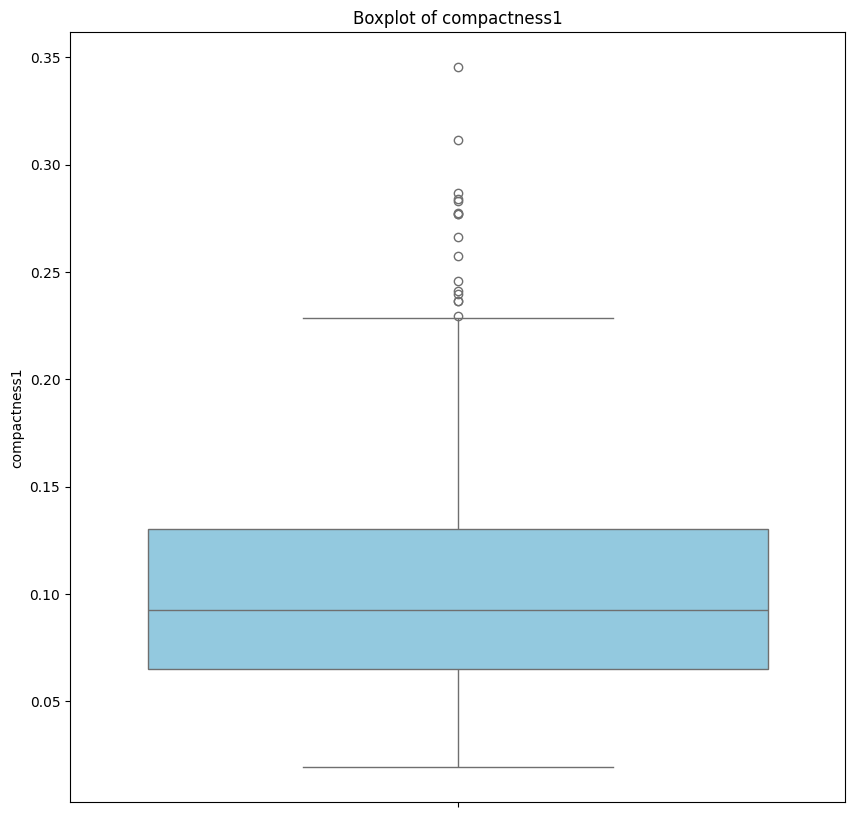

In [97]:
# Plot boxplot for compactness1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['compactness1'], color='skyblue')
plt.title('Boxplot of compactness1')
plt.ylabel('compactness1')
plt.show()

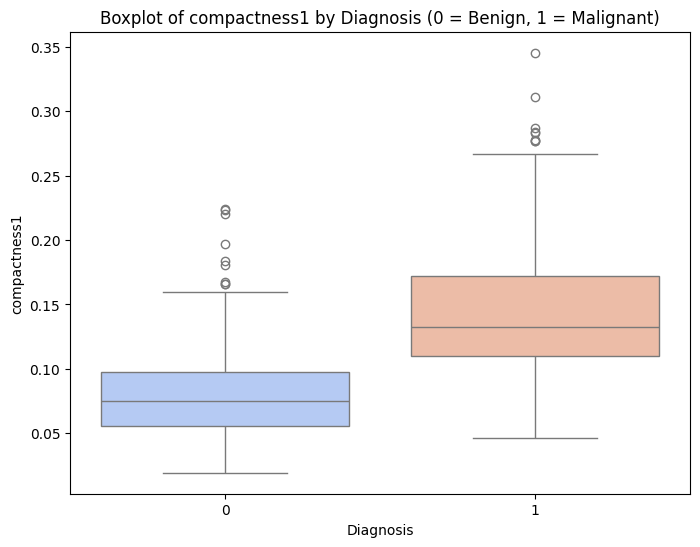

In [98]:
# Boxplot for compactness1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='compactness1', data=df, palette='coolwarm')
plt.title('Boxplot of compactness1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('compactness1')
plt.show()

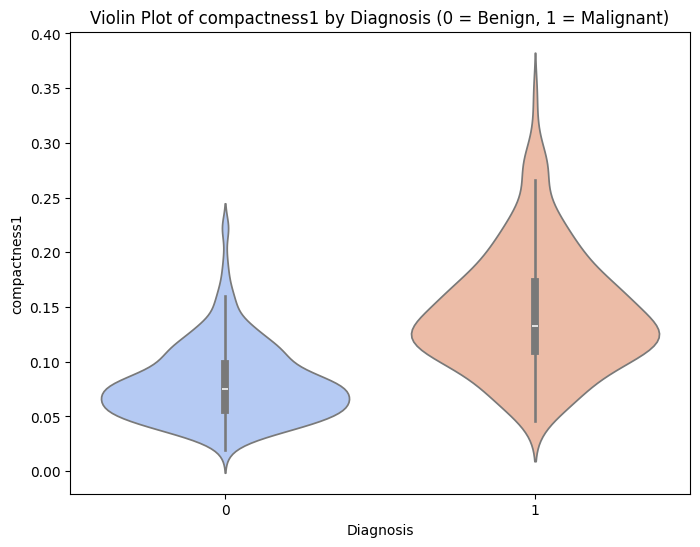

In [99]:
# Violin plot for compactness1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='compactness1', data=df, palette='coolwarm')
plt.title('Violin Plot of compactness1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('compactness1')
plt.show()

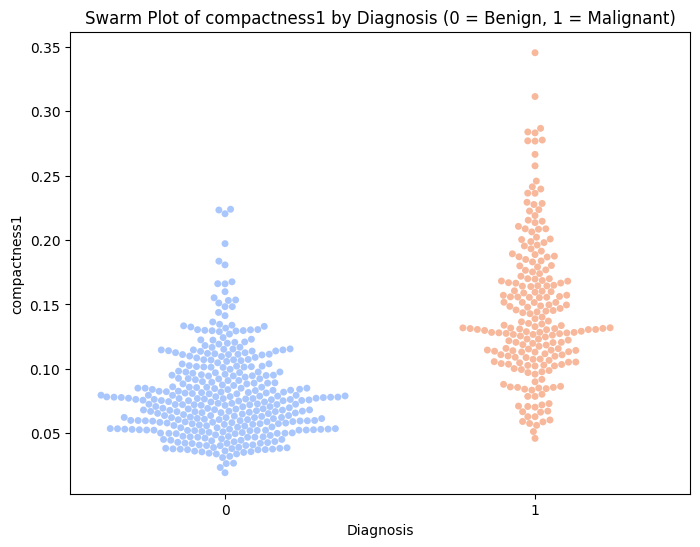

In [100]:
# Swarm plot for compactness1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='compactness1', data=df, palette='coolwarm')
plt.title('Swarm Plot of compactness1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('compactness1')
plt.show()

###compactness2

Text(0, 0.5, 'Frequency')

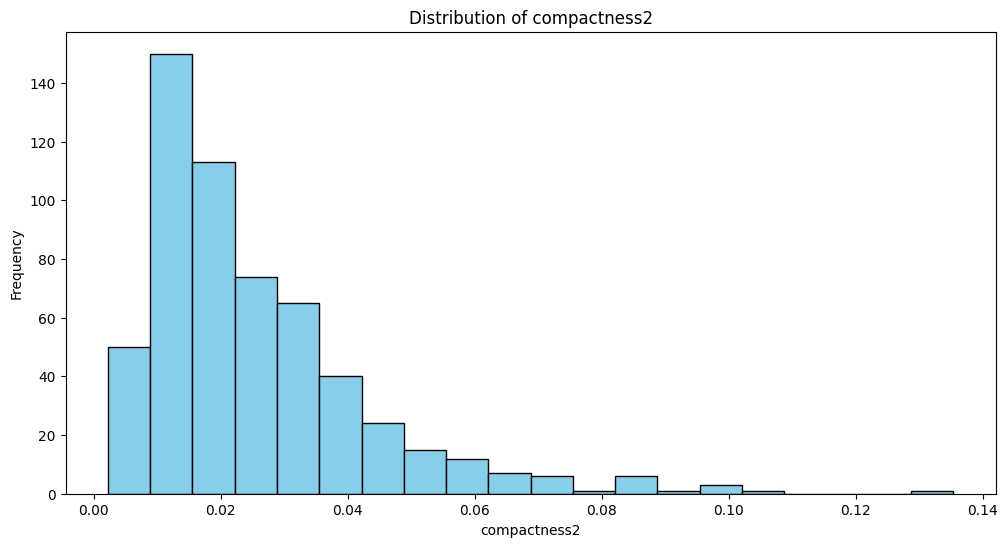

In [101]:
# Plot histograms for compactness2
plt.figure(figsize=(12, 6))

plt.hist(df['compactness2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of compactness2')
plt.xlabel('compactness2')
plt.ylabel('Frequency')

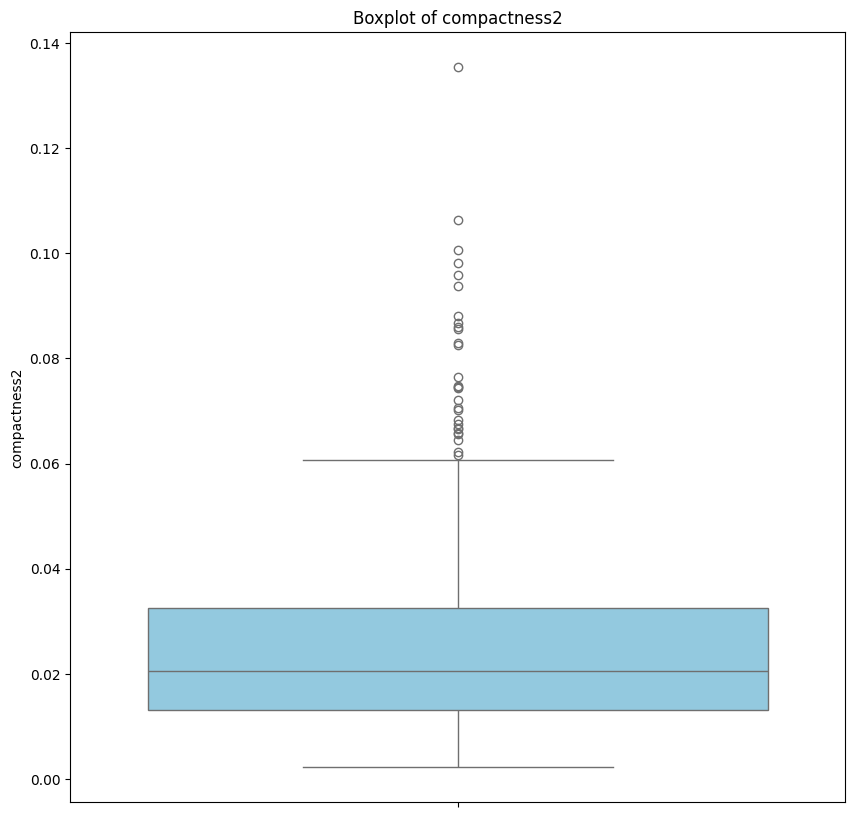

In [102]:
# Plot boxplot for compactness2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['compactness2'], color='skyblue')
plt.title('Boxplot of compactness2')
plt.ylabel('compactness2')
plt.show()

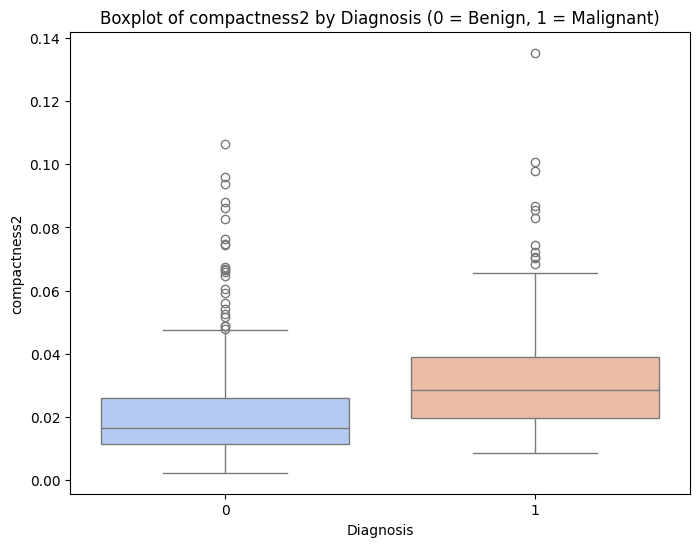

In [103]:
# Boxplot for compactness2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='compactness2', data=df, palette='coolwarm')
plt.title('Boxplot of compactness2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('compactness2')
plt.show()

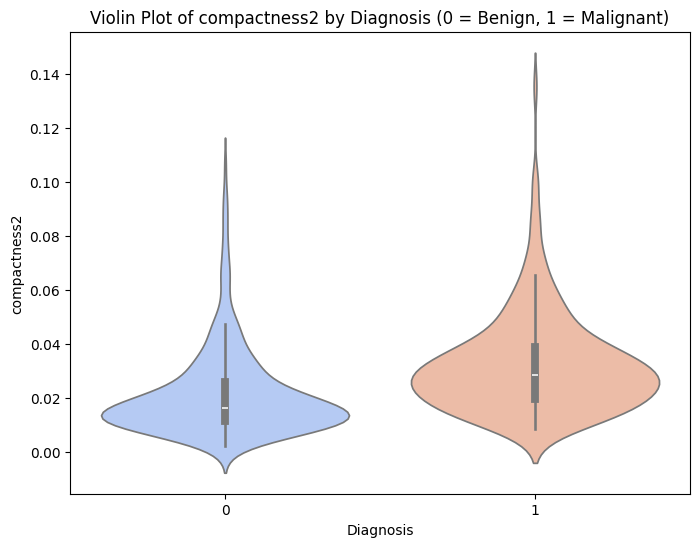

In [104]:
# Violin plot for compactness2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='compactness2', data=df, palette='coolwarm')
plt.title('Violin Plot of compactness2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('compactness2')
plt.show()

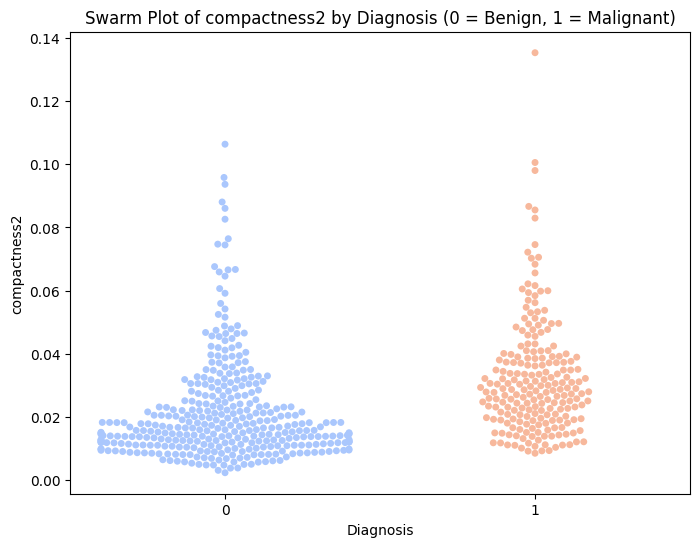

In [105]:
# Swarm plot for compactness2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='compactness2', data=df, palette='coolwarm')
plt.title('Swarm Plot of compactness2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('compactness2')
plt.show()

###compactness3

Text(0, 0.5, 'Frequency')

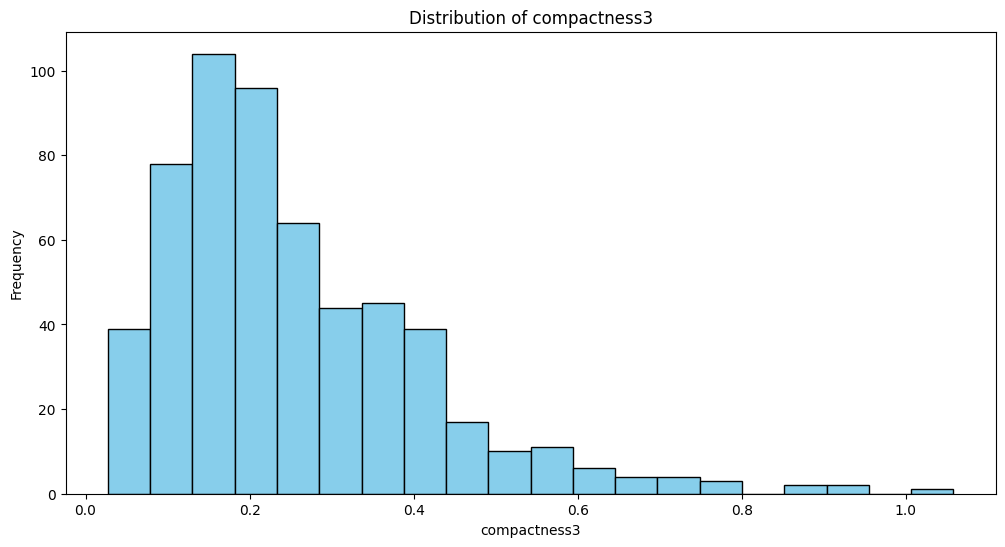

In [106]:
# Plot histograms for compactness3
plt.figure(figsize=(12, 6))

plt.hist(df['compactness3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of compactness3')
plt.xlabel('compactness3')
plt.ylabel('Frequency')

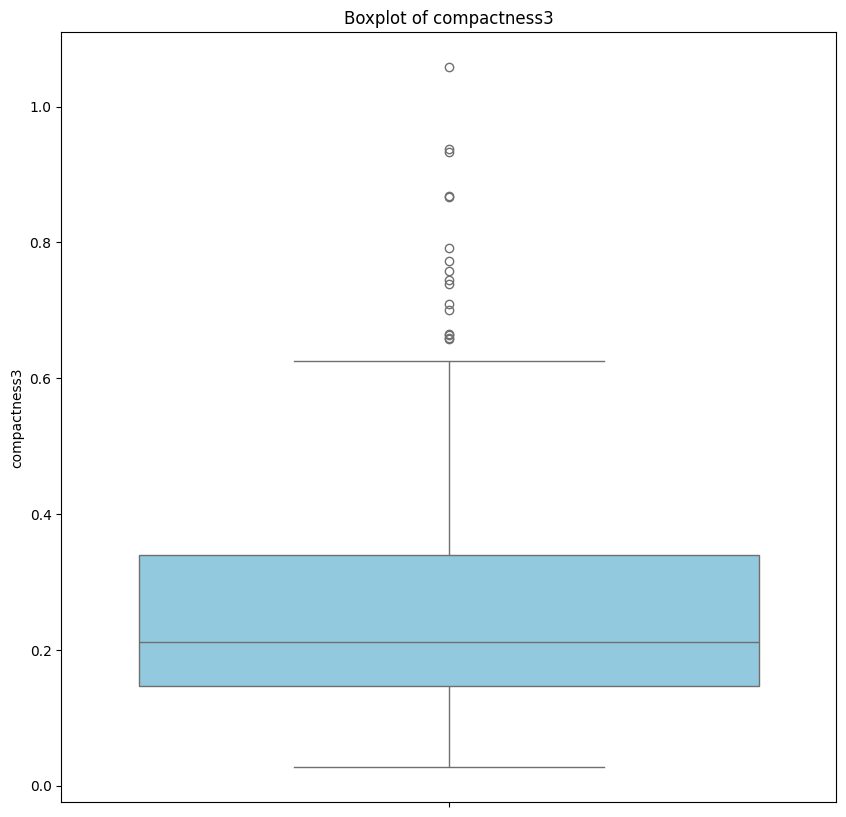

In [107]:
# Plot boxplot for compactness3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['compactness3'], color='skyblue')
plt.title('Boxplot of compactness3')
plt.ylabel('compactness3')
plt.show()

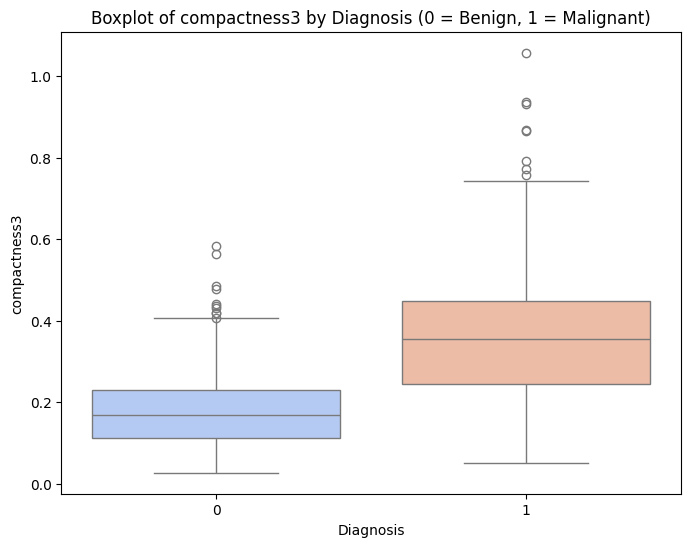

In [108]:
# Boxplot for compactness3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='compactness3', data=df, palette='coolwarm')
plt.title('Boxplot of compactness3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('compactness3')
plt.show()

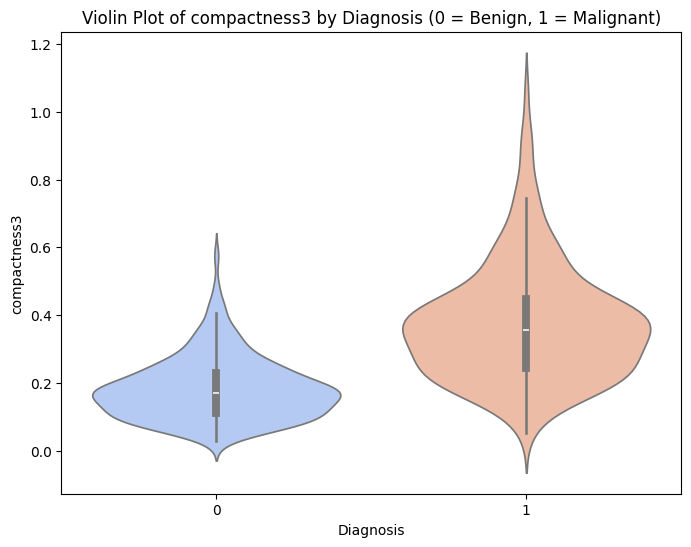

In [109]:
# Violin plot for compactness3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='compactness3', data=df, palette='coolwarm')
plt.title('Violin Plot of compactness3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('compactness3')
plt.show()

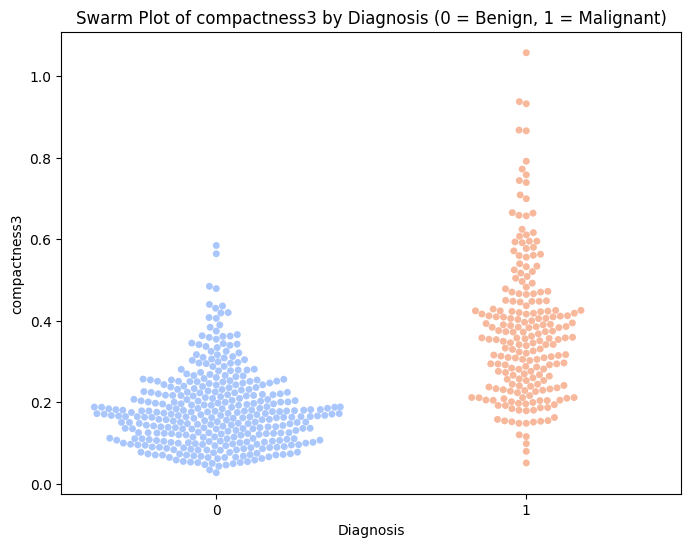

In [110]:
# Swarm plot for compactness3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='compactness3', data=df, palette='coolwarm')
plt.title('Swarm Plot of compactness3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('compactness3')
plt.show()

###concavity1

Text(0, 0.5, 'Frequency')

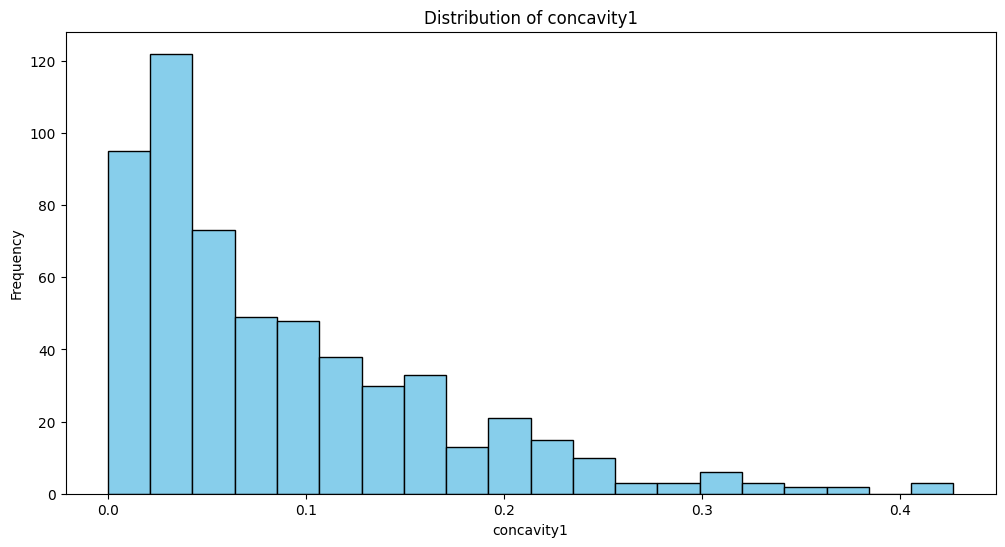

In [111]:
# Plot histograms for concavity1
plt.figure(figsize=(12, 6))

plt.hist(df['concavity1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of concavity1')
plt.xlabel('concavity1')
plt.ylabel('Frequency')

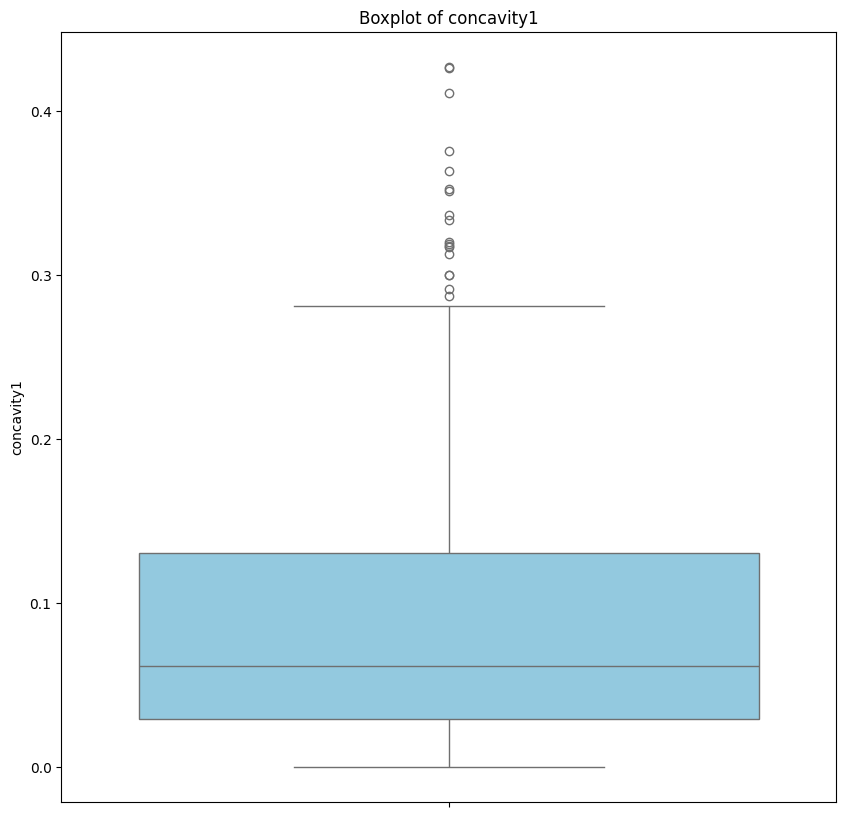

In [112]:
# Plot boxplot for concavity1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['concavity1'], color='skyblue')
plt.title('Boxplot of concavity1')
plt.ylabel('concavity1')
plt.show()

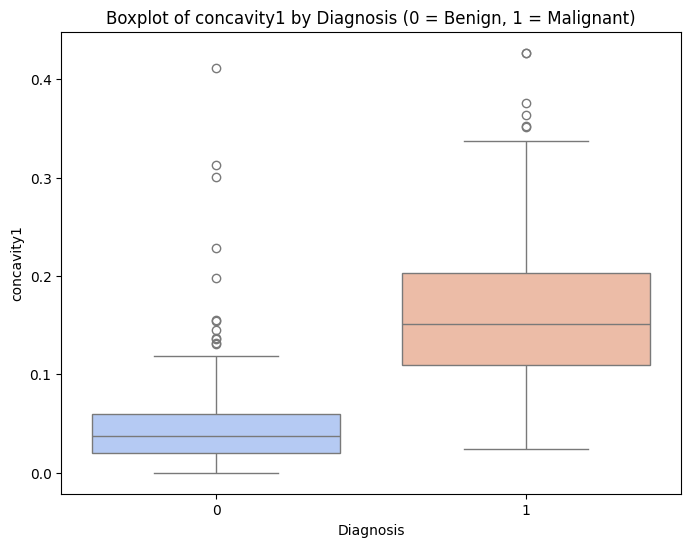

In [113]:
# Boxplot for concavity1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='concavity1', data=df, palette='coolwarm')
plt.title('Boxplot of concavity1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concavity1')
plt.show()

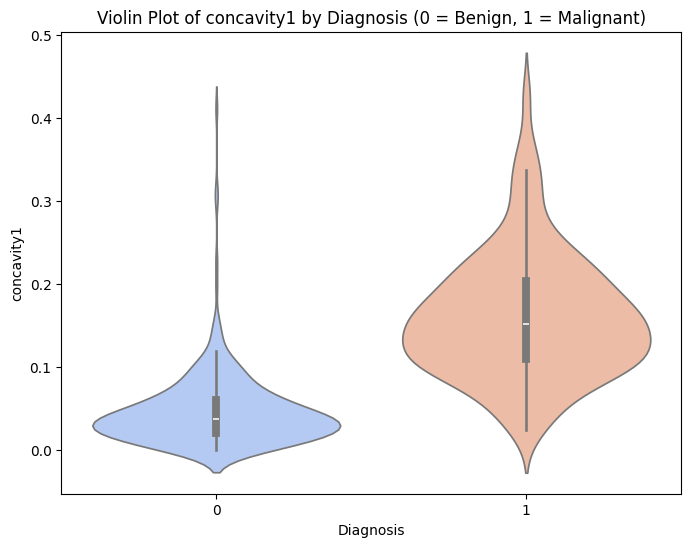

In [114]:
# Violin plot for concavity1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='concavity1', data=df, palette='coolwarm')
plt.title('Violin Plot of concavity1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concavity1')
plt.show()

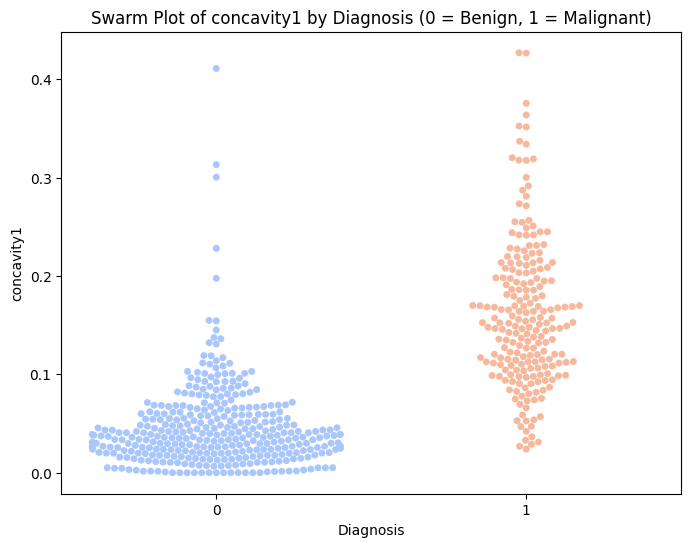

In [115]:
# Swarm plot for concavity1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='concavity1', data=df, palette='coolwarm')
plt.title('Swarm Plot of concavity1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concavity1')
plt.show()

###concavity2

Text(0, 0.5, 'Frequency')

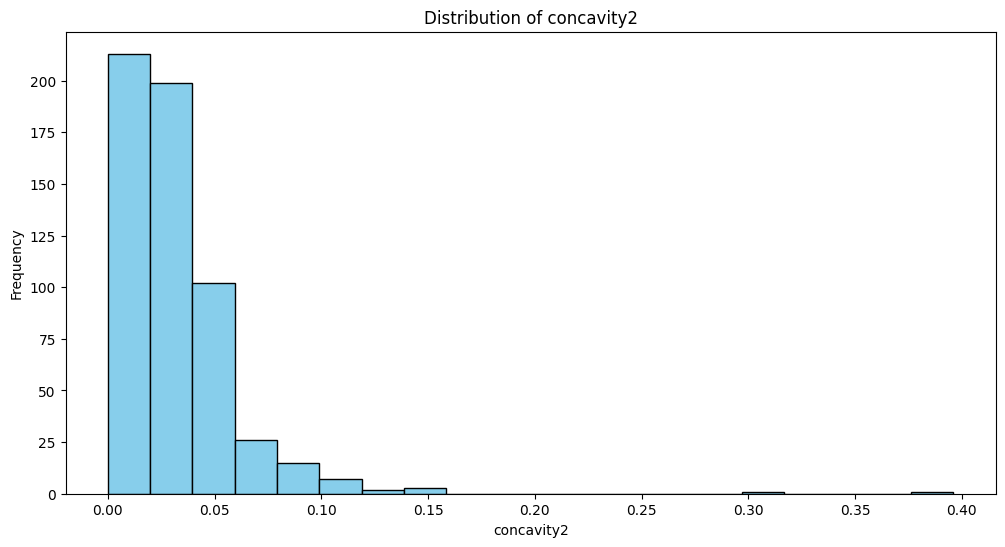

In [116]:
# Plot histograms for concavity2
plt.figure(figsize=(12, 6))

plt.hist(df['concavity2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of concavity2')
plt.xlabel('concavity2')
plt.ylabel('Frequency')

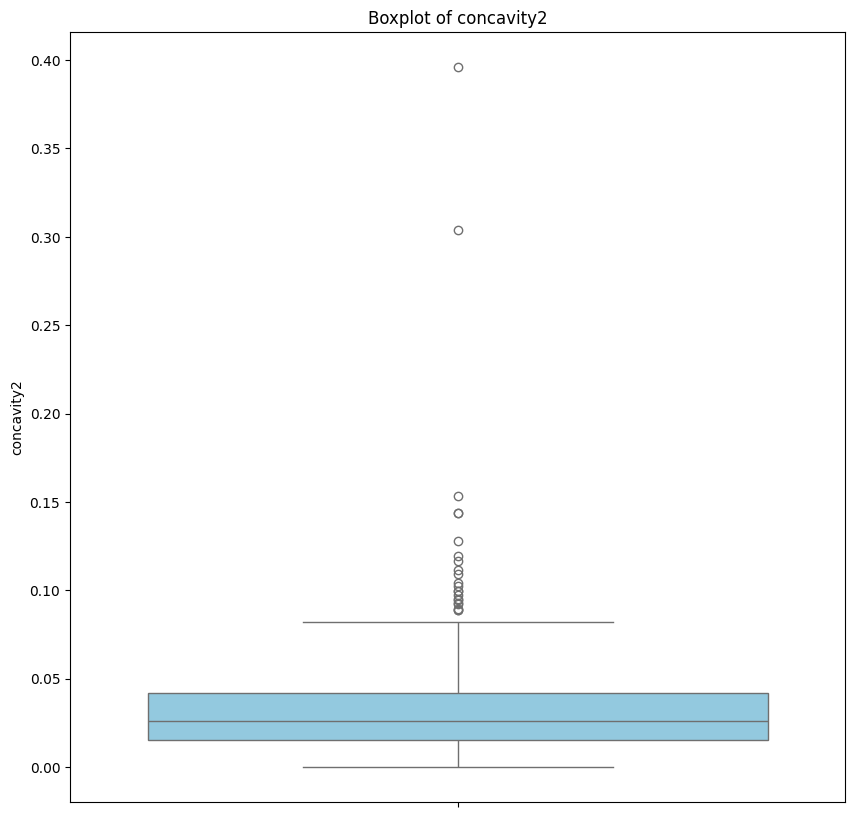

In [117]:
# Plot boxplot for concavity2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['concavity2'], color='skyblue')
plt.title('Boxplot of concavity2')
plt.ylabel('concavity2')
plt.show()

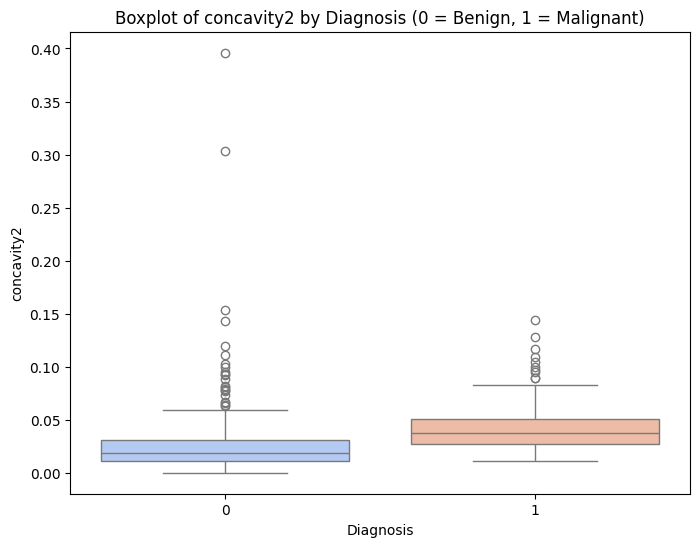

In [118]:
# Boxplot for concavity2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='concavity2', data=df, palette='coolwarm')
plt.title('Boxplot of concavity2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concavity2')
plt.show()

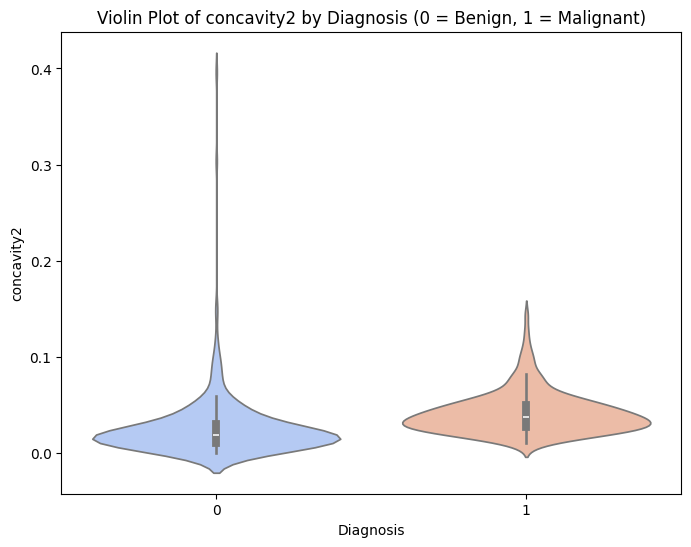

In [119]:
# Violin plot for concavity2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='concavity2', data=df, palette='coolwarm')
plt.title('Violin Plot of concavity2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concavity2')
plt.show()

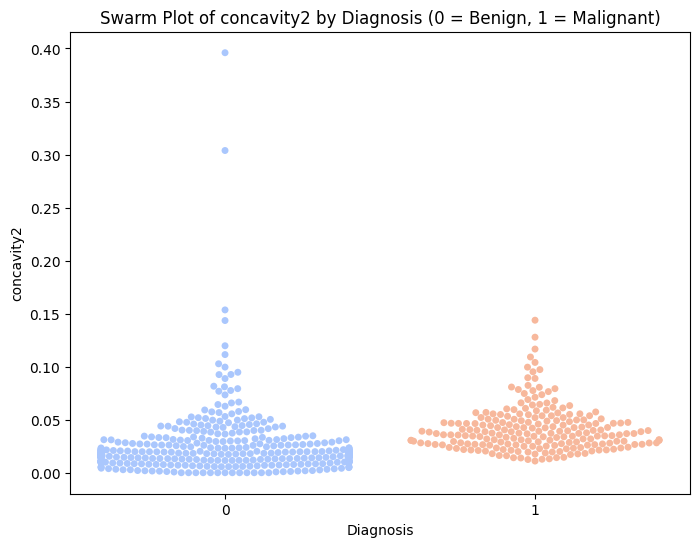

In [120]:
# Swarm plot for concavity2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='concavity2', data=df, palette='coolwarm')
plt.title('Swarm Plot of concavity2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concavity2')
plt.show()

###concavity3

Text(0, 0.5, 'Frequency')

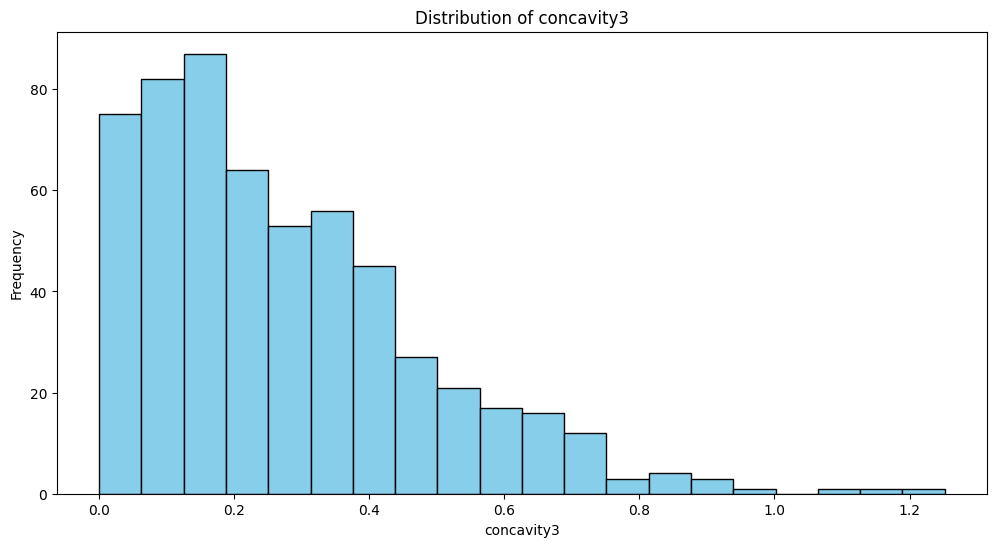

In [121]:
# Plot histograms for concavity3
plt.figure(figsize=(12, 6))

plt.hist(df['concavity3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of concavity3')
plt.xlabel('concavity3')
plt.ylabel('Frequency')

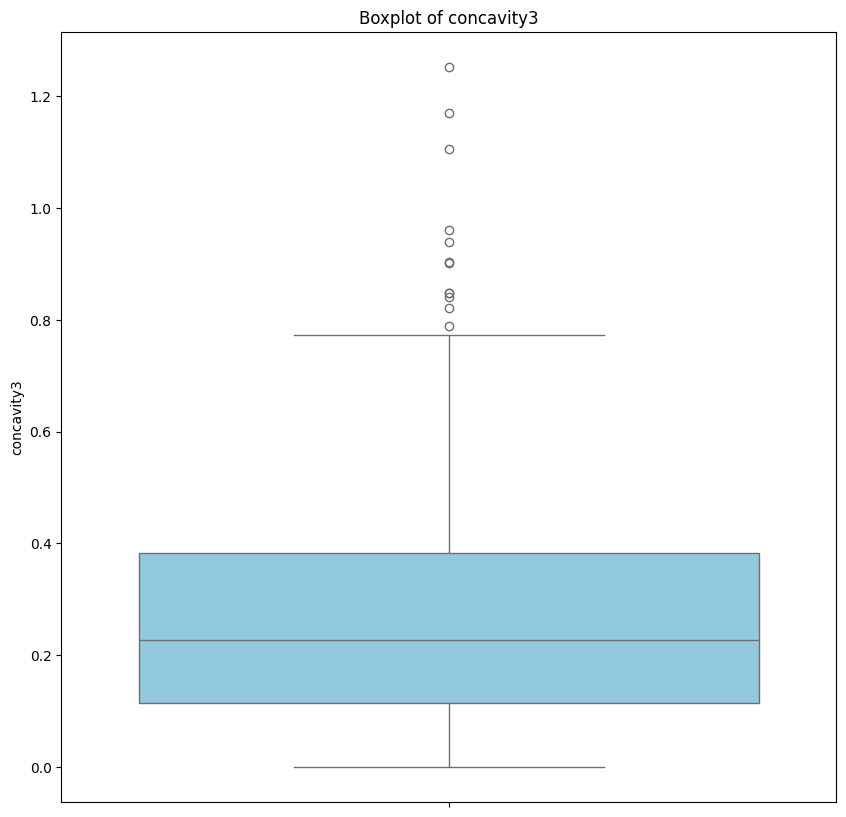

In [122]:
# Plot boxplot for concavity3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['concavity3'], color='skyblue')
plt.title('Boxplot of concavity3')
plt.ylabel('concavity3')
plt.show()

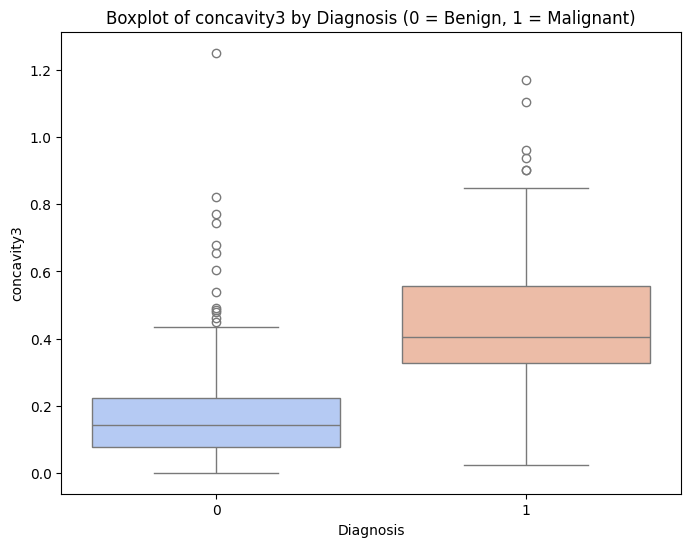

In [123]:
# Boxplot for concavity3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='concavity3', data=df, palette='coolwarm')
plt.title('Boxplot of concavity3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concavity3')
plt.show()

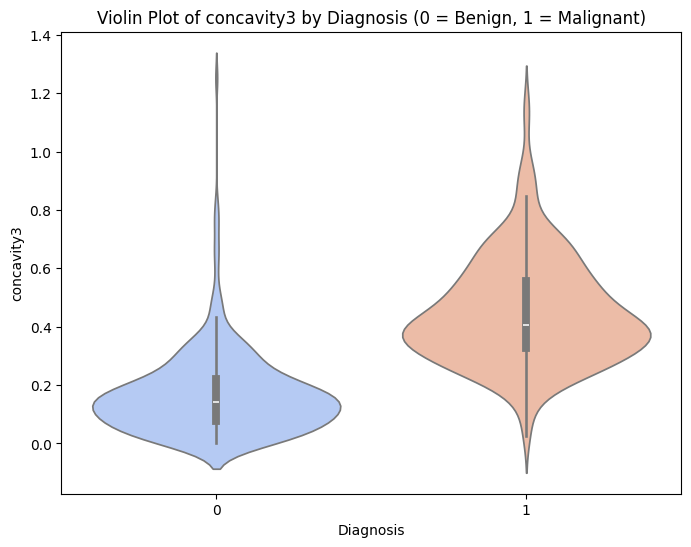

In [124]:
# Violin plot for concavity3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='concavity3', data=df, palette='coolwarm')
plt.title('Violin Plot of concavity3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concavity3')
plt.show()

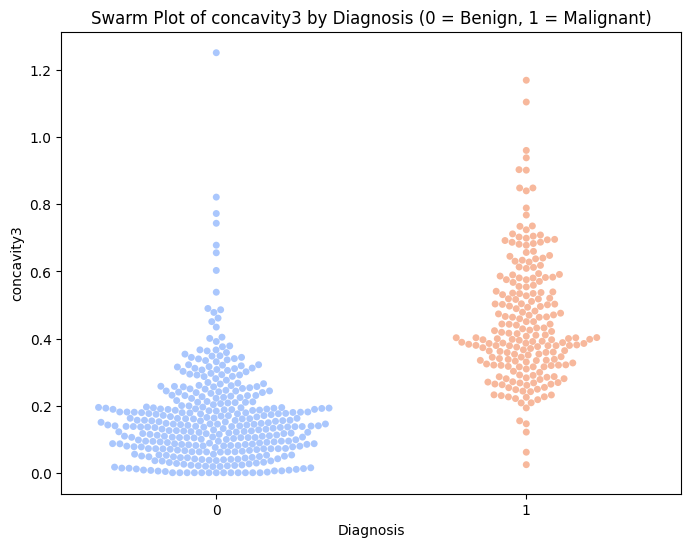

In [125]:
# Swarm plot for concavity3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='concavity3', data=df, palette='coolwarm')
plt.title('Swarm Plot of concavity3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concavity3')
plt.show()

###concave_points1

Text(0, 0.5, 'Frequency')

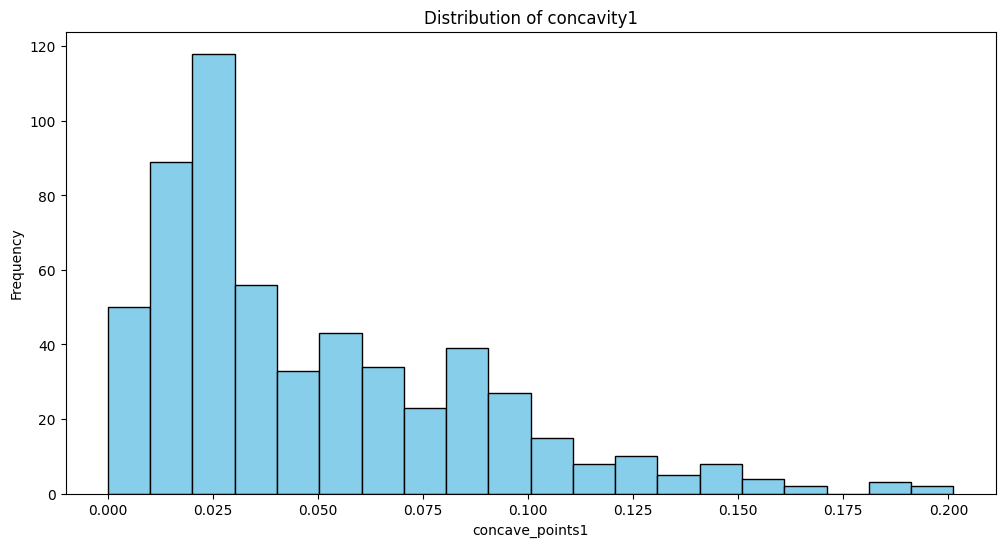

In [126]:
# Plot histograms for concavity1
plt.figure(figsize=(12, 6))

plt.hist(df['concave_points1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of concavity1')
plt.xlabel('concave_points1')
plt.ylabel('Frequency')

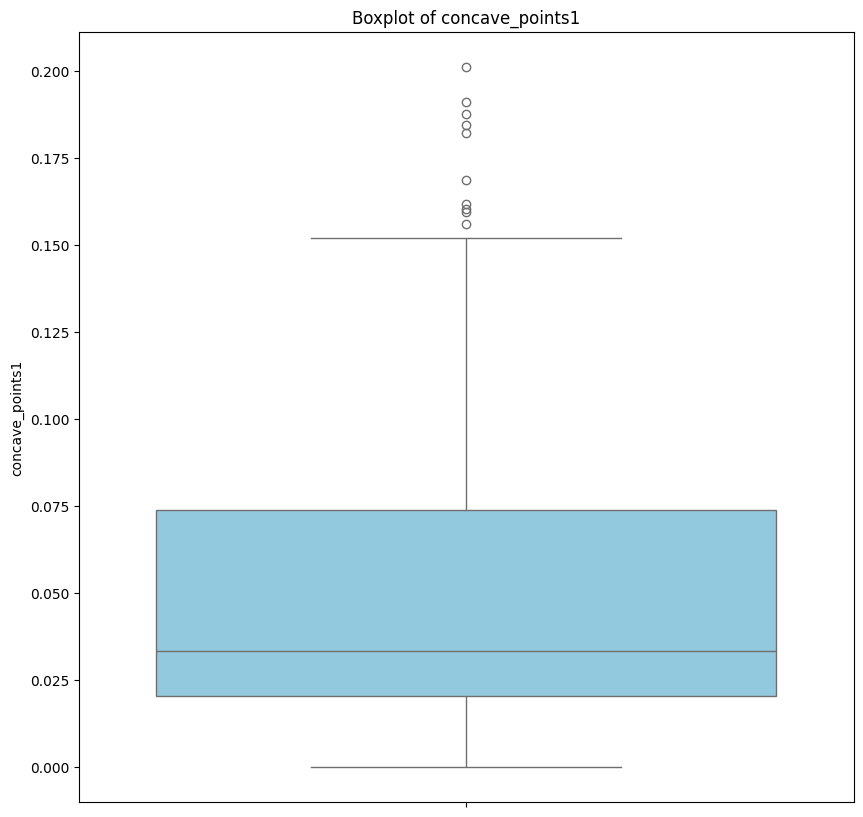

In [127]:
# Plot boxplot for concave_points1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['concave_points1'], color='skyblue')
plt.title('Boxplot of concave_points1')
plt.ylabel('concave_points1')
plt.show()

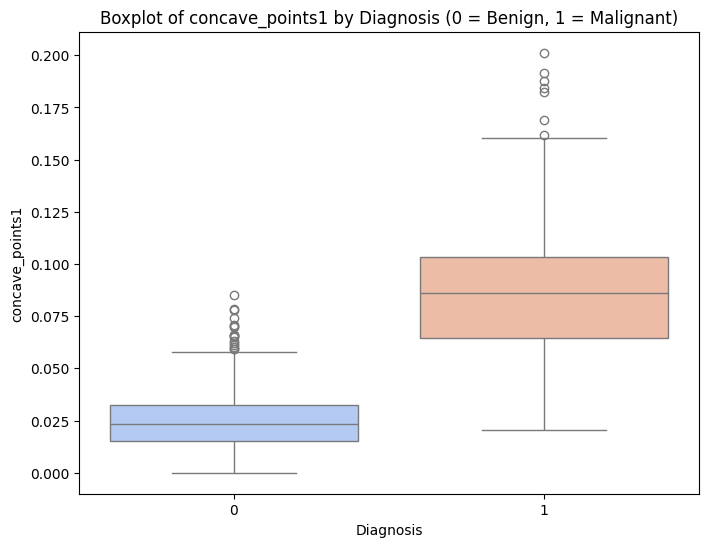

In [128]:
# Boxplot for concave_points1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='concave_points1', data=df, palette='coolwarm')
plt.title('Boxplot of concave_points1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concave_points1')
plt.show()

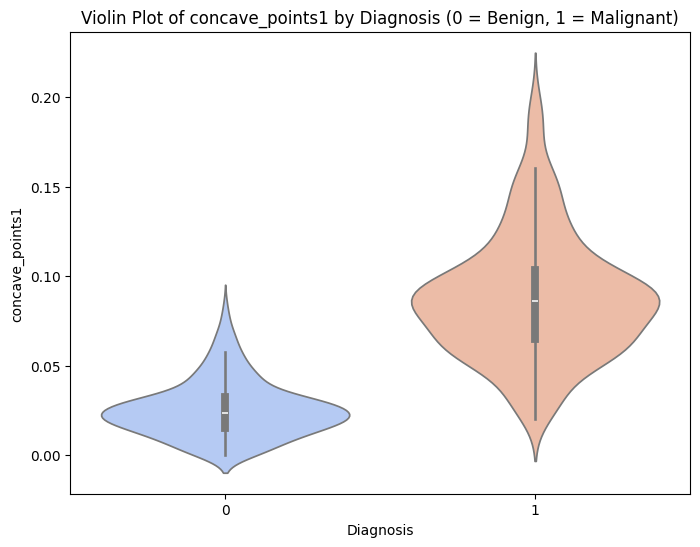

In [129]:
# Violin plot for concave_points1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='concave_points1', data=df, palette='coolwarm')
plt.title('Violin Plot of concave_points1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concave_points1')
plt.show()

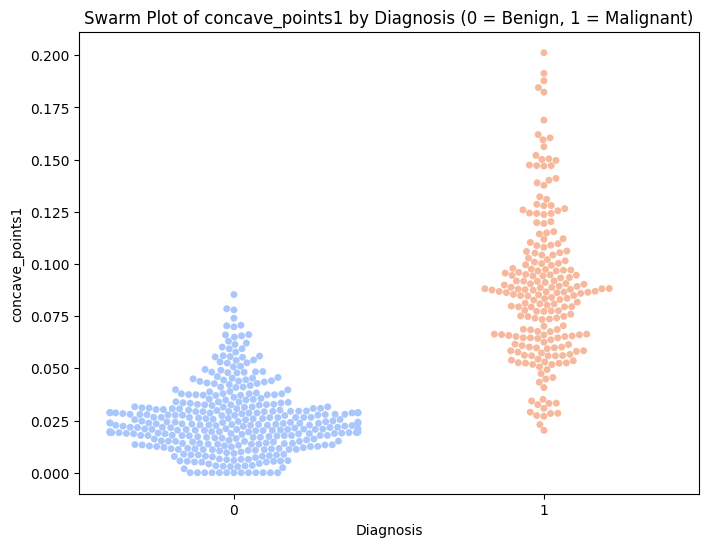

In [130]:
# Swarm plot for concave_points1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='concave_points1', data=df, palette='coolwarm')
plt.title('Swarm Plot of concave_points1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concave_points1')
plt.show()

###concave_points2

Text(0, 0.5, 'Frequency')

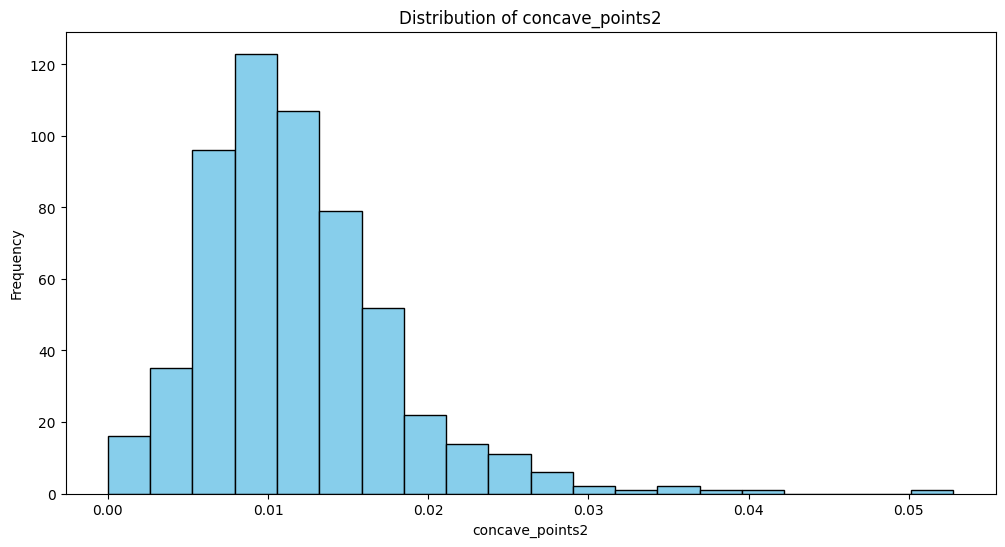

In [131]:
# Plot histograms for concave_points2
plt.figure(figsize=(12, 6))

plt.hist(df['concave_points2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of concave_points2')
plt.xlabel('concave_points2')
plt.ylabel('Frequency')

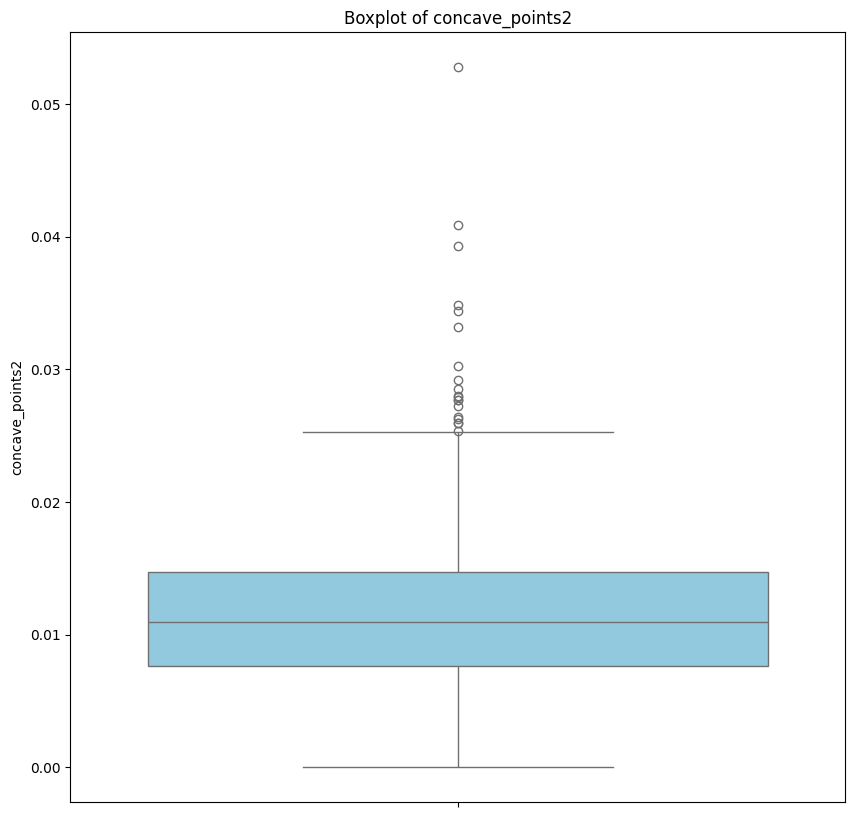

In [132]:
# Plot boxplot for concave_points2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['concave_points2'], color='skyblue')
plt.title('Boxplot of concave_points2')
plt.ylabel('concave_points2')
plt.show()

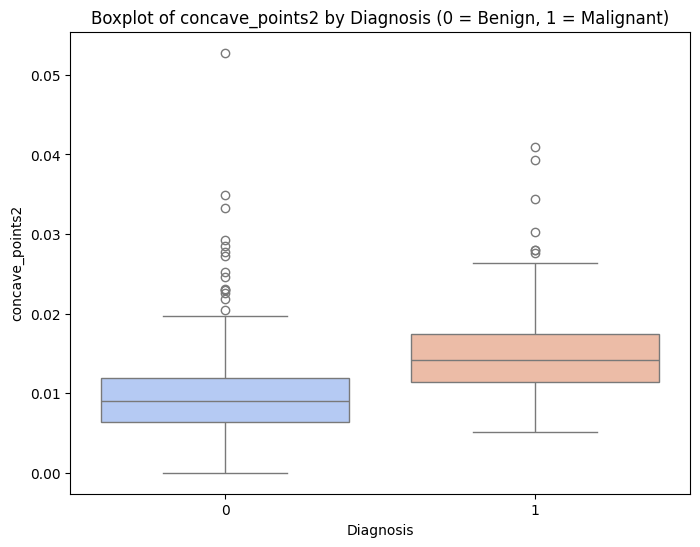

In [133]:
# Boxplot for concave_points2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='concave_points2', data=df, palette='coolwarm')
plt.title('Boxplot of concave_points2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concave_points2')
plt.show()

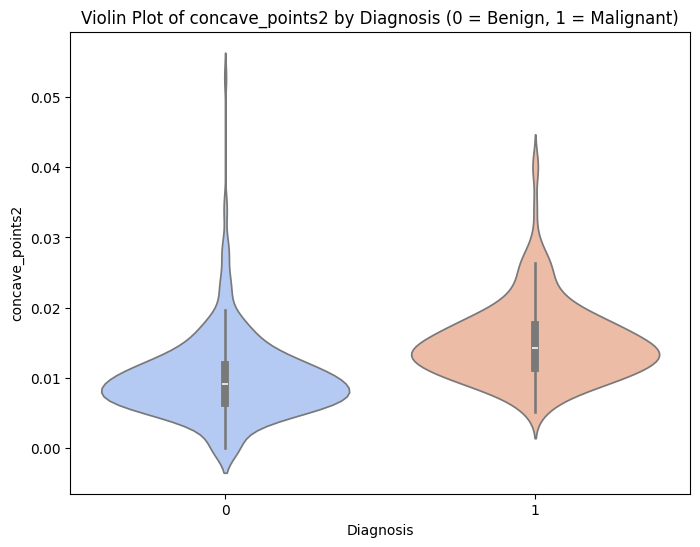

In [134]:
# Violin plot for concave_points2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='concave_points2', data=df, palette='coolwarm')
plt.title('Violin Plot of concave_points2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concave_points2')
plt.show()

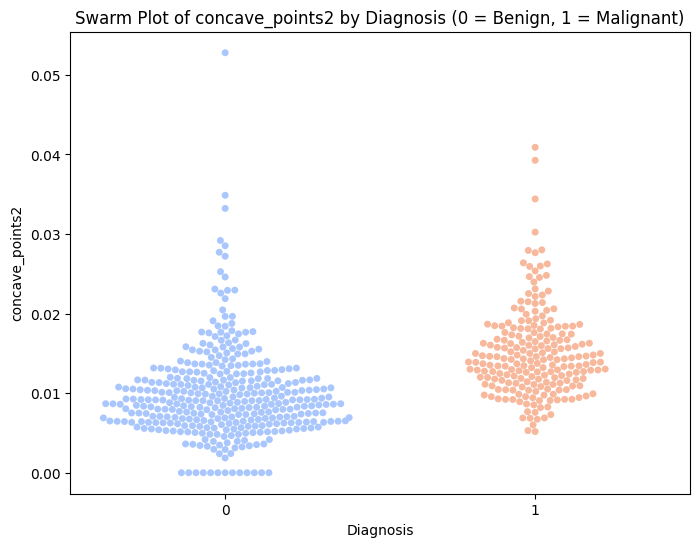

In [135]:
# Swarm plot for concave_points2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='concave_points2', data=df, palette='coolwarm')
plt.title('Swarm Plot of concave_points2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concave_points2')
plt.show()

###concave_points3

Text(0, 0.5, 'Frequency')

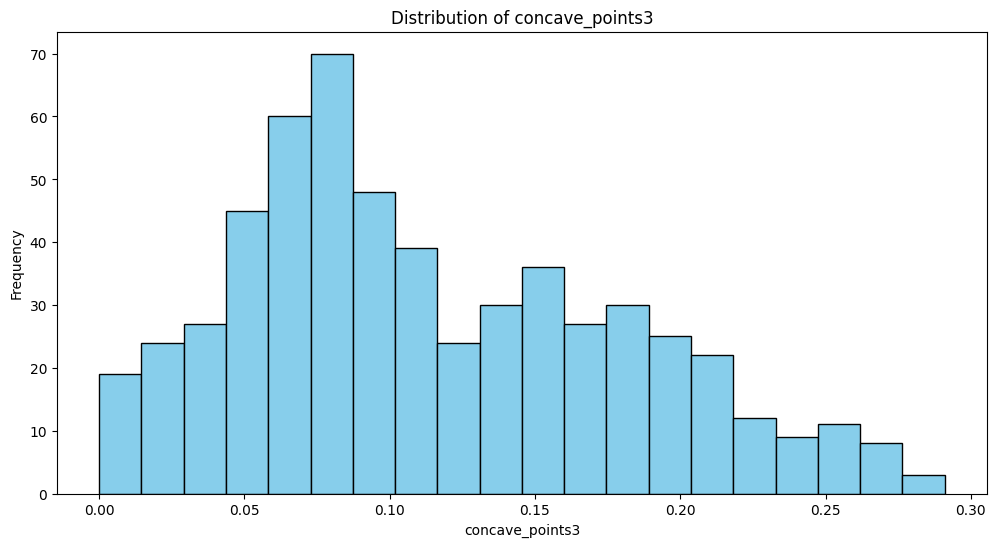

In [136]:
# Plot histograms for concave_points3
plt.figure(figsize=(12, 6))

plt.hist(df['concave_points3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of concave_points3')
plt.xlabel('concave_points3')
plt.ylabel('Frequency')

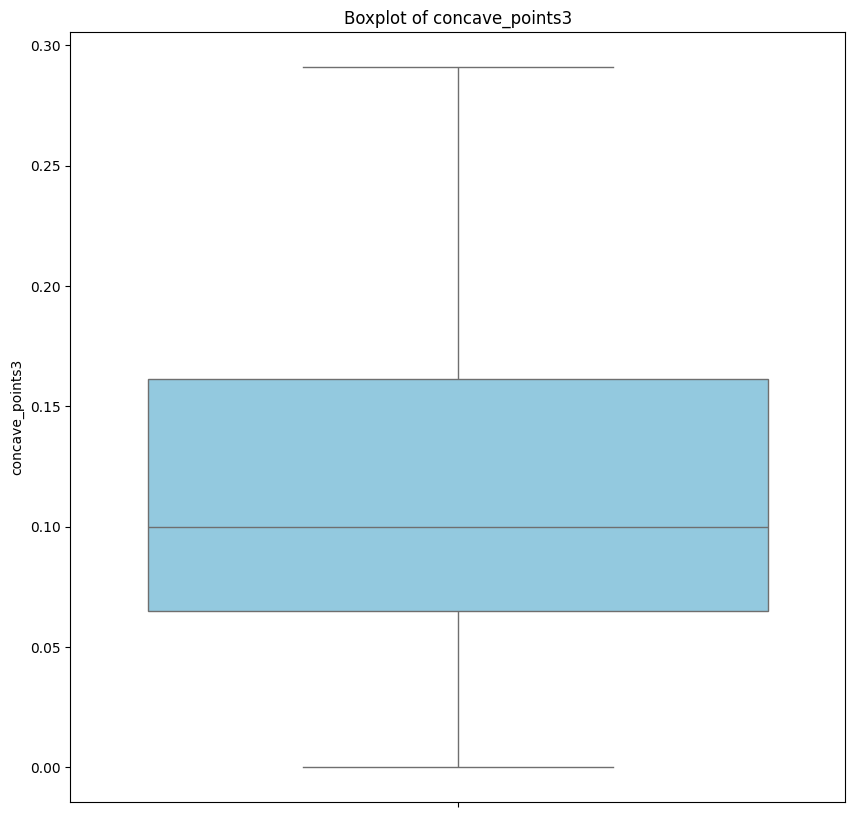

In [137]:
# Plot boxplot for concave_points3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['concave_points3'], color='skyblue')
plt.title('Boxplot of concave_points3')
plt.ylabel('concave_points3')
plt.show()

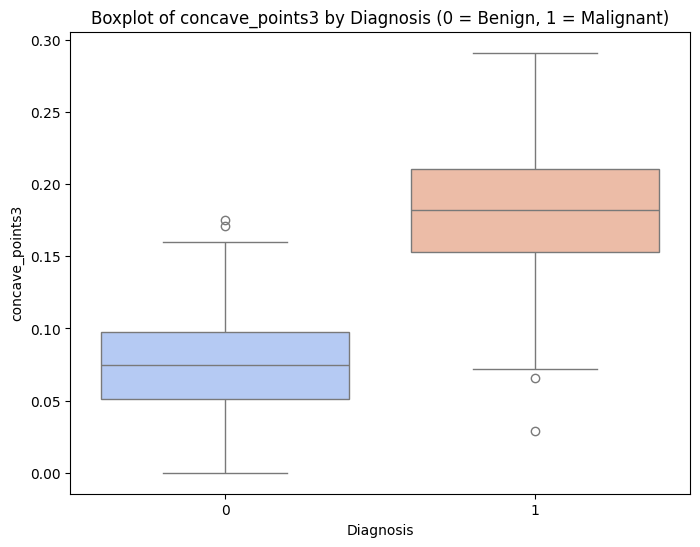

In [138]:
# Boxplot for concave_points3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='concave_points3', data=df, palette='coolwarm')
plt.title('Boxplot of concave_points3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concave_points3')
plt.show()

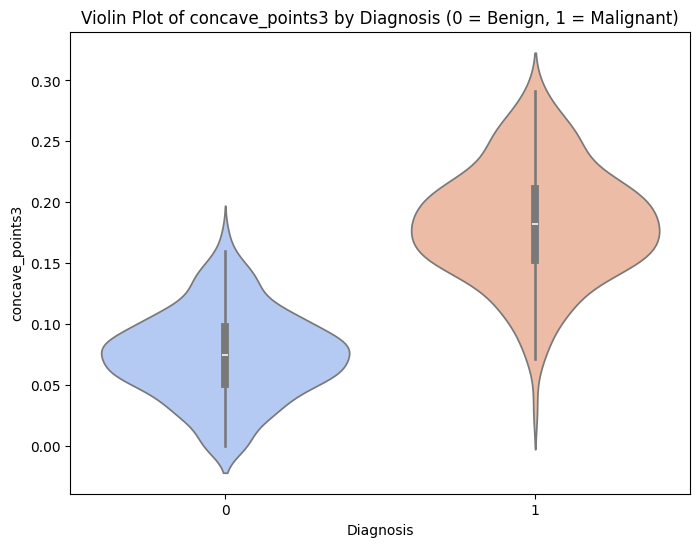

In [139]:
# Violin plot for concave_points3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='concave_points3', data=df, palette='coolwarm')
plt.title('Violin Plot of concave_points3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concave_points3')
plt.show()

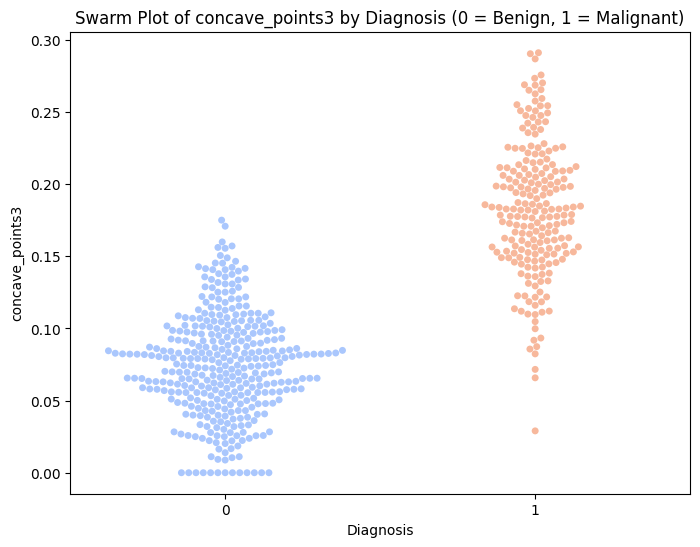

In [140]:
# Swarm plot for concave_points3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='concave_points3', data=df, palette='coolwarm')
plt.title('Swarm Plot of concave_points3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('concave_points3')
plt.show()

###symmetry1

Text(0, 0.5, 'Frequency')

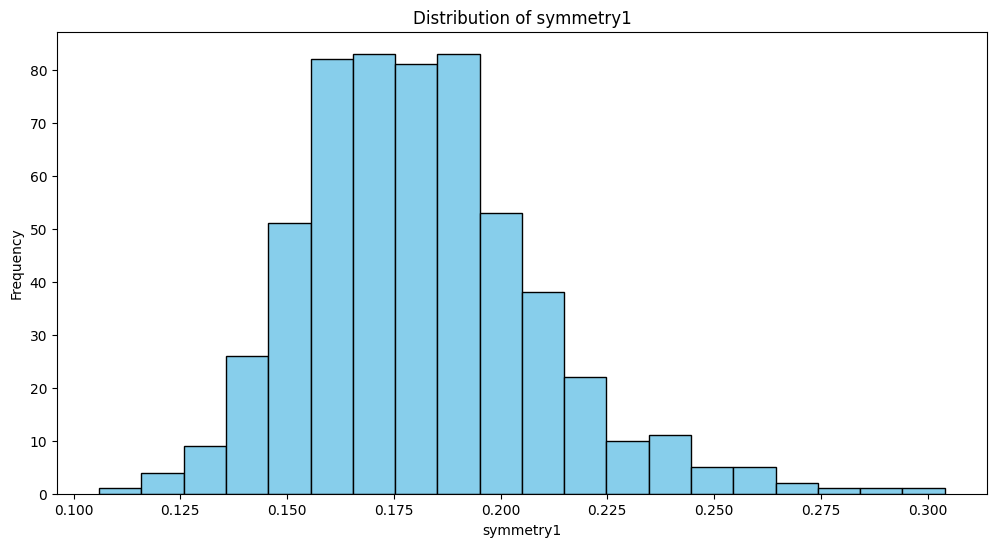

In [141]:
# Plot histograms for symmetry1
plt.figure(figsize=(12, 6))

plt.hist(df['symmetry1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of symmetry1')
plt.xlabel('symmetry1')
plt.ylabel('Frequency')

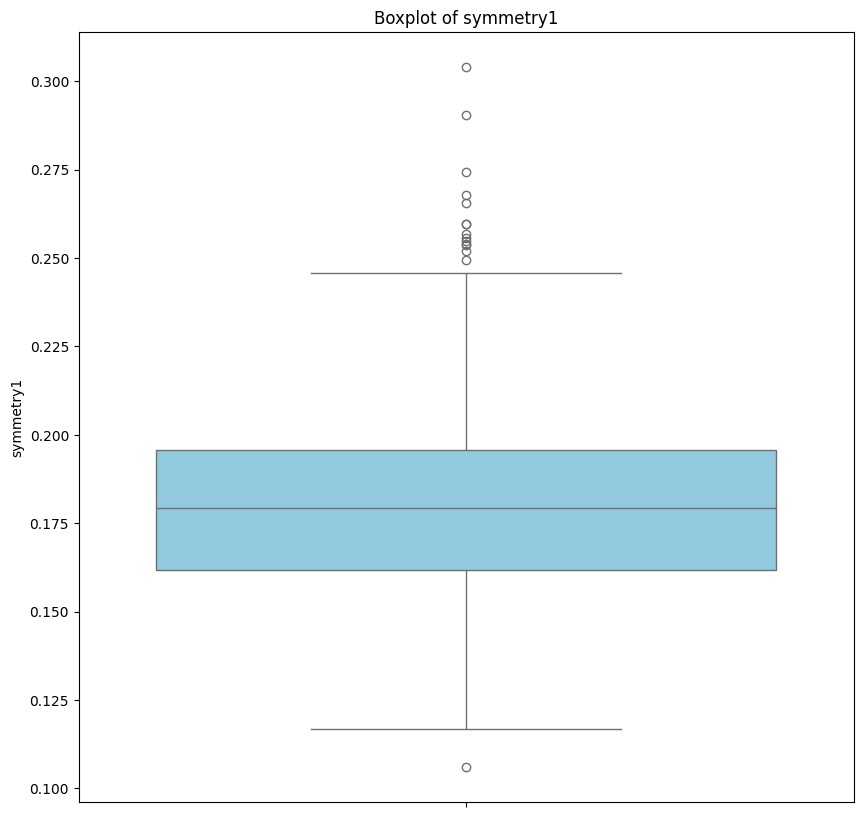

In [142]:
# Plot boxplot for symmetry1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['symmetry1'], color='skyblue')
plt.title('Boxplot of symmetry1')
plt.ylabel('symmetry1')
plt.show()

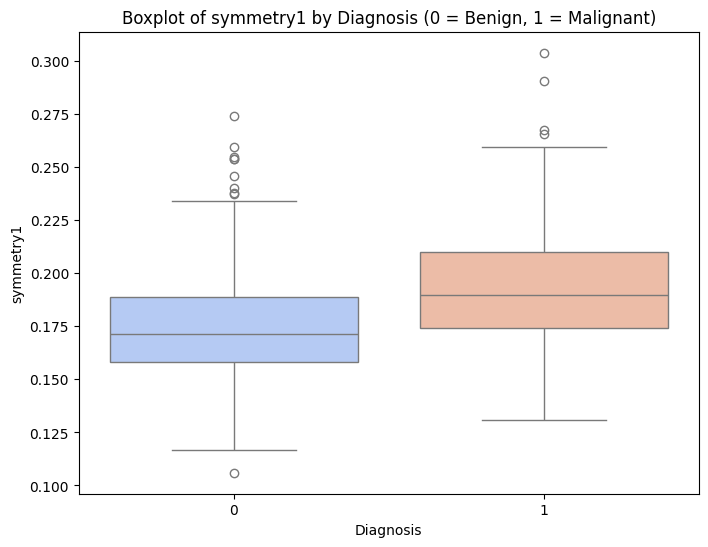

In [143]:
# Boxplot for symmetry1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='symmetry1', data=df, palette='coolwarm')
plt.title('Boxplot of symmetry1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('symmetry1')
plt.show()

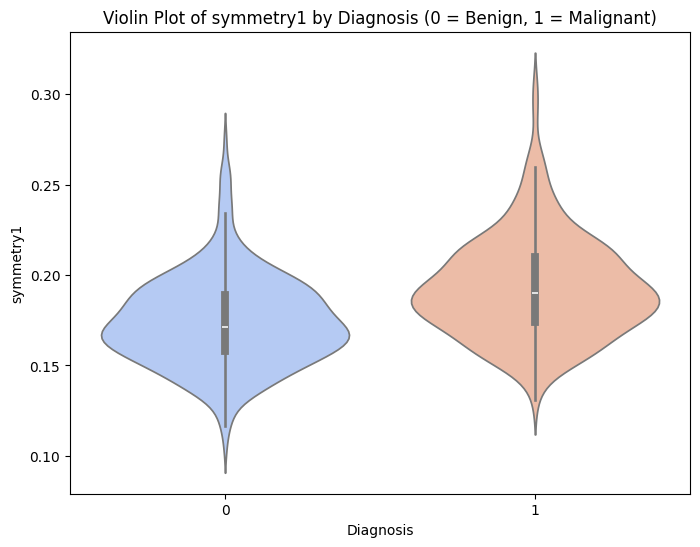

In [144]:
# Violin plot for symmetry1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='symmetry1', data=df, palette='coolwarm')
plt.title('Violin Plot of symmetry1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('symmetry1')
plt.show()

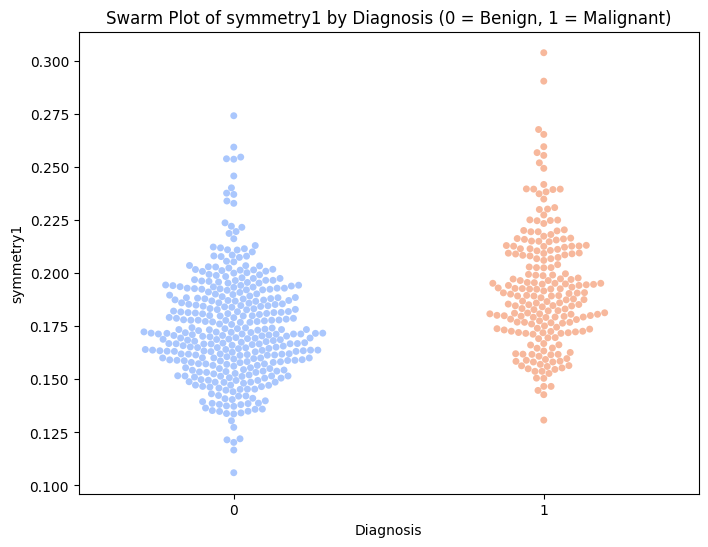

In [145]:
# Swarm plot for symmetry1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='symmetry1', data=df, palette='coolwarm')
plt.title('Swarm Plot of symmetry1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('symmetry1')
plt.show()

###symmetry2

Text(0, 0.5, 'Frequency')

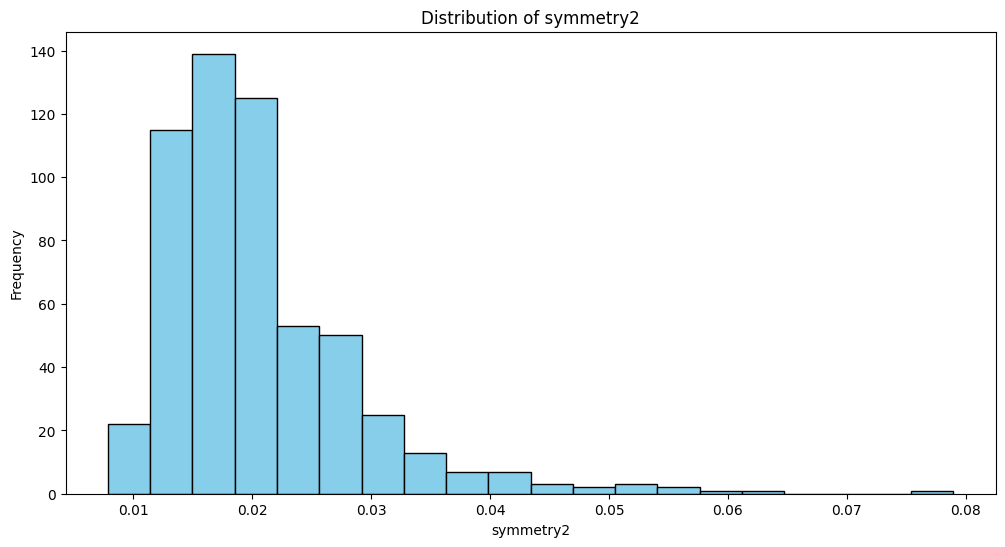

In [146]:
# Plot histograms for symmetry2
plt.figure(figsize=(12, 6))

plt.hist(df['symmetry2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of symmetry2')
plt.xlabel('symmetry2')
plt.ylabel('Frequency')

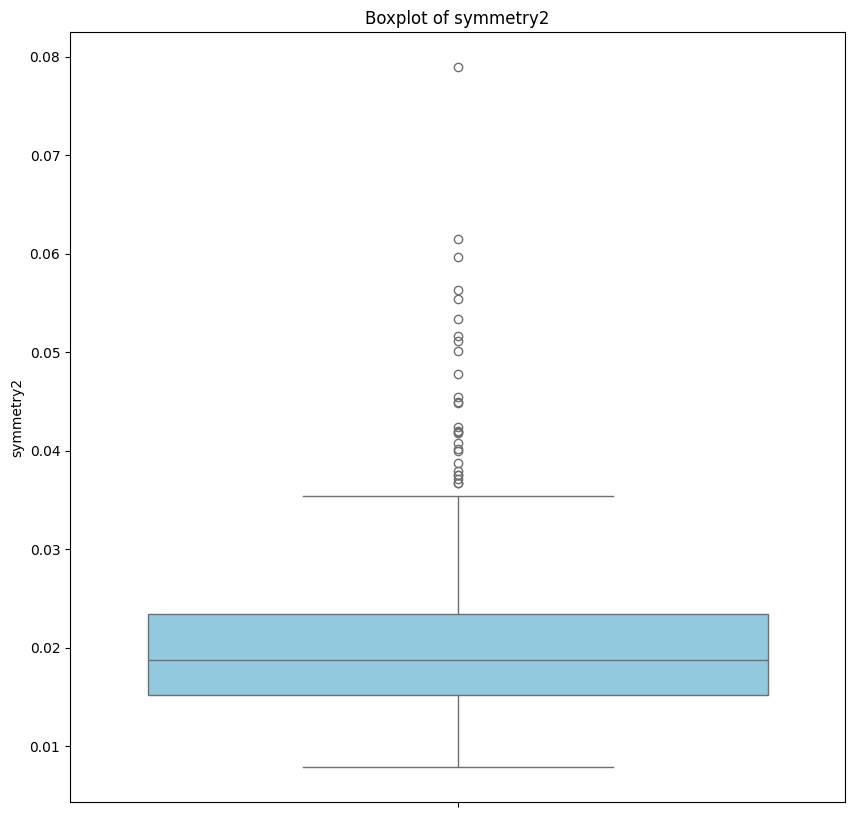

In [147]:
# Plot boxplot for symmetry2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['symmetry2'], color='skyblue')
plt.title('Boxplot of symmetry2')
plt.ylabel('symmetry2')
plt.show()

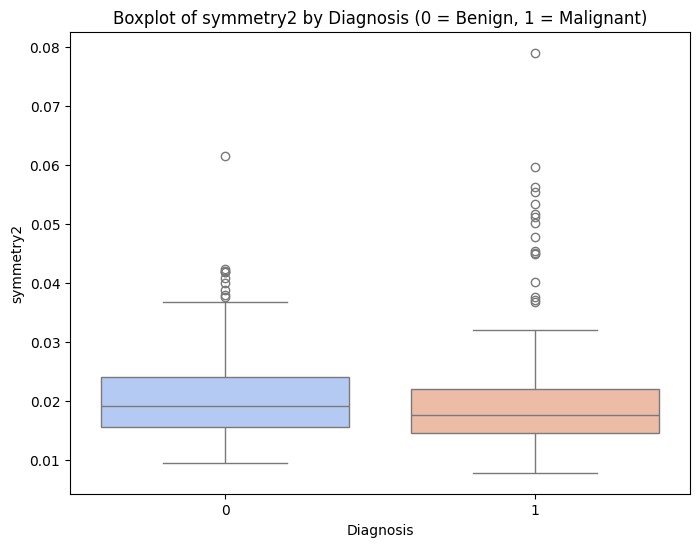

In [148]:
# Boxplot for symmetry2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='symmetry2', data=df, palette='coolwarm')
plt.title('Boxplot of symmetry2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('symmetry2')
plt.show()

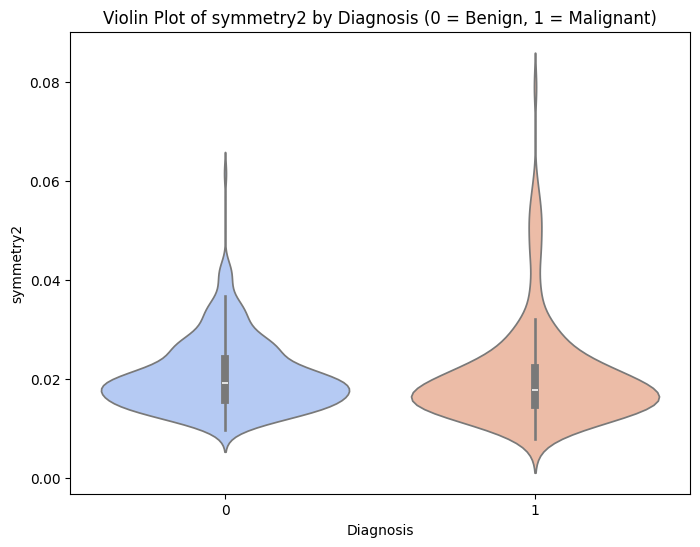

In [149]:
# Violin plot for symmetry2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='symmetry2', data=df, palette='coolwarm')
plt.title('Violin Plot of symmetry2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('symmetry2')
plt.show()

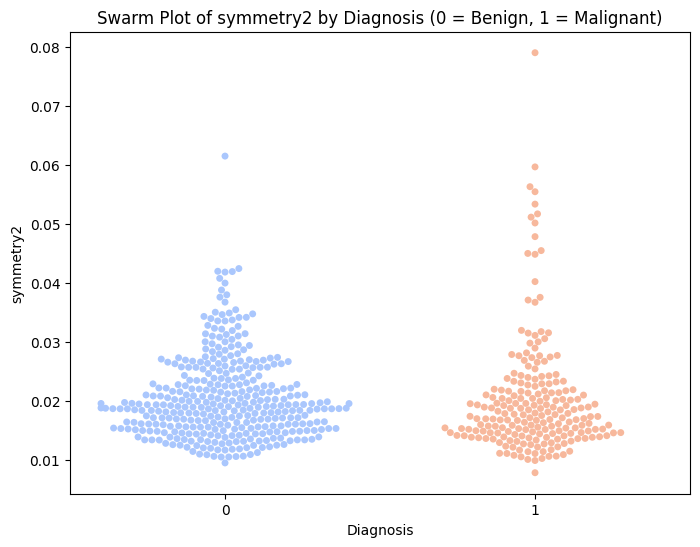

In [150]:
# Swarm plot for symmetry2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='symmetry2', data=df, palette='coolwarm')
plt.title('Swarm Plot of symmetry2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('symmetry2')
plt.show()

###symmetry3

Text(0, 0.5, 'Frequency')

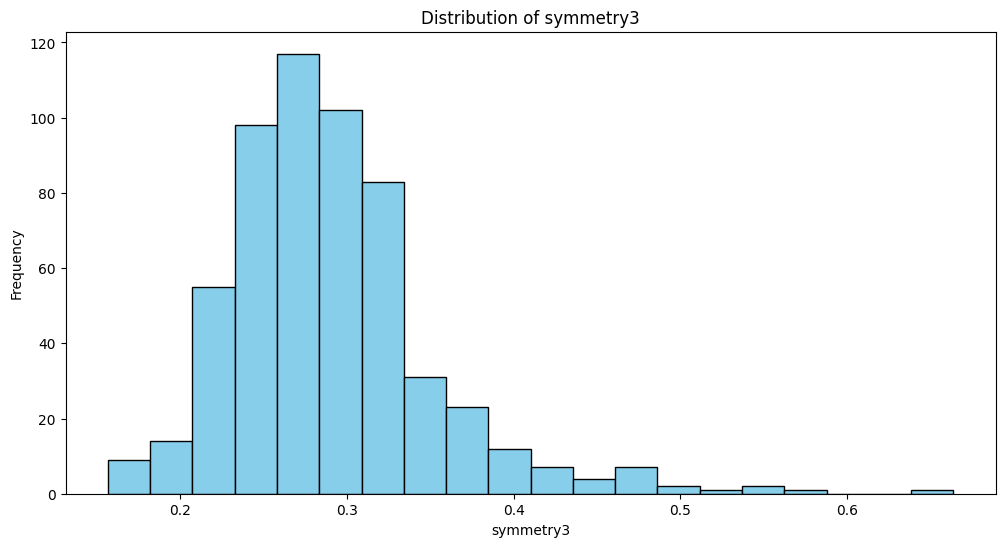

In [151]:
# Plot histograms for symmetry3
plt.figure(figsize=(12, 6))

plt.hist(df['symmetry3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of symmetry3')
plt.xlabel('symmetry3')
plt.ylabel('Frequency')

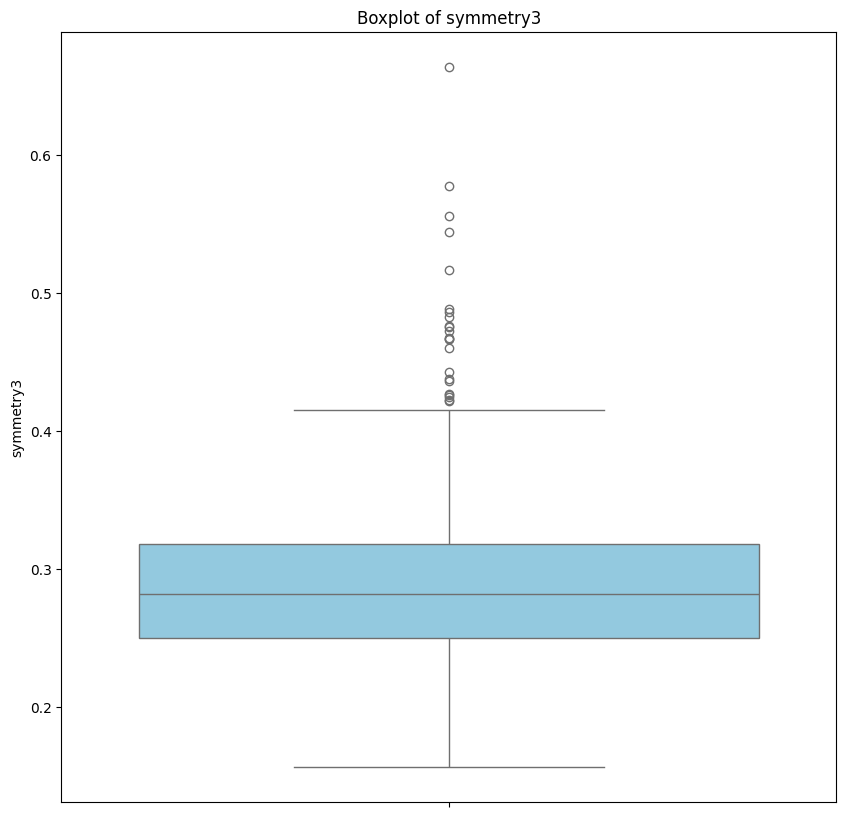

In [152]:
# Plot boxplot for symmetry3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['symmetry3'], color='skyblue')
plt.title('Boxplot of symmetry3')
plt.ylabel('symmetry3')
plt.show()

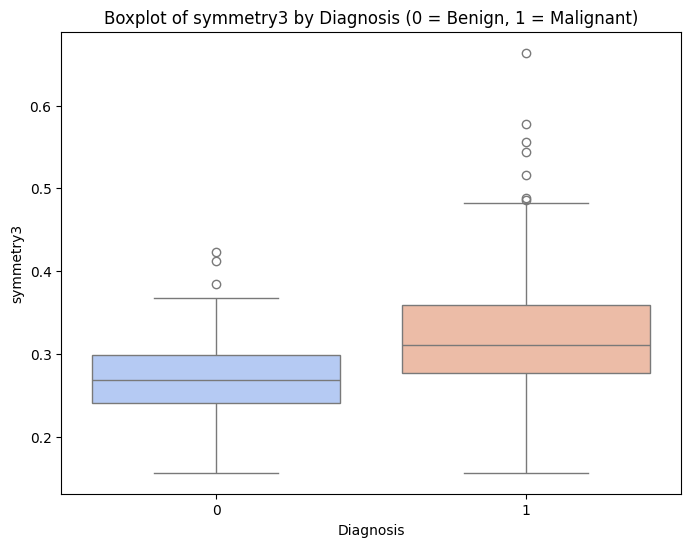

In [153]:
# Boxplot for symmetry3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='symmetry3', data=df, palette='coolwarm')
plt.title('Boxplot of symmetry3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('symmetry3')
plt.show()

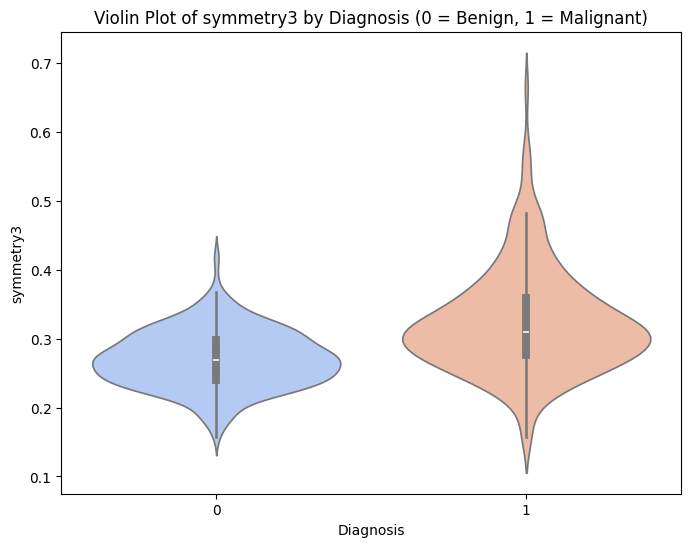

In [154]:
# Violin plot for symmetry3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='symmetry3', data=df, palette='coolwarm')
plt.title('Violin Plot of symmetry3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('symmetry3')
plt.show()

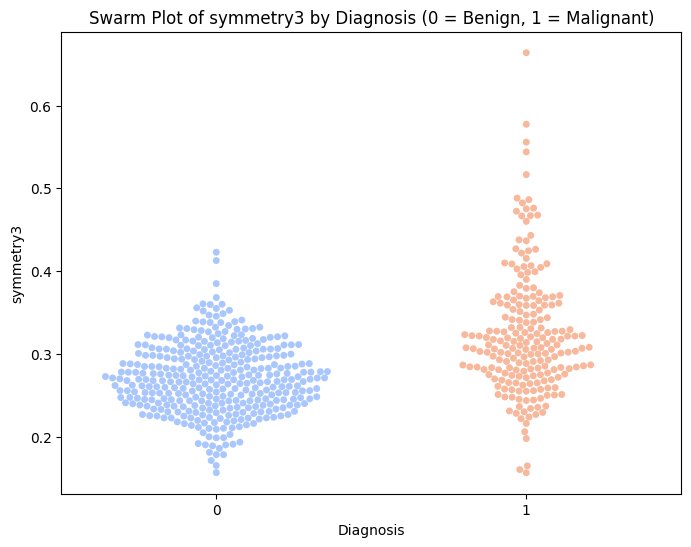

In [155]:
# Swarm plot for symmetry3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='symmetry3', data=df, palette='coolwarm')
plt.title('Swarm Plot of symmetry3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('symmetry3')
plt.show()

###fractal_dimension1

Text(0, 0.5, 'Frequency')

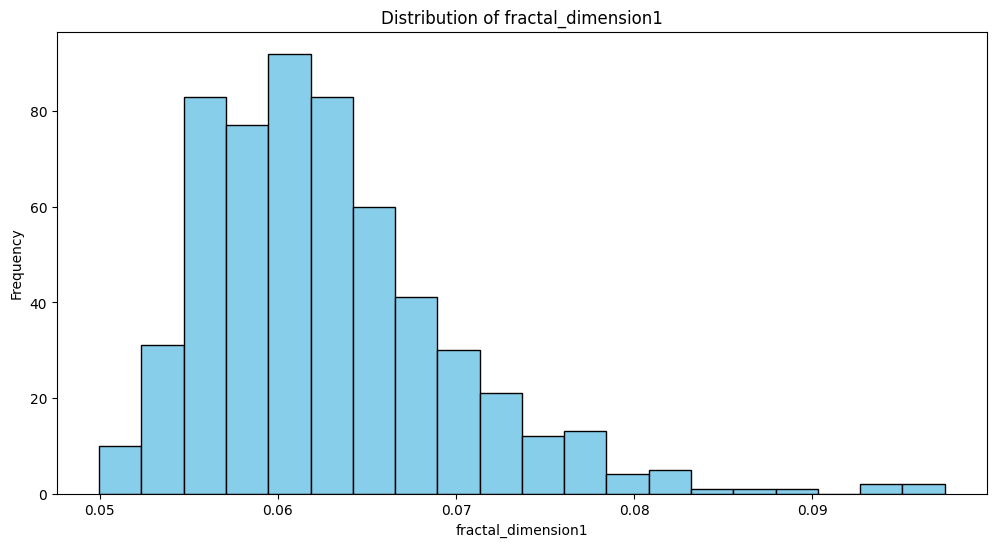

In [156]:
# Plot histograms for fractal_dimension1
plt.figure(figsize=(12, 6))

plt.hist(df['fractal_dimension1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of fractal_dimension1')
plt.xlabel('fractal_dimension1')
plt.ylabel('Frequency')

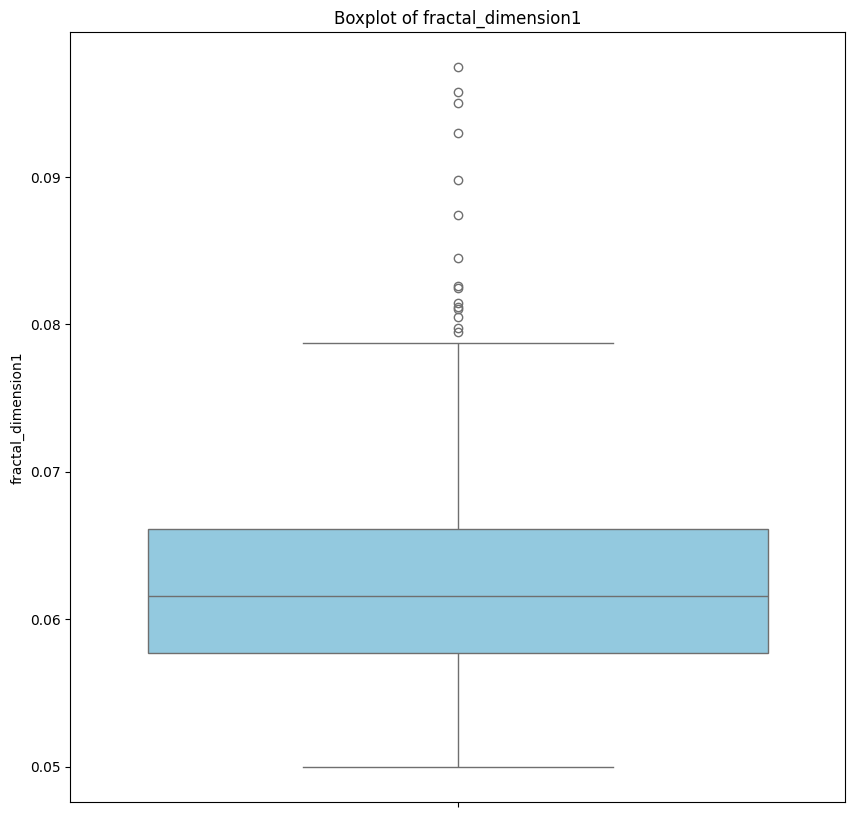

In [157]:
# Plot boxplot for fractal_dimension1
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['fractal_dimension1'], color='skyblue')
plt.title('Boxplot of fractal_dimension1')
plt.ylabel('fractal_dimension1')
plt.show()

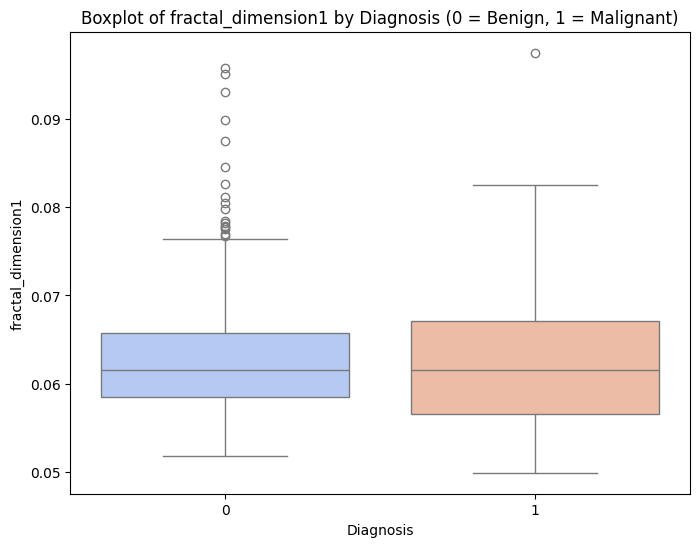

In [158]:
# Boxplot for fractal_dimension1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='fractal_dimension1', data=df, palette='coolwarm')
plt.title('Boxplot of fractal_dimension1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('fractal_dimension1')
plt.show()

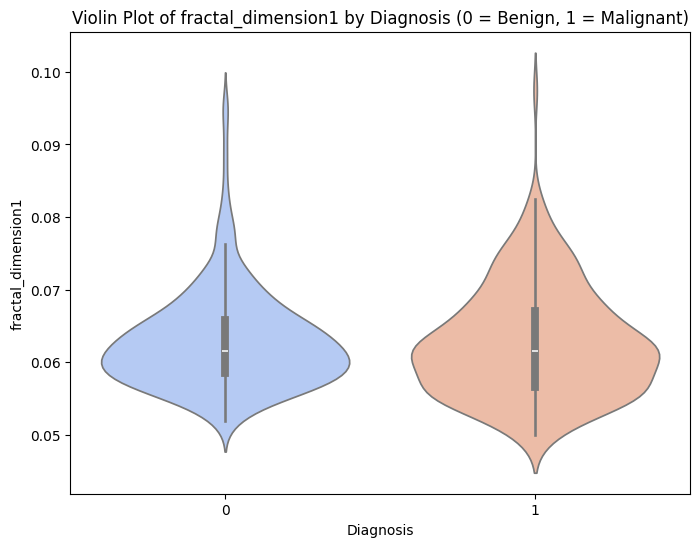

In [159]:
# Violin plot for fractal_dimension1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='fractal_dimension1', data=df, palette='coolwarm')
plt.title('Violin Plot of fractal_dimension1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('fractal_dimension1')
plt.show()

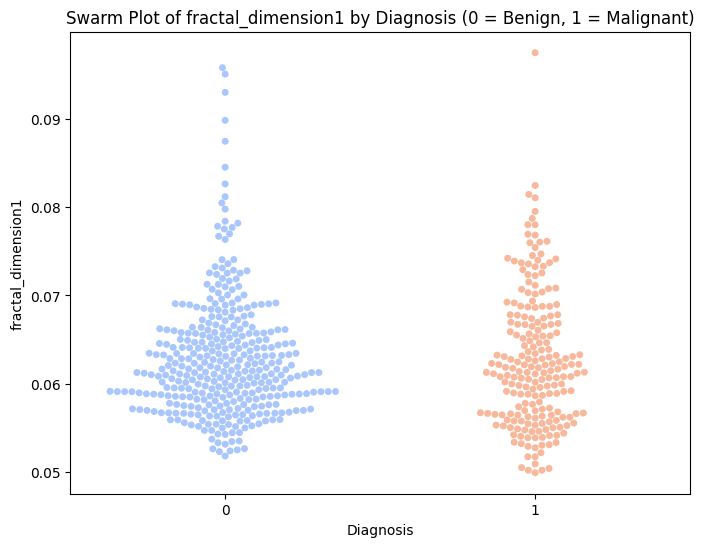

In [160]:
# Swarm plot for fractal_dimension1 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='fractal_dimension1', data=df, palette='coolwarm')
plt.title('Swarm Plot of fractal_dimension1 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('fractal_dimension1')
plt.show()

###fractal_dimension2

Text(0, 0.5, 'Frequency')

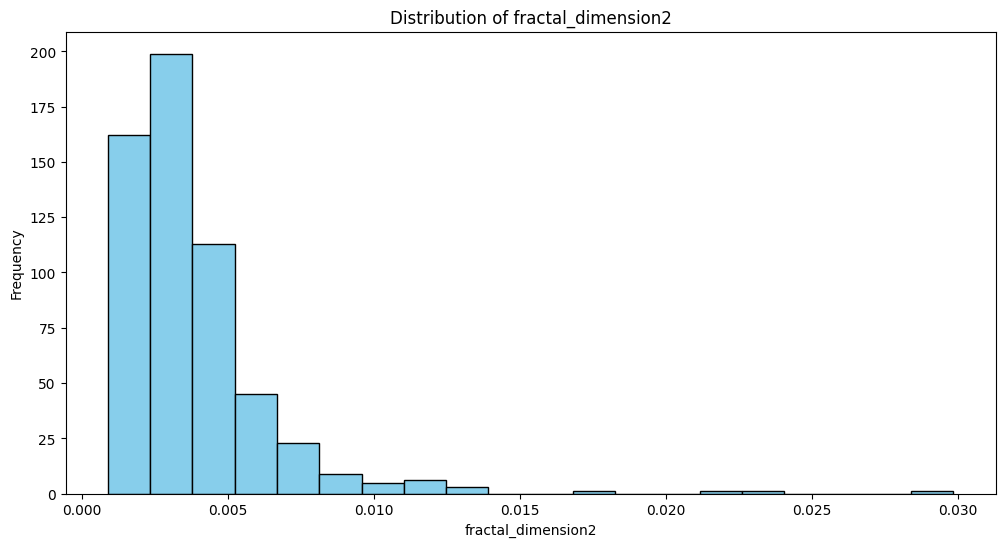

In [161]:
# Plot histograms for fractal_dimension2
plt.figure(figsize=(12, 6))

plt.hist(df['fractal_dimension2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of fractal_dimension2')
plt.xlabel('fractal_dimension2')
plt.ylabel('Frequency')

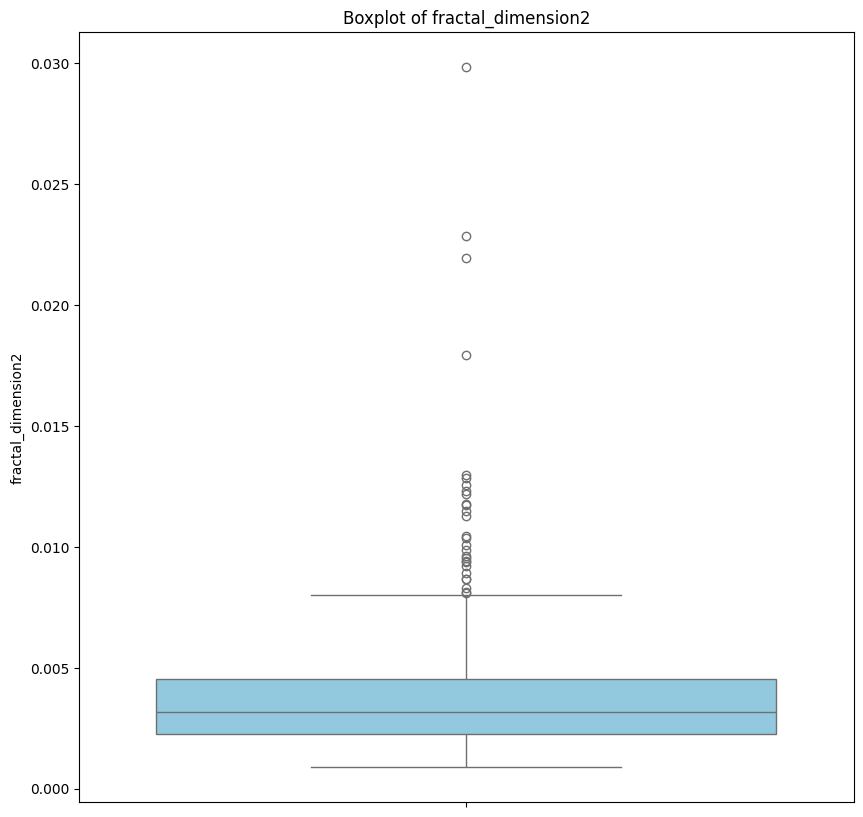

In [162]:
# Plot boxplot for fractal_dimension2
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['fractal_dimension2'], color='skyblue')
plt.title('Boxplot of fractal_dimension2')
plt.ylabel('fractal_dimension2')
plt.show()

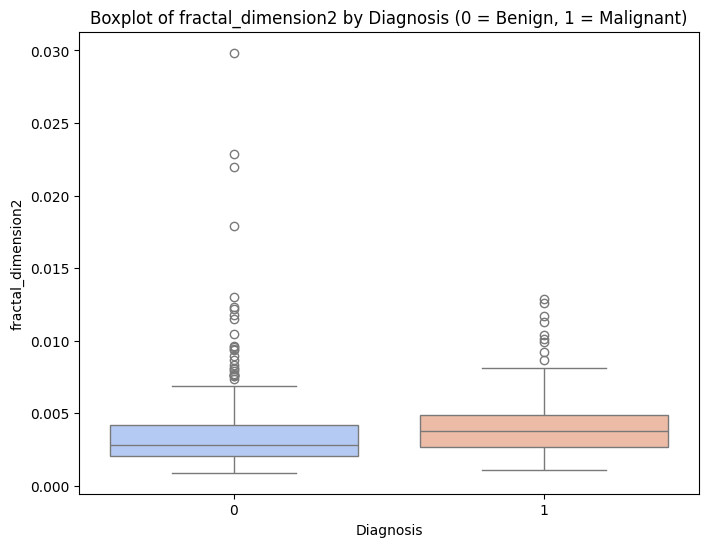

In [163]:
# Boxplot for fractal_dimension2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='fractal_dimension2', data=df, palette='coolwarm')
plt.title('Boxplot of fractal_dimension2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('fractal_dimension2')
plt.show()

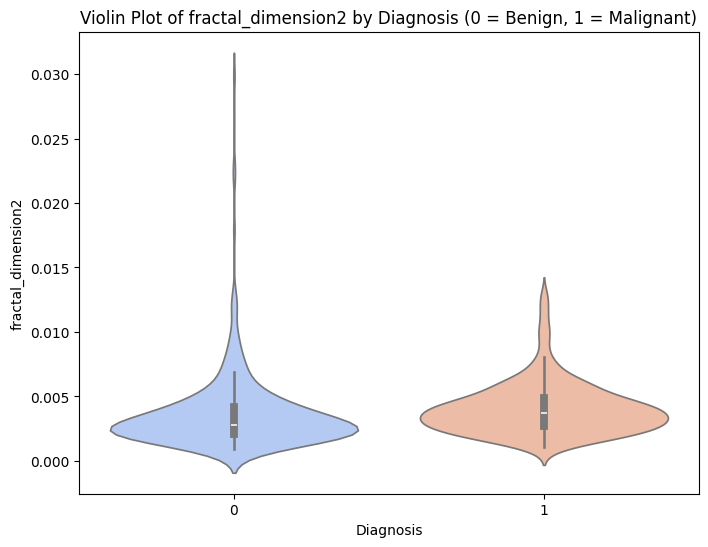

In [164]:
# Violin plot for fractal_dimension2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='fractal_dimension2', data=df, palette='coolwarm')
plt.title('Violin Plot of fractal_dimension2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('fractal_dimension2')
plt.show()

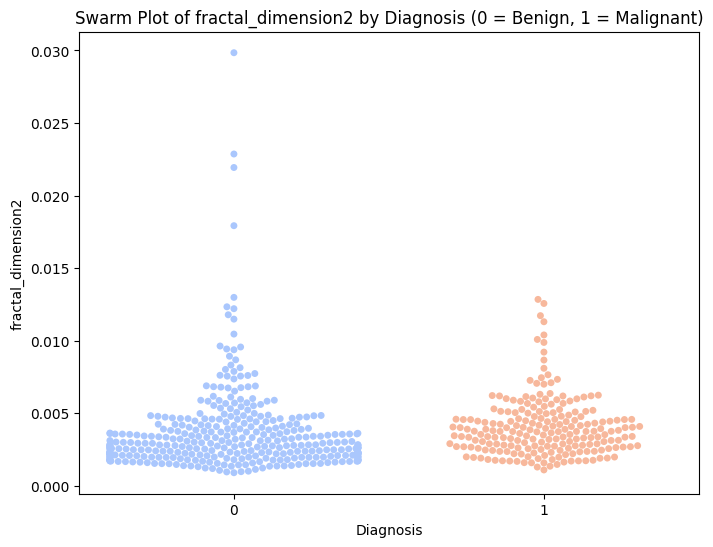

In [165]:
# Swarm plot for fractal_dimension2 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='fractal_dimension2', data=df, palette='coolwarm')
plt.title('Swarm Plot of fractal_dimension2 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('fractal_dimension2')
plt.show()

###fractal_dimension3

Text(0, 0.5, 'Frequency')

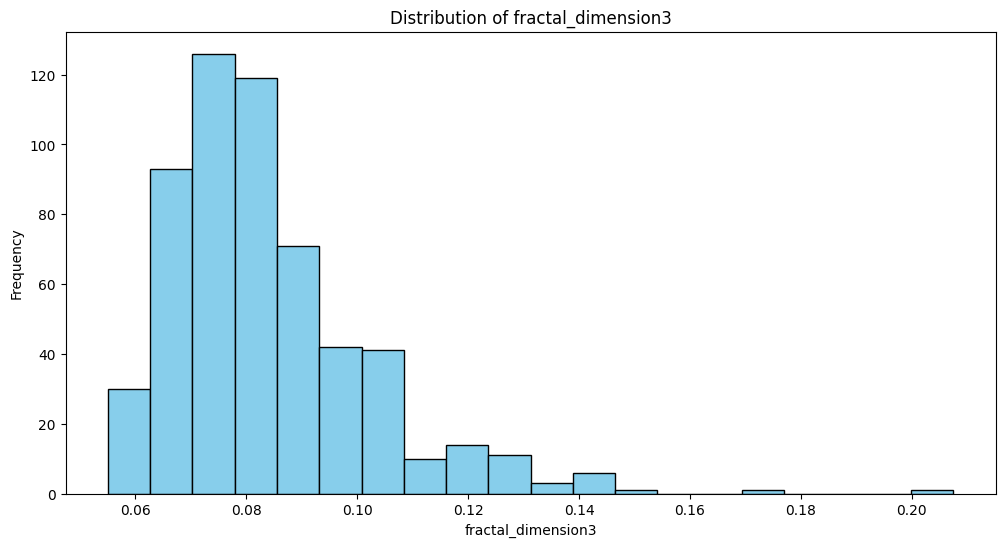

In [166]:
# Plot histograms for fractal_dimension3
plt.figure(figsize=(12, 6))

plt.hist(df['fractal_dimension3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of fractal_dimension3')
plt.xlabel('fractal_dimension3')
plt.ylabel('Frequency')

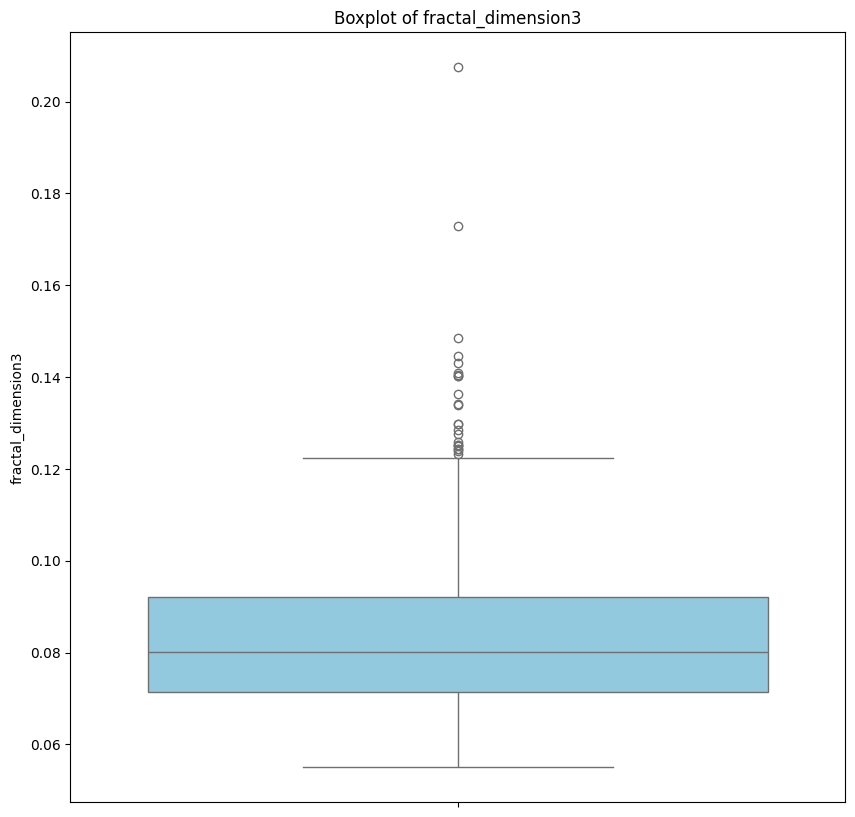

In [167]:
# Plot boxplot for fractal_dimension3
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['fractal_dimension3'], color='skyblue')
plt.title('Boxplot of fractal_dimension3')
plt.ylabel('fractal_dimension3')
plt.show()

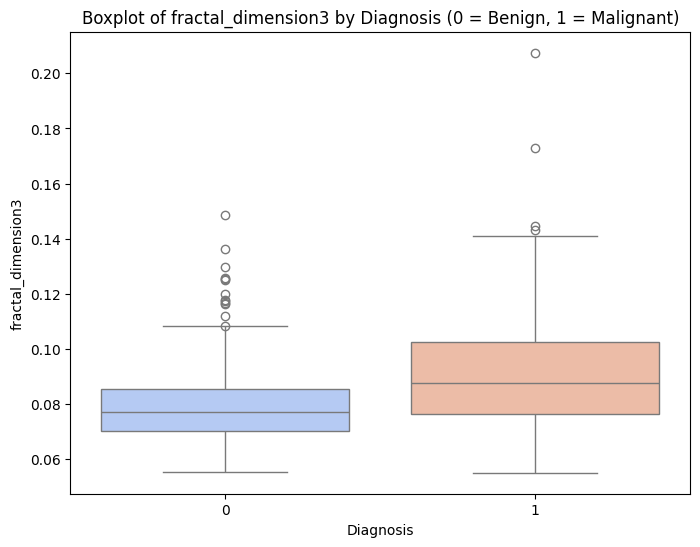

In [168]:
# Boxplot for fractal_dimension3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='fractal_dimension3', data=df, palette='coolwarm')
plt.title('Boxplot of fractal_dimension3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('fractal_dimension3')
plt.show()

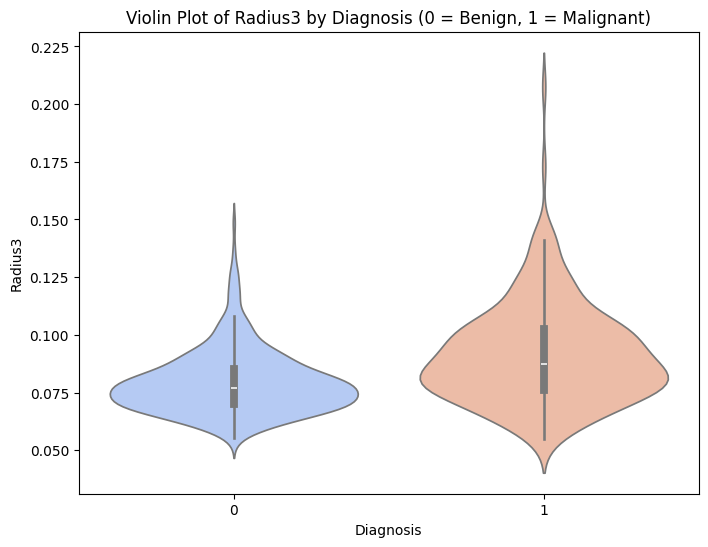

In [169]:
# Violin plot for fractal_dimension3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='fractal_dimension3', data=df, palette='coolwarm')
plt.title('Violin Plot of Radius3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Radius3')
plt.show()

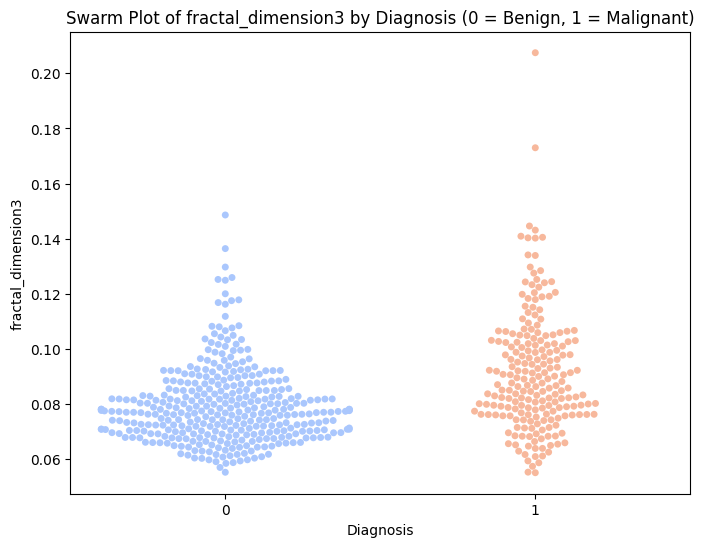

In [170]:
# Swarm plot for fractal_dimension3 against Diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Diagnosis', y='fractal_dimension3', data=df, palette='coolwarm')
plt.title('Swarm Plot of fractal_dimension3 by Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('fractal_dimension3')
plt.show()

##5.Predictive Modeling

###Model Training

####Data Preparating

In [171]:
# Separating features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [172]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [173]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [174]:
# Standardizing the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

####Model Selection and Training

In [175]:
# List of models to train, including SVC
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": cb.CatBoostClassifier(verbose=0, random_state=42),
    "LogitBoost": LogitBoost(),
    "SVC": SVC(probability=True, random_state=42)  # SVC added to the model list
}

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import pandas as pd

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    predictions = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
        predictions[name] = y_pred

        print(f"{name} results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}\n")

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    return results, predictions


###Model Evaluation

Logistic Regression results:
Accuracy: 0.9766
Precision: 0.9782
Recall: 0.9719
F1 Score: 0.9749



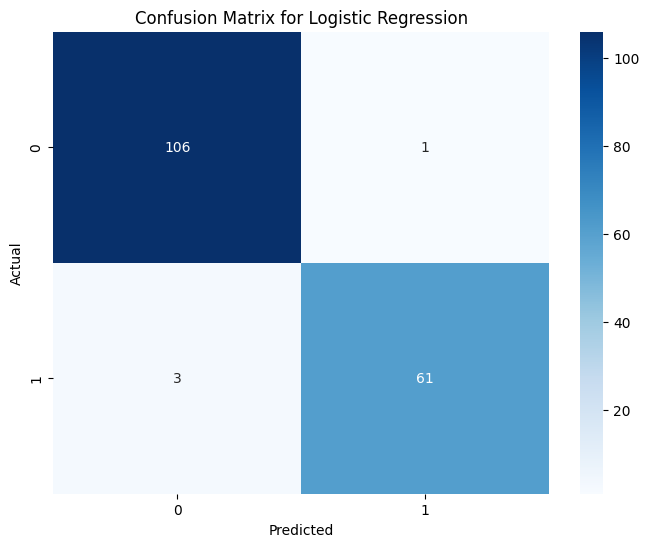

Decision Tree results:
Accuracy: 0.9532
Precision: 0.9501
Recall: 0.9501
F1 Score: 0.9501



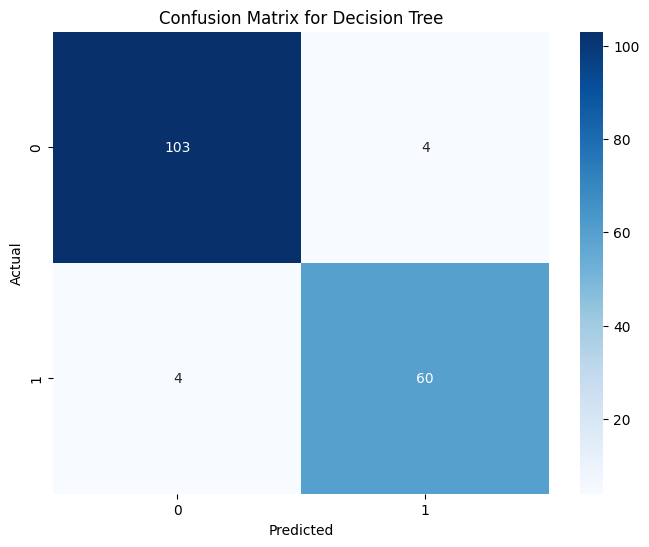

Random Forest results:
Accuracy: 0.9766
Precision: 0.9782
Recall: 0.9719
F1 Score: 0.9749



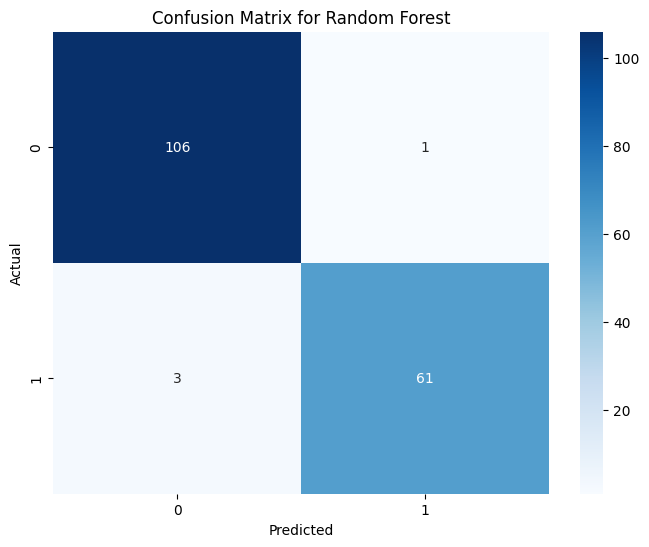

AdaBoost results:
Accuracy: 0.9708
Precision: 0.9702
Recall: 0.9672
F1 Score: 0.9687



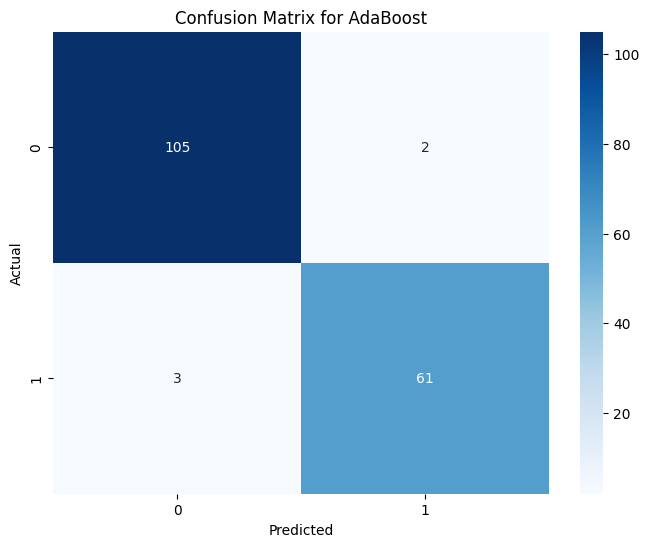

Gradient Boosting results:
Accuracy: 0.9766
Precision: 0.9820
Recall: 0.9688
F1 Score: 0.9747



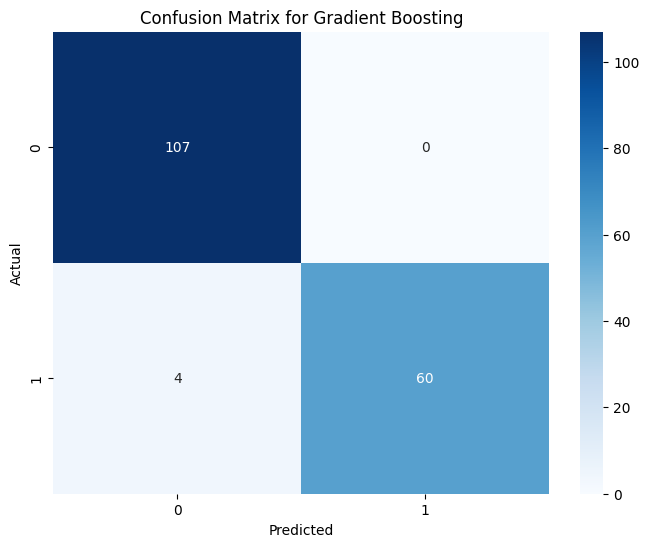

XGBoost results:
Accuracy: 0.9766
Precision: 0.9820
Recall: 0.9688
F1 Score: 0.9747



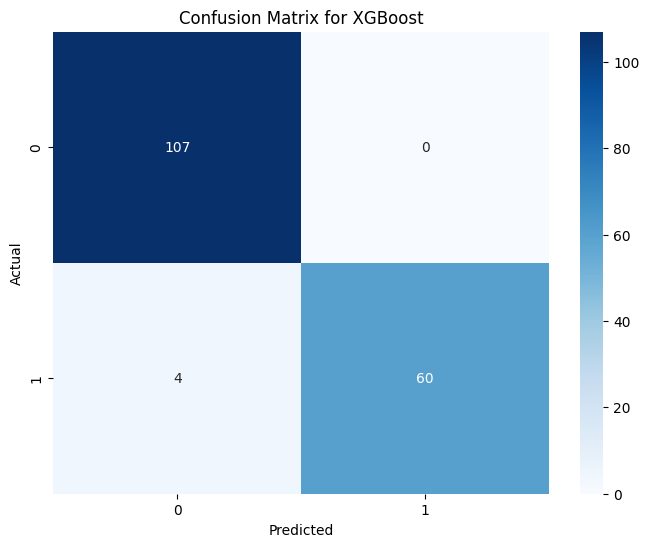

[LightGBM] [Info] Number of positive: 250, number of negative: 250
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5008
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

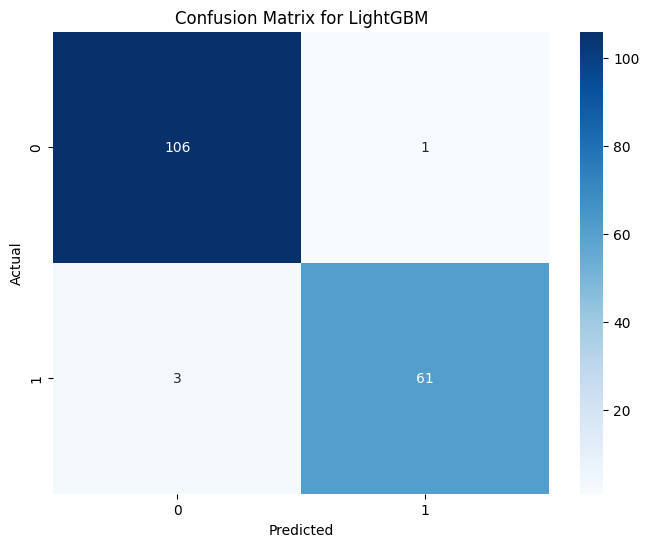

CatBoost results:
Accuracy: 0.9883
Precision: 0.9908
Recall: 0.9844
F1 Score: 0.9874



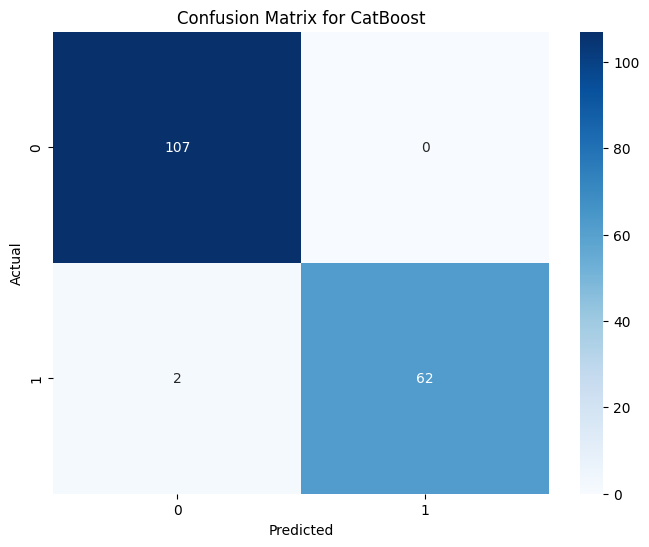

LogitBoost results:
Accuracy: 0.9825
Precision: 0.9864
Recall: 0.9766
F1 Score: 0.9811



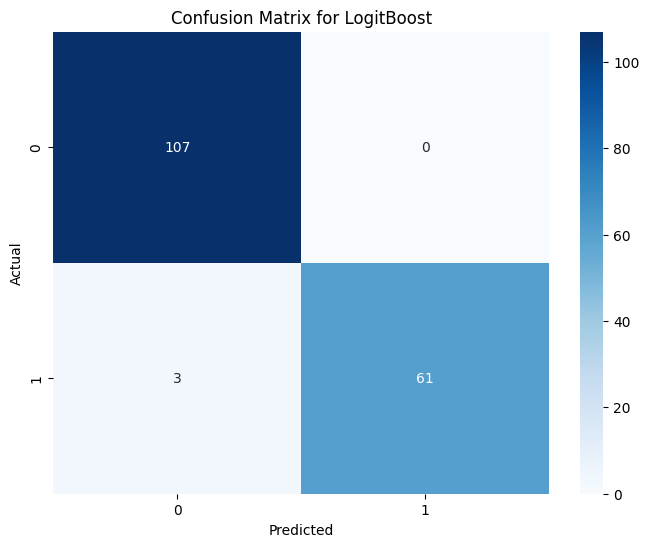

SVC results:
Accuracy: 0.9825
Precision: 0.9828
Recall: 0.9797
F1 Score: 0.9812



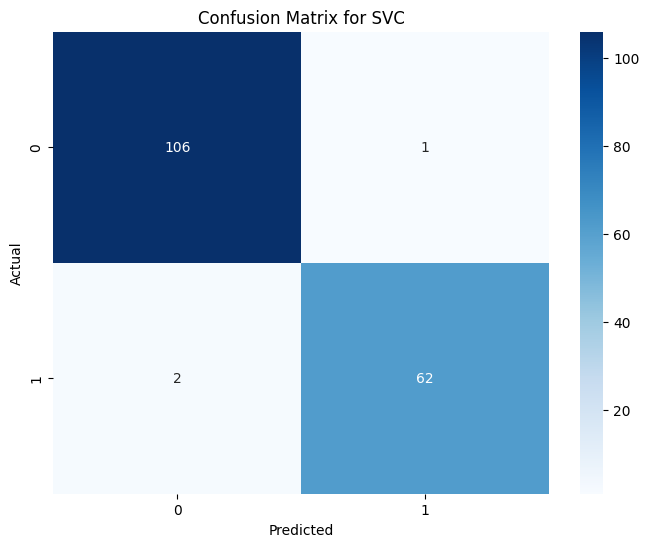

In [177]:
# Train and evaluate the models
results, predictions = train_and_evaluate(models, X_train_resampled, X_test, y_train_resampled, y_test)

In [178]:
# Display results in a table format
results_df = pd.DataFrame(results)
results_df

Logistic Regression  Decision Tree  Random Forest  AdaBoost  \
accuracy              0.976608       0.953216       0.976608  0.970760   
precision             0.978174       0.950058       0.978174  0.970238   
recall                0.971890       0.950058       0.971890  0.967217   
f1_score              0.974868       0.950058       0.974868  0.968687   

           Gradient Boosting   XGBoost  LightGBM  CatBoost  LogitBoost  \
accuracy            0.976608  0.976608  0.976608  0.988304    0.982456   
precision           0.981982  0.981982  0.978174  0.990826    0.986364   
recall              0.968750  0.968750  0.971890  0.984375    0.976562   
f1_score            0.974697  0.974697  0.974868  0.987434    0.981088   

                SVC  
accuracy   0.982456  
precision  0.982804  
recall     0.979702  
f1_score   0.981212

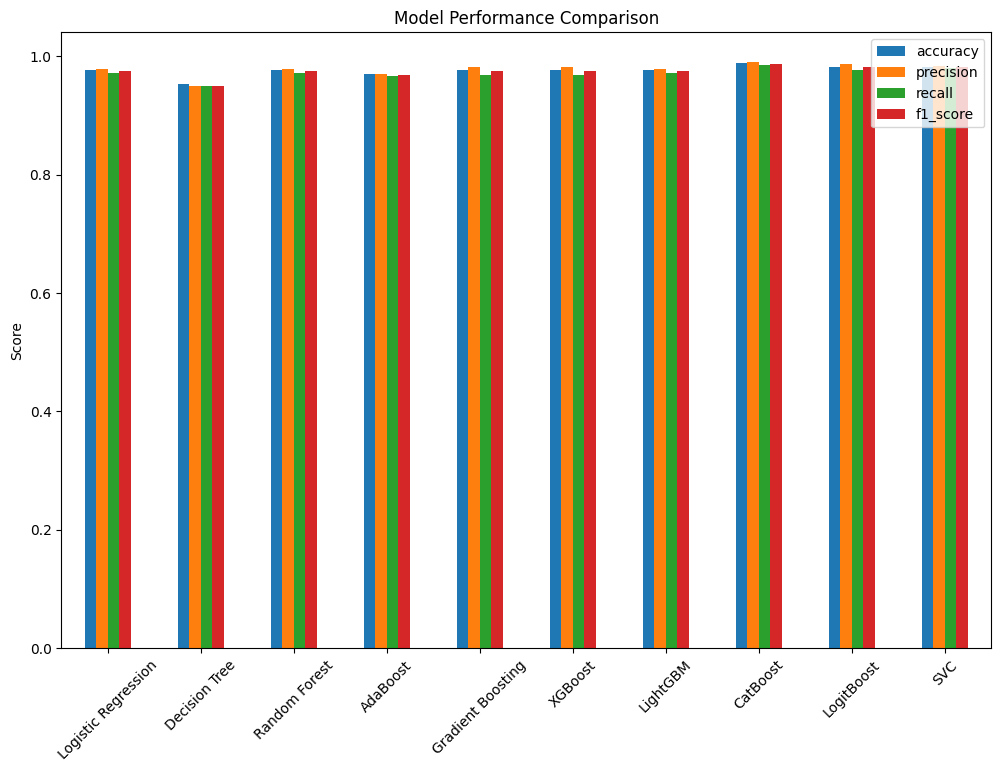

In [179]:
# Plotting the results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

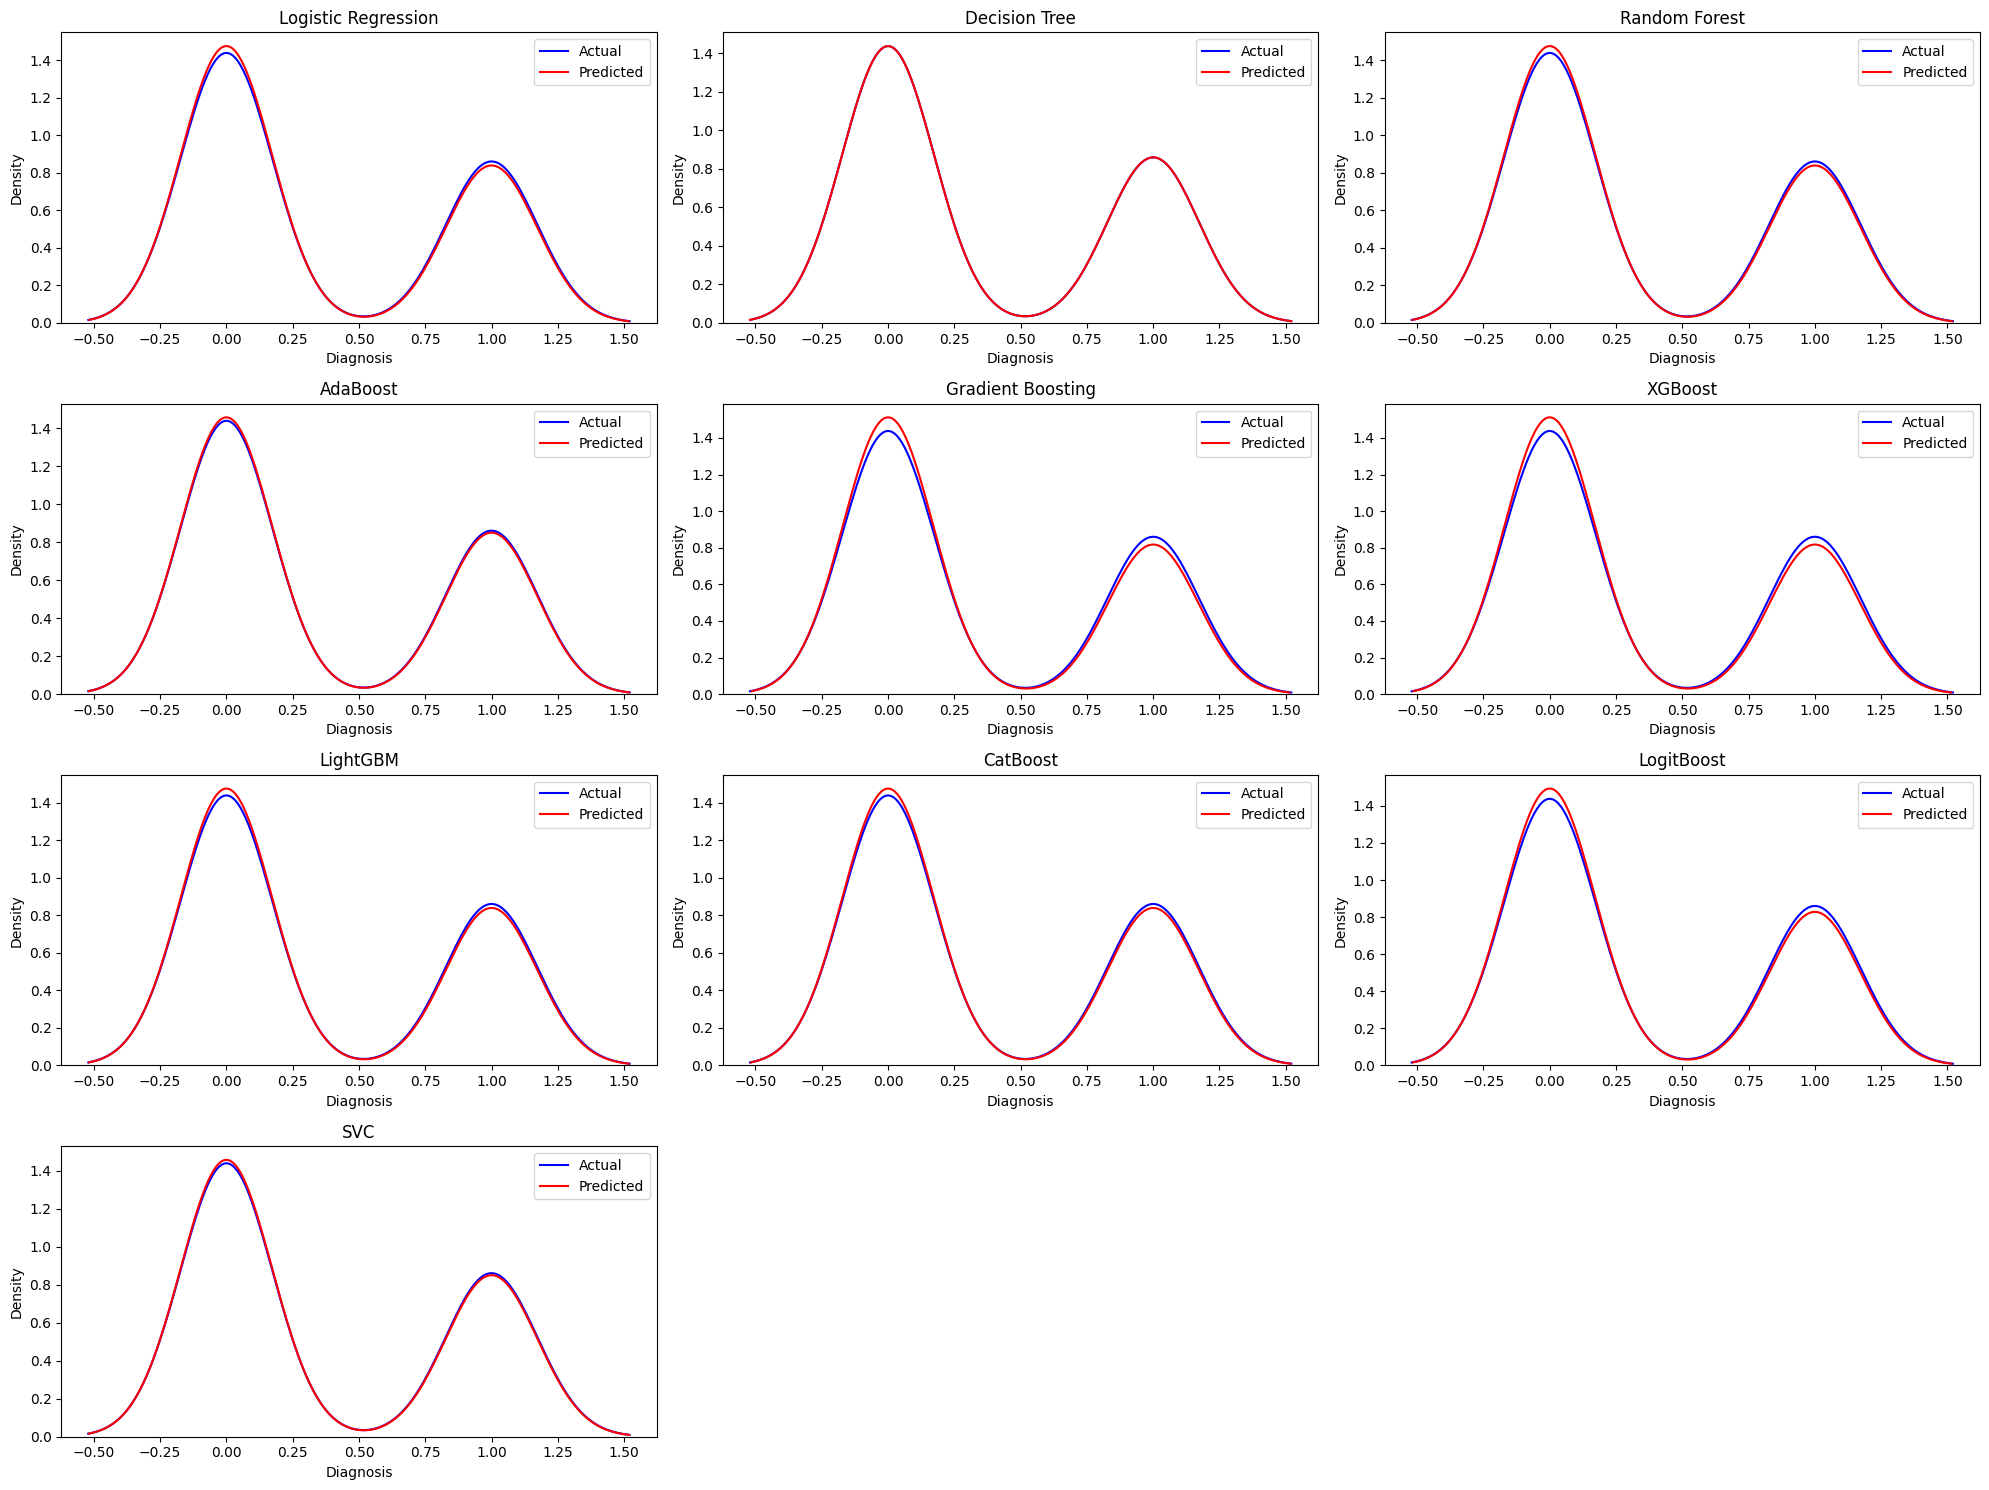

In [180]:
# Create a 4x3 grid to accommodate 10 models
fig, ax = plt.subplots(4, 3, figsize=(20, 15))

# Flatten the axes array for easy indexing
ax = ax.flatten()

model_names = list(models.keys())

# Loop through each model and plot the actual vs. predicted distributions
for i, name in enumerate(model_names):
    sns.kdeplot(y_test, ax=ax[i], label='Actual', color='blue')
    sns.kdeplot(predictions[name], ax=ax[i], label='Predicted', color='red')
    ax[i].set_title(name)
    ax[i].legend()

# Hide any unused subplots (since we only have 10 models but a 12 subplot grid)
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

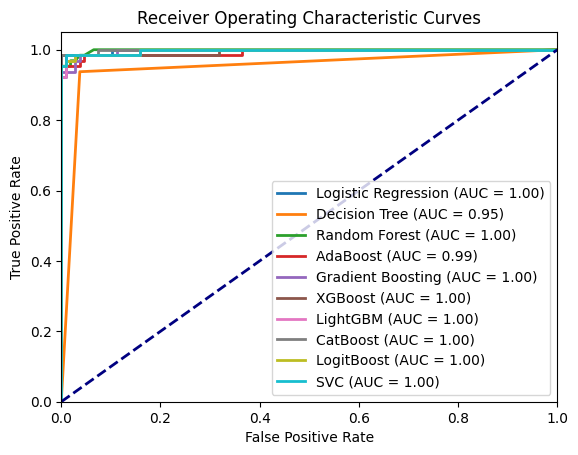

In [181]:
from sklearn.metrics import roc_curve, auc
# Loop over models and plot ROC curves
for name, model in models.items():
    # Predict probabilities (for ROC curve we need the probabilities, not the binary predictions)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc='lower right')
plt.show()

##6.Conclusion

**CatBoost** stands out as the best model based on all key performance metrics. It has the highest accuracy (0.988304), precision (0.990826), recall (0.984375), and F1 score (0.987434), making it the best-performing model overall.